In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta
from sklearn.metrics import mean_squared_error
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [389]:
df= pd.read_csv('dataset\main\eMARC load blocks.csv')
df

deployment_id  block        date  Load (kW)
0                D0020     35    2/3/2018   0.113429
1                D0020     35   2/22/2018   0.017000
2                D0020     35    3/4/2018   0.162748
3                D0020     35    3/5/2018   0.784350
4                D0020     35   3/13/2018   0.114382
...                ...    ...         ...        ...
12702796         D0271     95   9/30/2019   0.027400
12702797         D0271     95   2/18/2020   0.012333
12702798         D0272     95  12/19/2019   0.008533
12702799         D0272     95    5/9/2020   0.034667
12702800         D0273     95   2/16/2020   0.000000

[12702801 rows x 4 columns]

In [260]:
df1 = df.groupby('deployment_id').get_group('D0014')
df1

deployment_id  block        date  Load (kW)
23078            D0014      0    1/1/2018   0.032266
23079            D0014      0    1/7/2018   0.120097
23080            D0014      0   1/10/2018   0.070372
23081            D0014      0   1/26/2018   0.132406
23082            D0014      0    2/2/2018   0.034243
...                ...    ...         ...        ...
12701620         D0014     95   7/18/2018   0.027389
12701621         D0014     95    8/5/2019   0.121676
12701622         D0014     95  10/10/2019   0.175508
12701623         D0014     95  12/23/2019   0.028029
12701624         D0014     95   3/20/2020   0.036987

[87038 rows x 4 columns]

In [261]:
df1 = df1.sort_values(by=['date','block'])

In [262]:
df1

deployment_id  block      date  Load (kW)
23078            D0014      0  1/1/2018   0.032266
351894           D0014      1  1/1/2018   0.129118
12582684         D0014      2  1/1/2018   0.032455
547055           D0014      3  1/1/2018   0.132077
23236            D0014      4  1/1/2018   0.032447
...                ...    ...       ...        ...
3957782          D0014     91  9/9/2019   0.034678
3475918          D0014     92  9/9/2019   0.142143
7636783          D0014     93  9/9/2019   0.154624
10085042         D0014     94  9/9/2019   0.032738
3315230          D0014     95  9/9/2019   0.158422

[87038 rows x 4 columns]

In [247]:
df_t = df1.groupby('date').get_group('1/1/2019')

In [248]:
df_t = df_t.reset_index()

<AxesSubplot: >

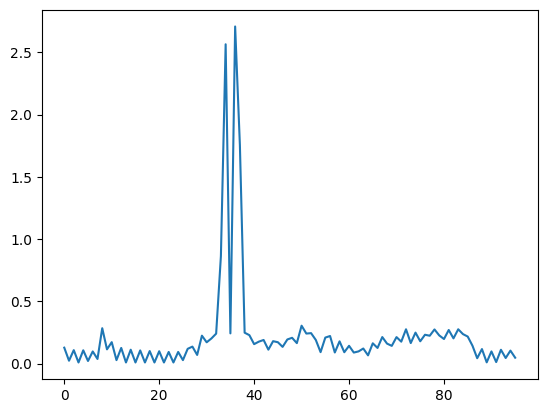

In [249]:
df_t['Load (kW)'].plot()

In [263]:
df1

deployment_id  block      date  Load (kW)
23078            D0014      0  1/1/2018   0.032266
351894           D0014      1  1/1/2018   0.129118
12582684         D0014      2  1/1/2018   0.032455
547055           D0014      3  1/1/2018   0.132077
23236            D0014      4  1/1/2018   0.032447
...                ...    ...       ...        ...
3957782          D0014     91  9/9/2019   0.034678
3475918          D0014     92  9/9/2019   0.142143
7636783          D0014     93  9/9/2019   0.154624
10085042         D0014     94  9/9/2019   0.032738
3315230          D0014     95  9/9/2019   0.158422

[87038 rows x 4 columns]

In [264]:
df1['Day']=pd.to_datetime(df1['date']).dt.dayofweek
df1['Month']=pd.DatetimeIndex(df1['date']).month
df1

deployment_id  block      date  Load (kW)  Day  Month
23078            D0014      0  1/1/2018   0.032266    0      1
351894           D0014      1  1/1/2018   0.129118    0      1
12582684         D0014      2  1/1/2018   0.032455    0      1
547055           D0014      3  1/1/2018   0.132077    0      1
23236            D0014      4  1/1/2018   0.032447    0      1
...                ...    ...       ...        ...  ...    ...
3957782          D0014     91  9/9/2019   0.034678    0      9
3475918          D0014     92  9/9/2019   0.142143    0      9
7636783          D0014     93  9/9/2019   0.154624    0      9
10085042         D0014     94  9/9/2019   0.032738    0      9
3315230          D0014     95  9/9/2019   0.158422    0      9

[87038 rows x 6 columns]

In [265]:
df1

deployment_id  block      date  Load (kW)  Day  Month
23078            D0014      0  1/1/2018   0.032266    0      1
351894           D0014      1  1/1/2018   0.129118    0      1
12582684         D0014      2  1/1/2018   0.032455    0      1
547055           D0014      3  1/1/2018   0.132077    0      1
23236            D0014      4  1/1/2018   0.032447    0      1
...                ...    ...       ...        ...  ...    ...
3957782          D0014     91  9/9/2019   0.034678    0      9
3475918          D0014     92  9/9/2019   0.142143    0      9
7636783          D0014     93  9/9/2019   0.154624    0      9
10085042         D0014     94  9/9/2019   0.032738    0      9
3315230          D0014     95  9/9/2019   0.158422    0      9

[87038 rows x 6 columns]

In [266]:
df1.drop('deployment_id',axis=1,inplace=True)

In [267]:
df1 = df1.loc[:,['Load (kW)','block','Day','Month']]

In [268]:
df1

Load (kW)  block  Day  Month
23078      0.032266      0    0      1
351894     0.129118      1    0      1
12582684   0.032455      2    0      1
547055     0.132077      3    0      1
23236      0.032447      4    0      1
...             ...    ...  ...    ...
3957782    0.034678     91    0      9
3475918    0.142143     92    0      9
7636783    0.154624     93    0      9
10085042   0.032738     94    0      9
3315230    0.158422     95    0      9

[87038 rows x 4 columns]

In [269]:
scaler = MinMaxScaler(feature_range=(0,1))
df11=scaler.fit_transform(df1)
df_scaled = pd.DataFrame(df11,columns=df1.columns)
df_scaled

Load (kW)     block  Day     Month
0       0.008312  0.000000  0.0  0.000000
1       0.033261  0.010526  0.0  0.000000
2       0.008360  0.021053  0.0  0.000000
3       0.034023  0.031579  0.0  0.000000
4       0.008358  0.042105  0.0  0.000000
...          ...       ...  ...       ...
87033   0.008933  0.957895  0.0  0.727273
87034   0.036616  0.968421  0.0  0.727273
87035   0.039831  0.978947  0.0  0.727273
87036   0.008433  0.989474  0.0  0.727273
87037   0.040809  1.000000  0.0  0.727273

[87038 rows x 4 columns]

In [272]:
X=df_scaled.drop('Load (kW)',axis=1)
y=df_scaled['Load (kW)']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [273]:
training_size=int(len(df_scaled)*0.90)
test_size=len(df_scaled)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:4],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df_scaled),1:4],df_scaled.iloc[training_size:len(df_scaled),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(78334, 3) (78334,) (8704, 3) (8704,)


In [274]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [275]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(1,3)))
model1.add(LSTM(50))
#model1.dropout(0.5)
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 50)             10800     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [276]:
model_history=model1.fit(X_train, y_train, batch_size = 64,epochs = 50, validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
1224/1224 [==============================] - 17s 5ms/step - loss: 0.0106 - val_loss: 0.0107
Epoch 2/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0102 - val_loss: 0.0105
Epoch 3/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0101 - val_loss: 0.0106
Epoch 4/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0100 - val_loss: 0.0094
Epoch 5/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0083 - val_loss: 0.0084
Epoch 6/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0075 - val_loss: 0.0080
Epoch 7/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0071 - val_loss: 0.0076
Epoch 8/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0070 - val_loss: 0.0086
Epoch 9/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 10/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.00

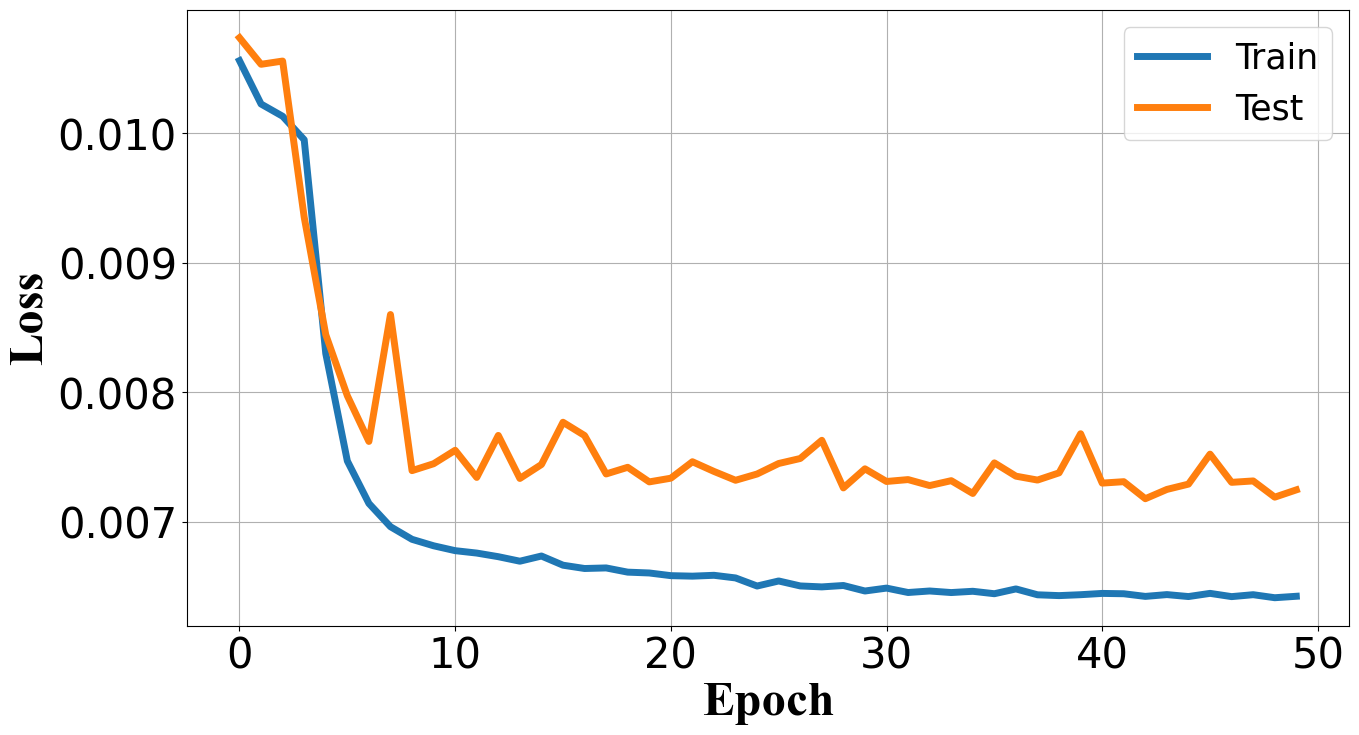

In [277]:
plt.figure(figsize=(15,8))
plt.plot(model_history.history['loss'],linewidth=5)
plt.plot(model_history.history['val_loss'],linewidth=5)
#plt.title('Model Loss',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.ylabel('Loss',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.xlabel('Epoch',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.legend(['Train', 'Test'], loc='upper right',fontsize=25)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.savefig('Cmodel.png')
#plt.savefig('Cmodel.pdf')
plt.grid()
plt.show()

In [278]:
size = df_scaled.shape[1]

In [279]:
yhat = model1.predict(X_test)

272/272 [==============================] - 2s 2ms/step


In [280]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.085


In [281]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [282]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(8704,)

In [283]:
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(8704,)

In [284]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.330


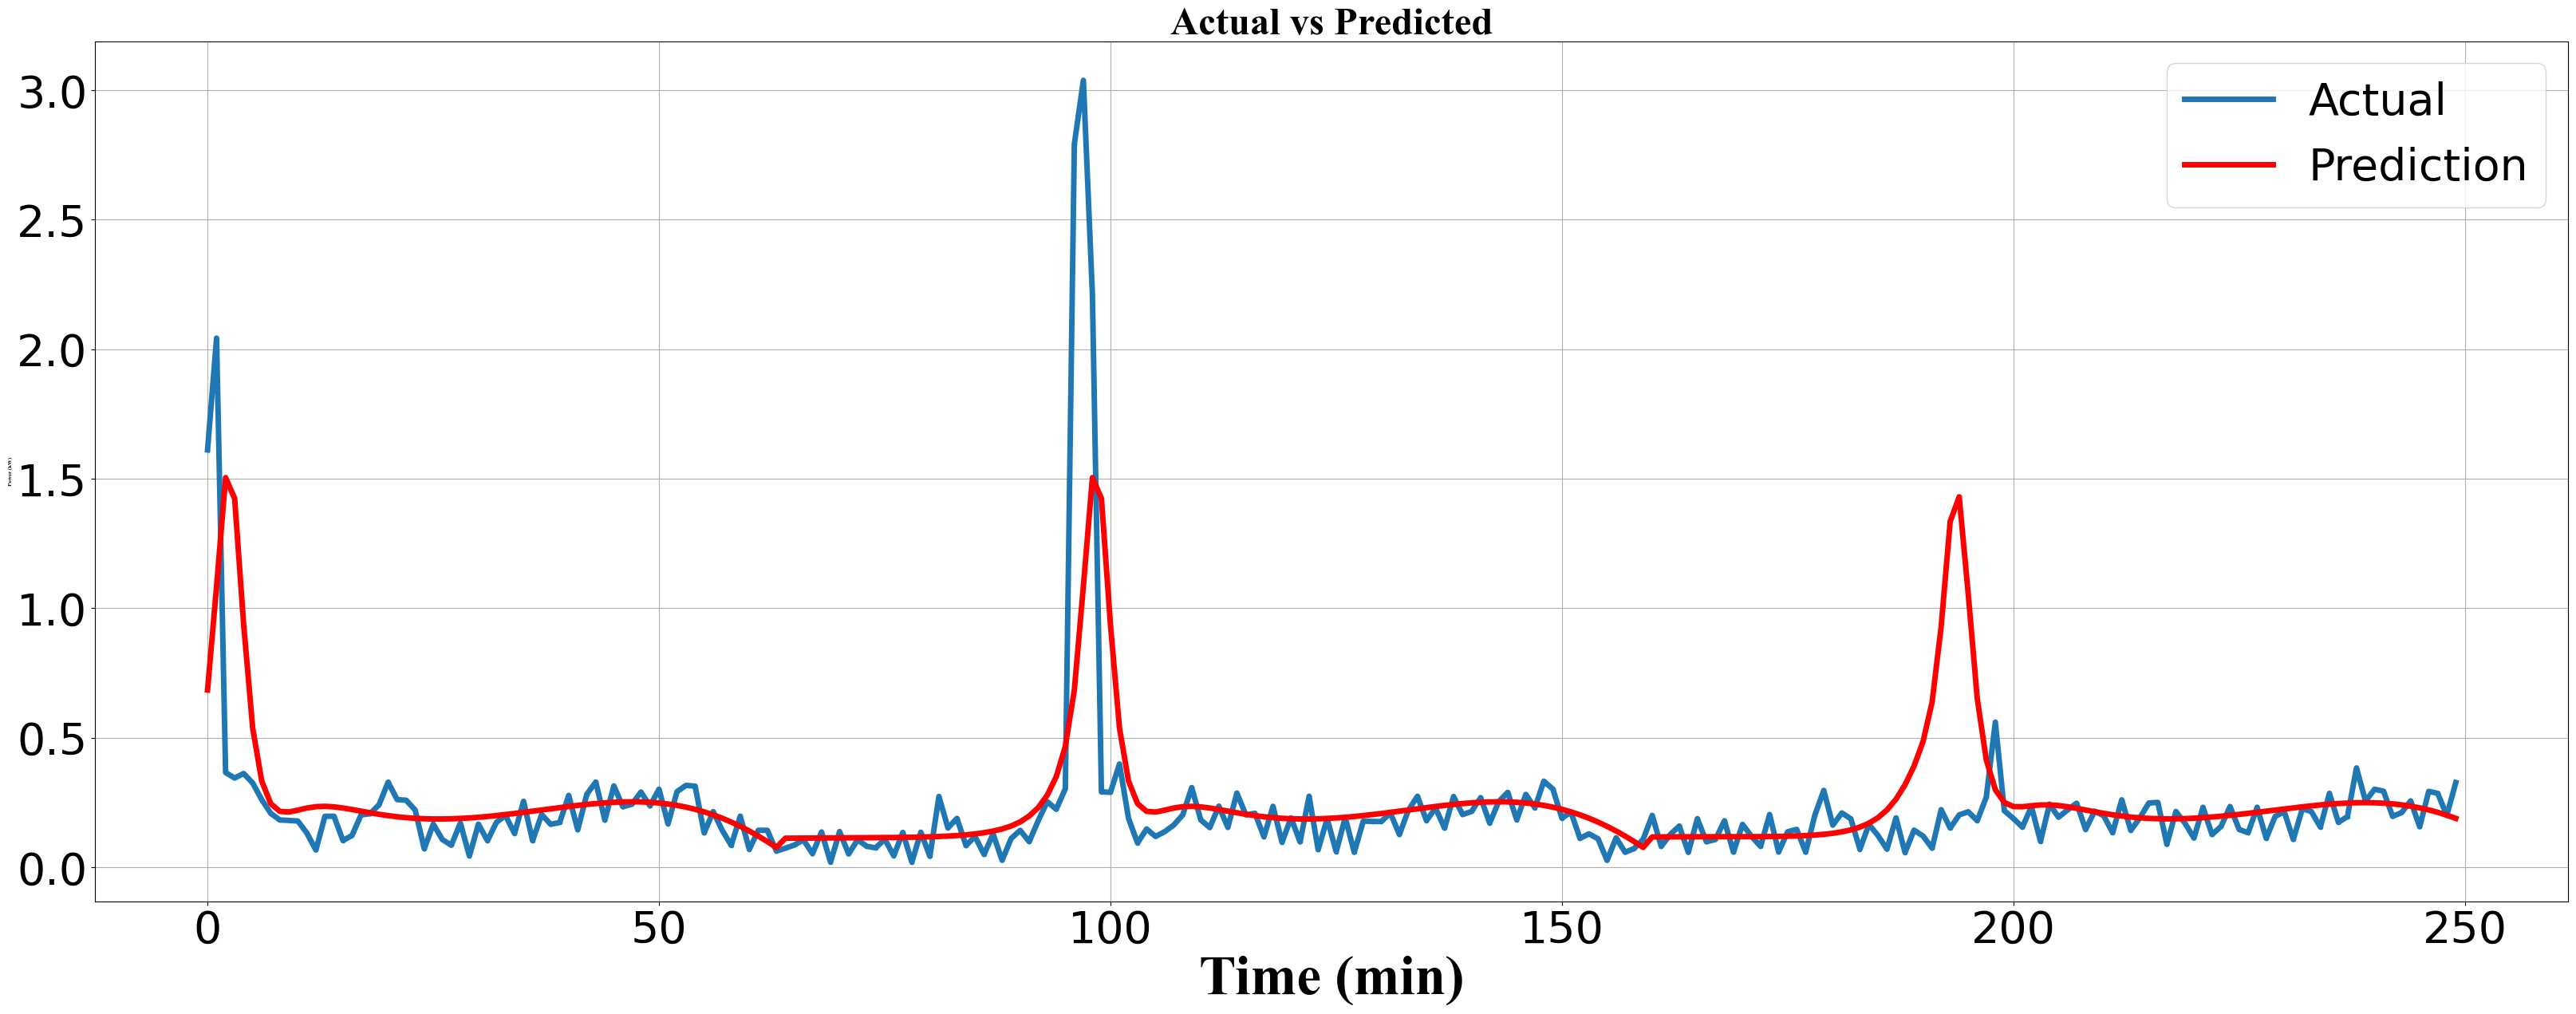

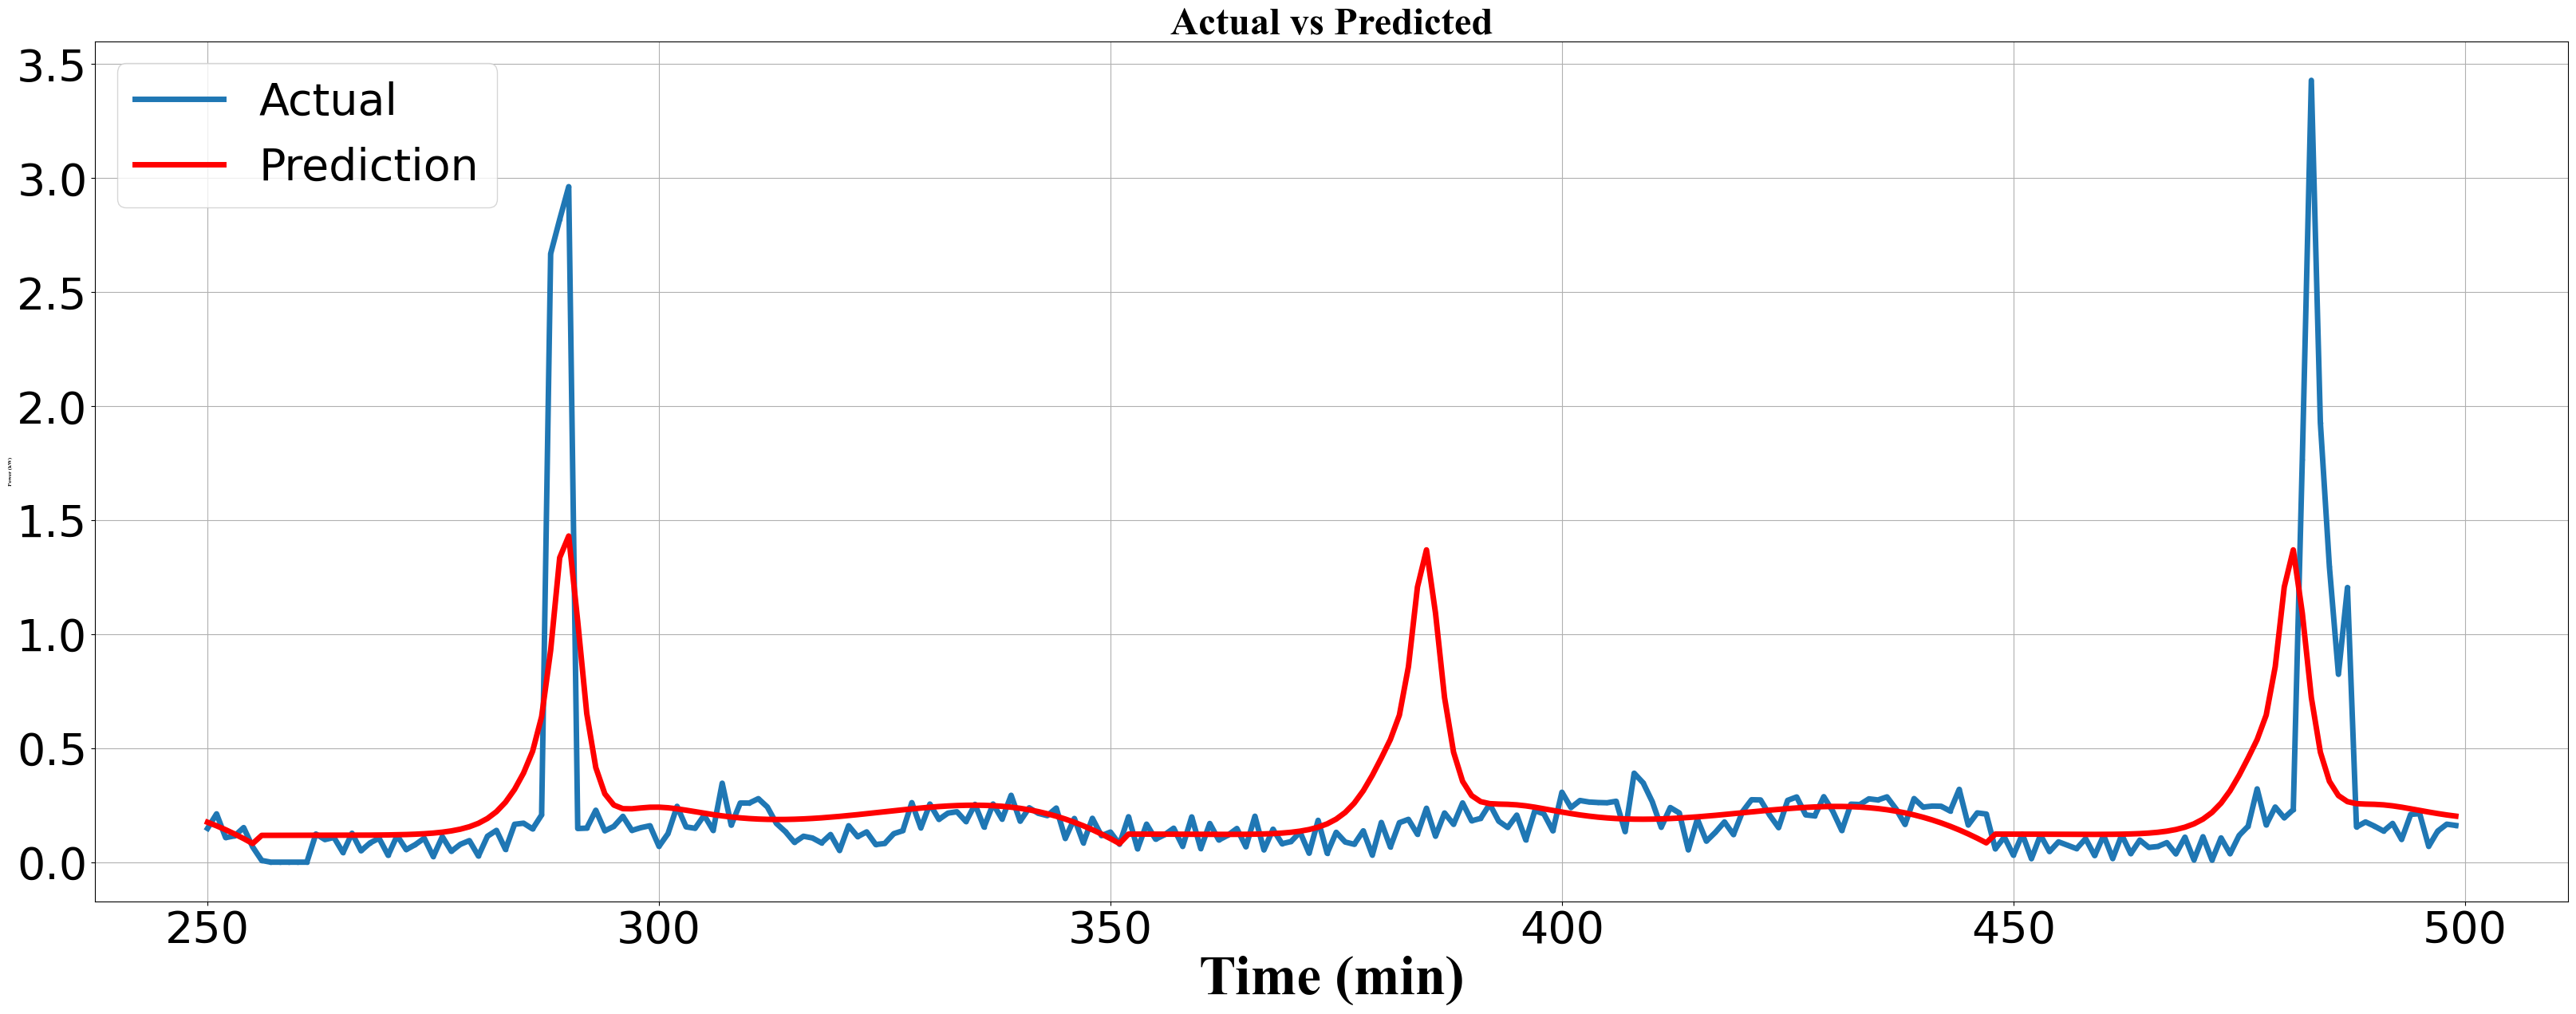

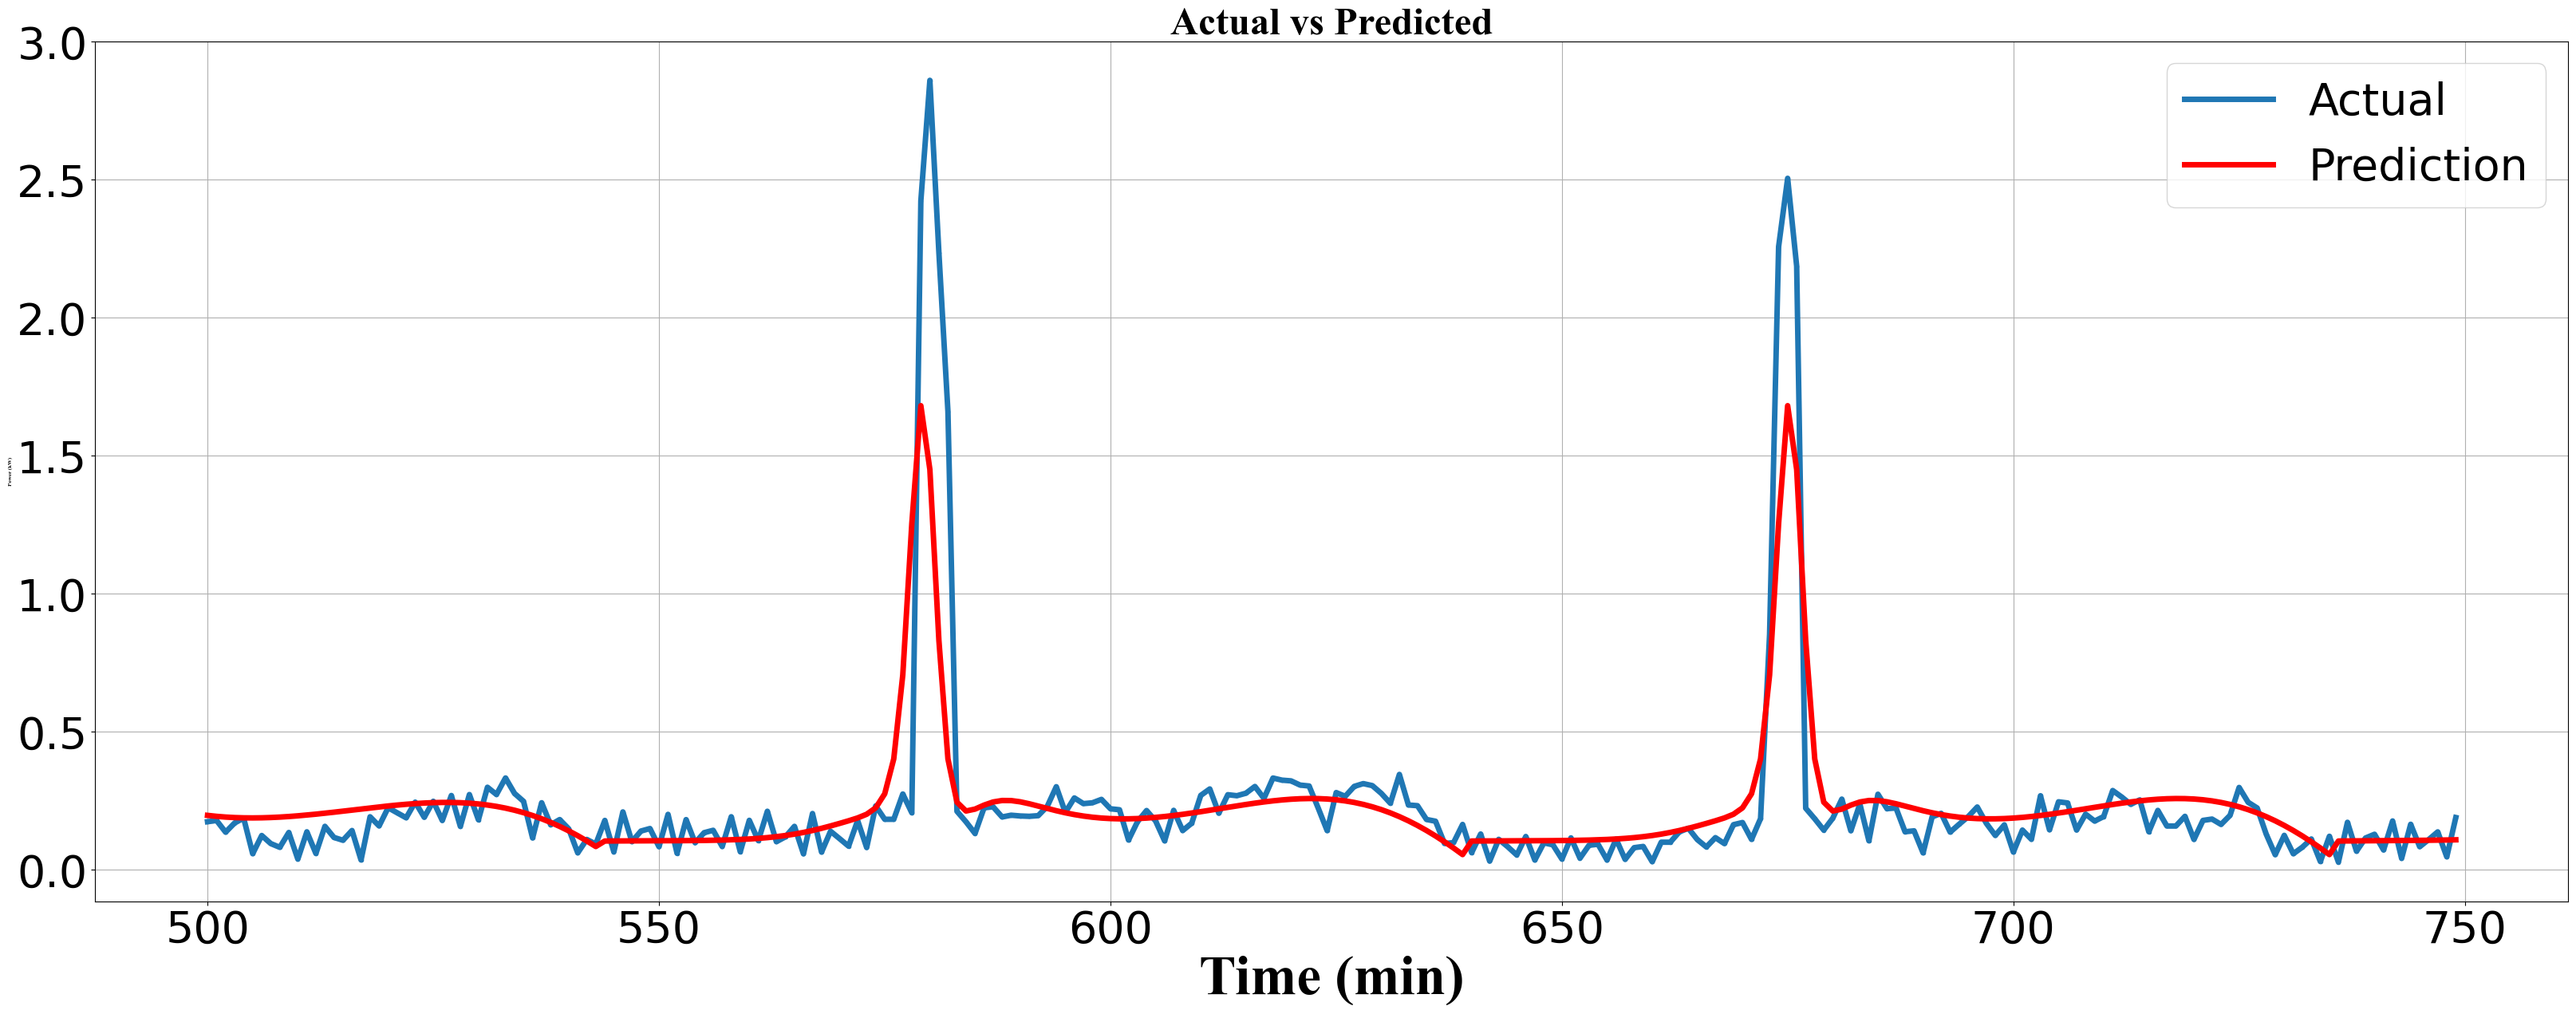

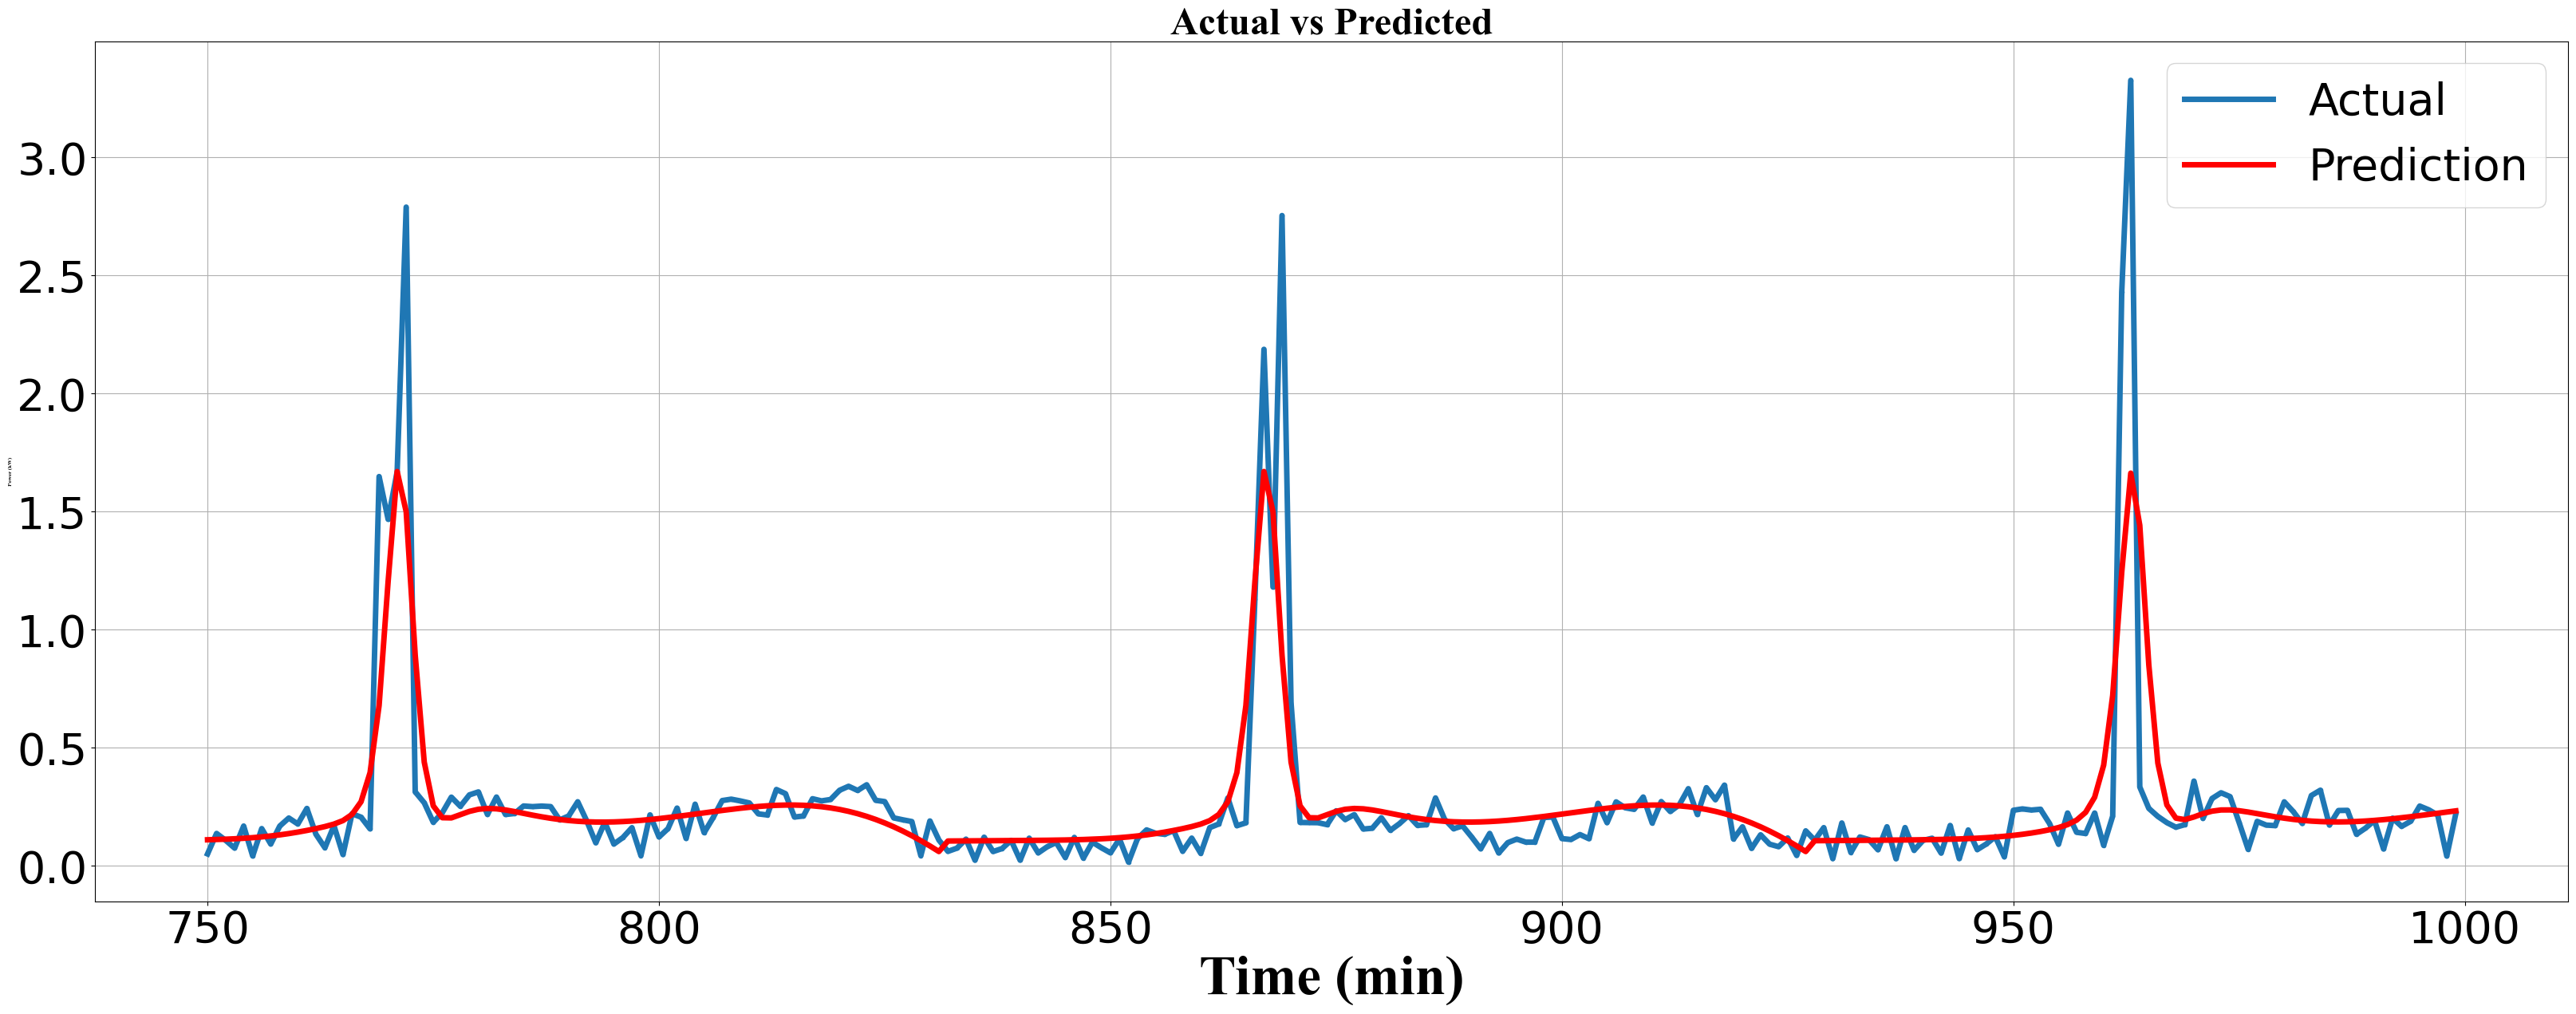

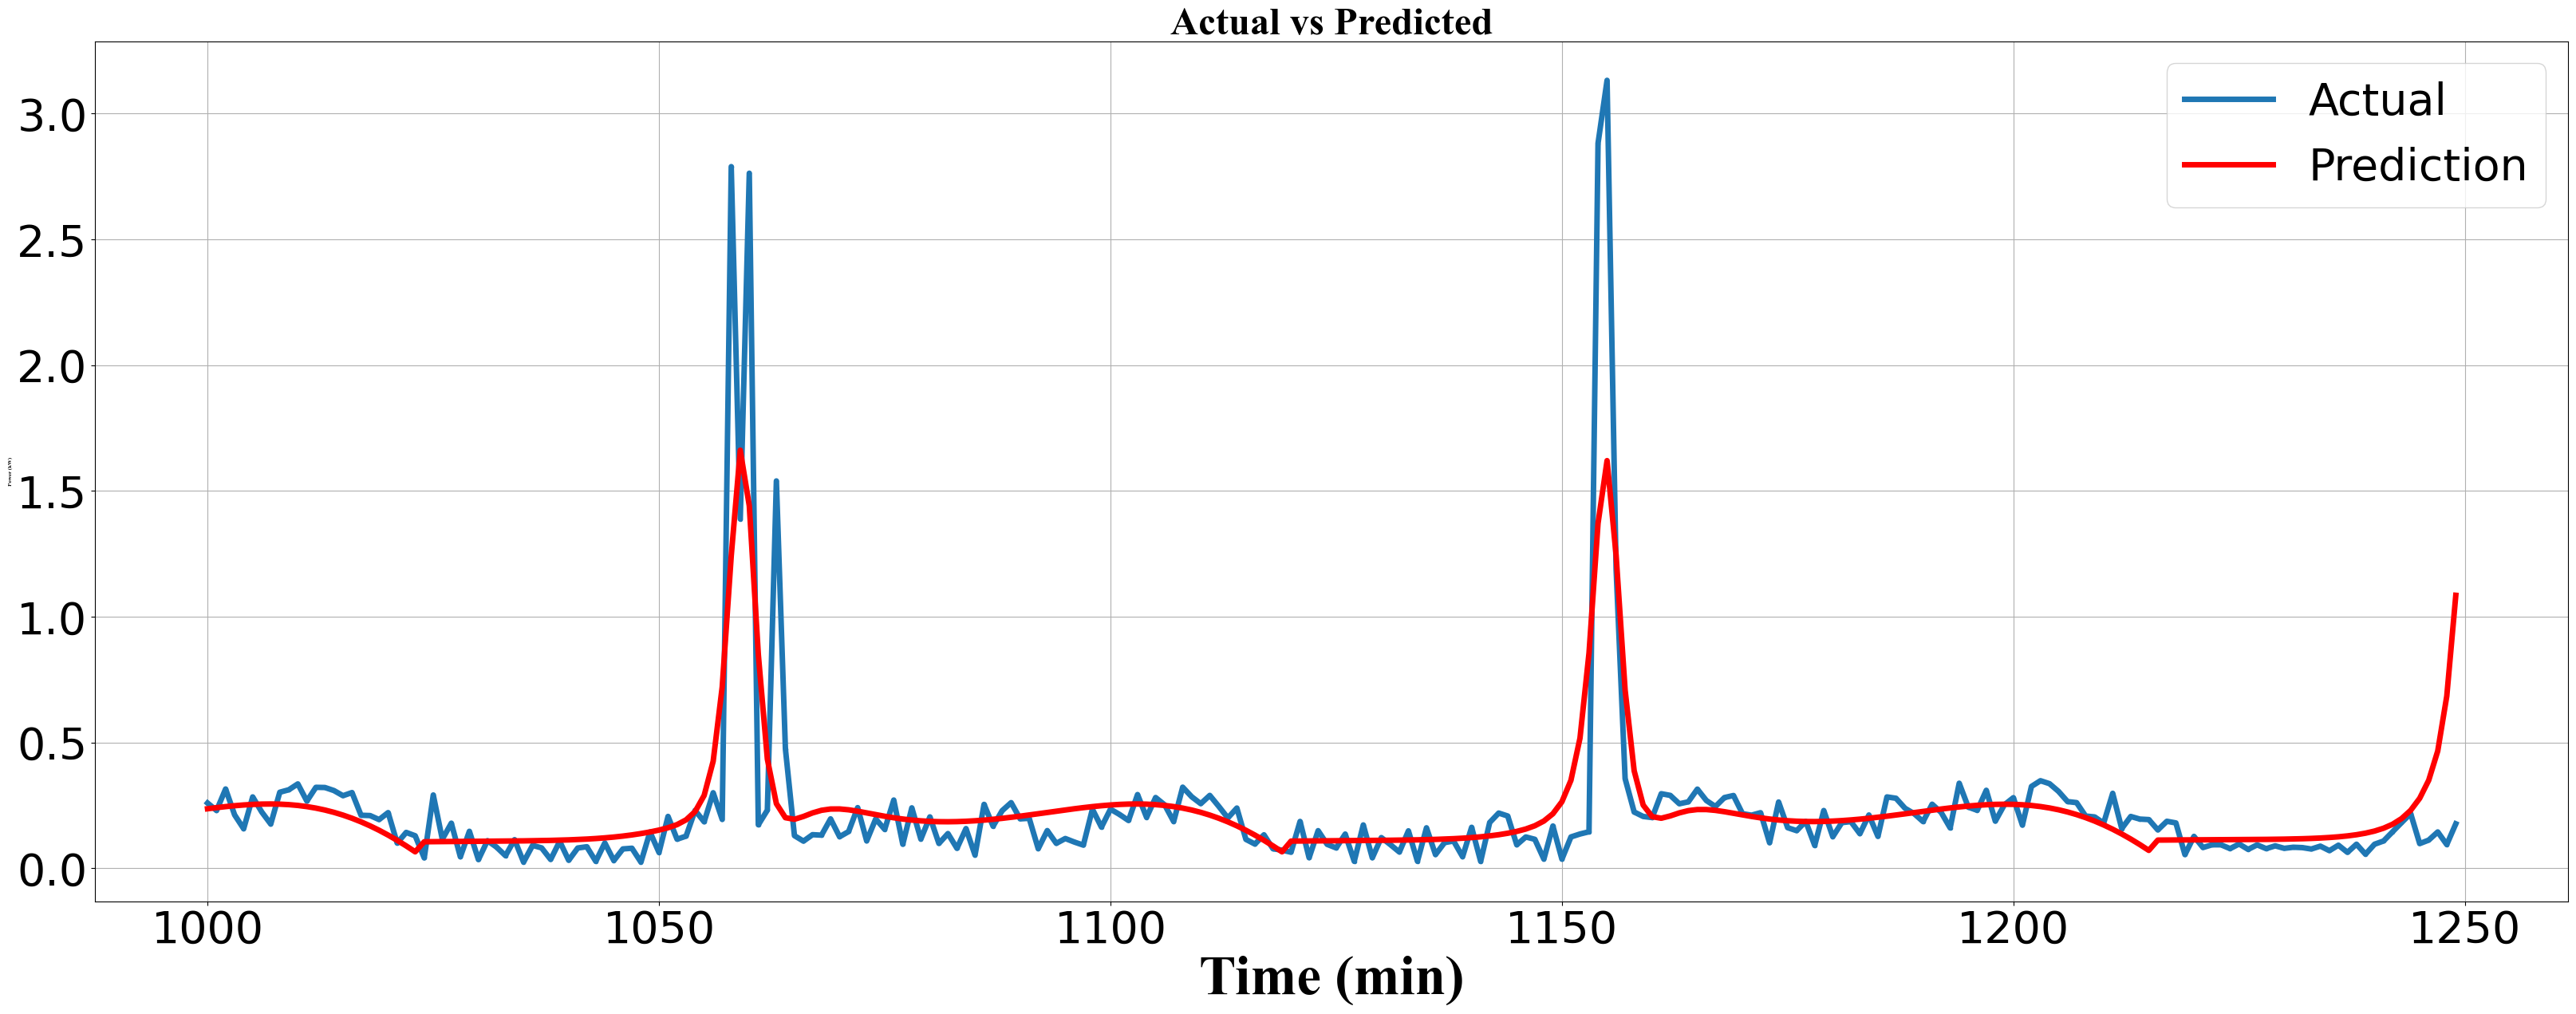

In [285]:
y=0
for i in range(250,1500,250):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(40,14)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="Actual",linewidth=5)
    plt.plot(aa, inv_yhat[y:i], 'r', label="Prediction",linewidth=5)
    y = i
    plt.xlabel('Time (min)',fontsize=50,fontname="Times New Roman",fontweight="bold")
    plt.ylabel('Power (kW)',fontsize=5,fontname="Times New Roman",fontweight="bold")
    plt.title('Actual vs Predicted',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.legend(fontsize=40)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.grid()
    #plt.savefig('C_pred.pdf')
    #plt.savefig('C_pred.png')
    plt.show()

In [305]:
df


deployment_id  block        date  Load (kW)
0                D0020     35    2/3/2018   0.113429
1                D0020     35   2/22/2018   0.017000
2                D0020     35    3/4/2018   0.162748
3                D0020     35    3/5/2018   0.784350
4                D0020     35   3/13/2018   0.114382
...                ...    ...         ...        ...
12702796         D0271     95   9/30/2019   0.027400
12702797         D0271     95   2/18/2020   0.012333
12702798         D0272     95  12/19/2019   0.008533
12702799         D0272     95    5/9/2020   0.034667
12702800         D0273     95   2/16/2020   0.000000

[12702801 rows x 4 columns]

In [306]:
df_h2 = df.groupby('deployment_id').get_group('D0004')

In [307]:
df_h2 = df_h2.sort_values(by=['date','block'])

In [308]:
df_h2

deployment_id  block      date  Load (kW)
527728           D0004      0  1/1/2018   0.262803
55472            D0004      1  1/1/2018   0.254921
577093           D0004      2  1/1/2018   0.251561
227483           D0004      3  1/1/2018   0.151294
227523           D0004      4  1/1/2018   0.116158
...                ...    ...       ...        ...
10779544         D0004     91  9/9/2019   1.309702
2735539          D0004     92  9/9/2019   0.341426
8164437          D0004     93  9/9/2019   0.228316
8165610          D0004     94  9/9/2019   0.247685
6504855          D0004     95  9/9/2019   0.263677

[87018 rows x 4 columns]

In [309]:
df_h = df_h2.groupby('date').get_group('2/1/2019')

In [310]:
df_h=df_h.reset_index()

<AxesSubplot: >

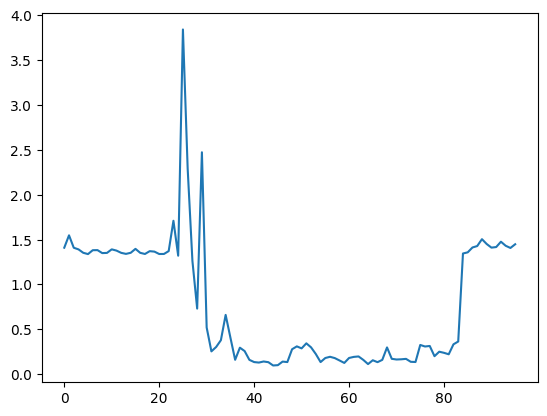

In [311]:
df_h['Load (kW)'].plot()

In [312]:
df_h2['Day']=pd.to_datetime(df_h2['date']).dt.dayofweek
df_h2['Month']=pd.DatetimeIndex(df_h2['date']).month
df_h2

deployment_id  block      date  Load (kW)  Day  Month
527728           D0004      0  1/1/2018   0.262803    0      1
55472            D0004      1  1/1/2018   0.254921    0      1
577093           D0004      2  1/1/2018   0.251561    0      1
227483           D0004      3  1/1/2018   0.151294    0      1
227523           D0004      4  1/1/2018   0.116158    0      1
...                ...    ...       ...        ...  ...    ...
10779544         D0004     91  9/9/2019   1.309702    0      9
2735539          D0004     92  9/9/2019   0.341426    0      9
8164437          D0004     93  9/9/2019   0.228316    0      9
8165610          D0004     94  9/9/2019   0.247685    0      9
6504855          D0004     95  9/9/2019   0.263677    0      9

[87018 rows x 6 columns]

In [313]:
df_h2 = df_h2.loc[:,['Load (kW)','block','Day','Month']]

In [314]:
scaler = MinMaxScaler(feature_range=(0,1))
df11=scaler.fit_transform(df_h2)
df_scaled = pd.DataFrame(df11,columns=df_h2.columns)
df_scaled

Load (kW)     block  Day     Month
0       0.045666  0.000000  0.0  0.000000
1       0.044297  0.010526  0.0  0.000000
2       0.043713  0.021053  0.0  0.000000
3       0.026290  0.031579  0.0  0.000000
4       0.020184  0.042105  0.0  0.000000
...          ...       ...  ...       ...
87013   0.227582  0.957895  0.0  0.727273
87014   0.059328  0.968421  0.0  0.727273
87015   0.039674  0.978947  0.0  0.727273
87016   0.043039  0.989474  0.0  0.727273
87017   0.045818  1.000000  0.0  0.727273

[87018 rows x 4 columns]

In [315]:
X=df_scaled.drop('Load (kW)',axis=1)
y=df_scaled['Load (kW)']
X = np.asarray(X).astype(np.float32)
y= np.asarray(y).astype(np.float32)

In [316]:
training_size=int(len(df_scaled)*0.90)
test_size=len(df_scaled)-training_size
X_train,y_train,X_test,y_test=df_scaled.iloc[0:training_size,1:4],df_scaled.iloc[0:training_size,0],df_scaled.iloc[training_size:len(df_scaled),1:4],df_scaled.iloc[training_size:len(df_scaled),0]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(78316, 3) (78316,) (8702, 3) (8702,)


In [317]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test  = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [318]:
model2=Sequential()
model2.add(LSTM(50,return_sequences=True,input_shape=(1,3)))
model2.add(LSTM(50))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error',optimizer='adam')
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 50)             10800     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [319]:
model_history=model2.fit(X_train, y_train, batch_size = 64,epochs = 50, validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
1224/1224 [==============================] - 12s 6ms/step - loss: 0.0082 - val_loss: 0.0032
Epoch 2/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0080 - val_loss: 0.0038
Epoch 3/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0079 - val_loss: 0.0030
Epoch 4/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0079 - val_loss: 0.0033
Epoch 5/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0078 - val_loss: 0.0029
Epoch 6/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0078 - val_loss: 0.0029
Epoch 7/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0078 - val_loss: 0.0028
Epoch 8/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0078 - val_loss: 0.0028
Epoch 9/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.0077 - val_loss: 0.0028
Epoch 10/50
1224/1224 [==============================] - 5s 4ms/step - loss: 0.00

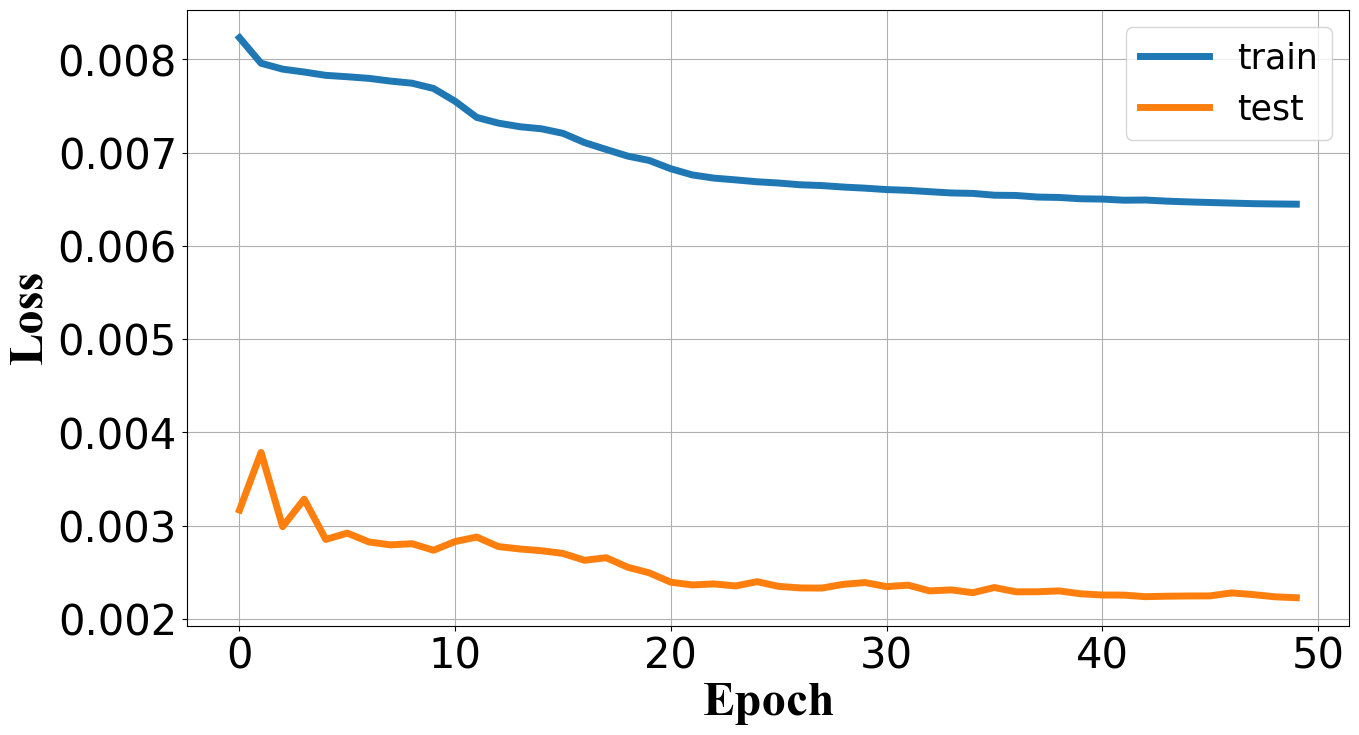

In [320]:
plt.figure(figsize=(15,8))
plt.plot(model_history.history['loss'],linewidth=5)
plt.plot(model_history.history['val_loss'],linewidth=5)
#plt.title('Model loss',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.ylabel('Loss',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.xlabel('Epoch',fontsize=35,fontname="Times New Roman",fontweight="bold")
plt.legend(['train', 'test'], loc='upper right',fontsize=25)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid()
#plt.savefig('H_Model.png')
#plt.savefig('H_Model.pdf')
plt.show()

In [321]:
size = df_h2.shape[1]

In [322]:
X_test.shape

(8702, 1, 3)

In [323]:
yhat = model2.predict(X_test)

272/272 [==============================] - 1s 2ms/step


In [324]:
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.047


In [325]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [326]:
inv_yhat = np.concatenate((yhat, X_test[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

(8702,)

In [327]:
y_test = y_test.reshape((len(y_test), 1))
inv_y = np.concatenate((y_test, X_test[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(8702,)

In [328]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.272


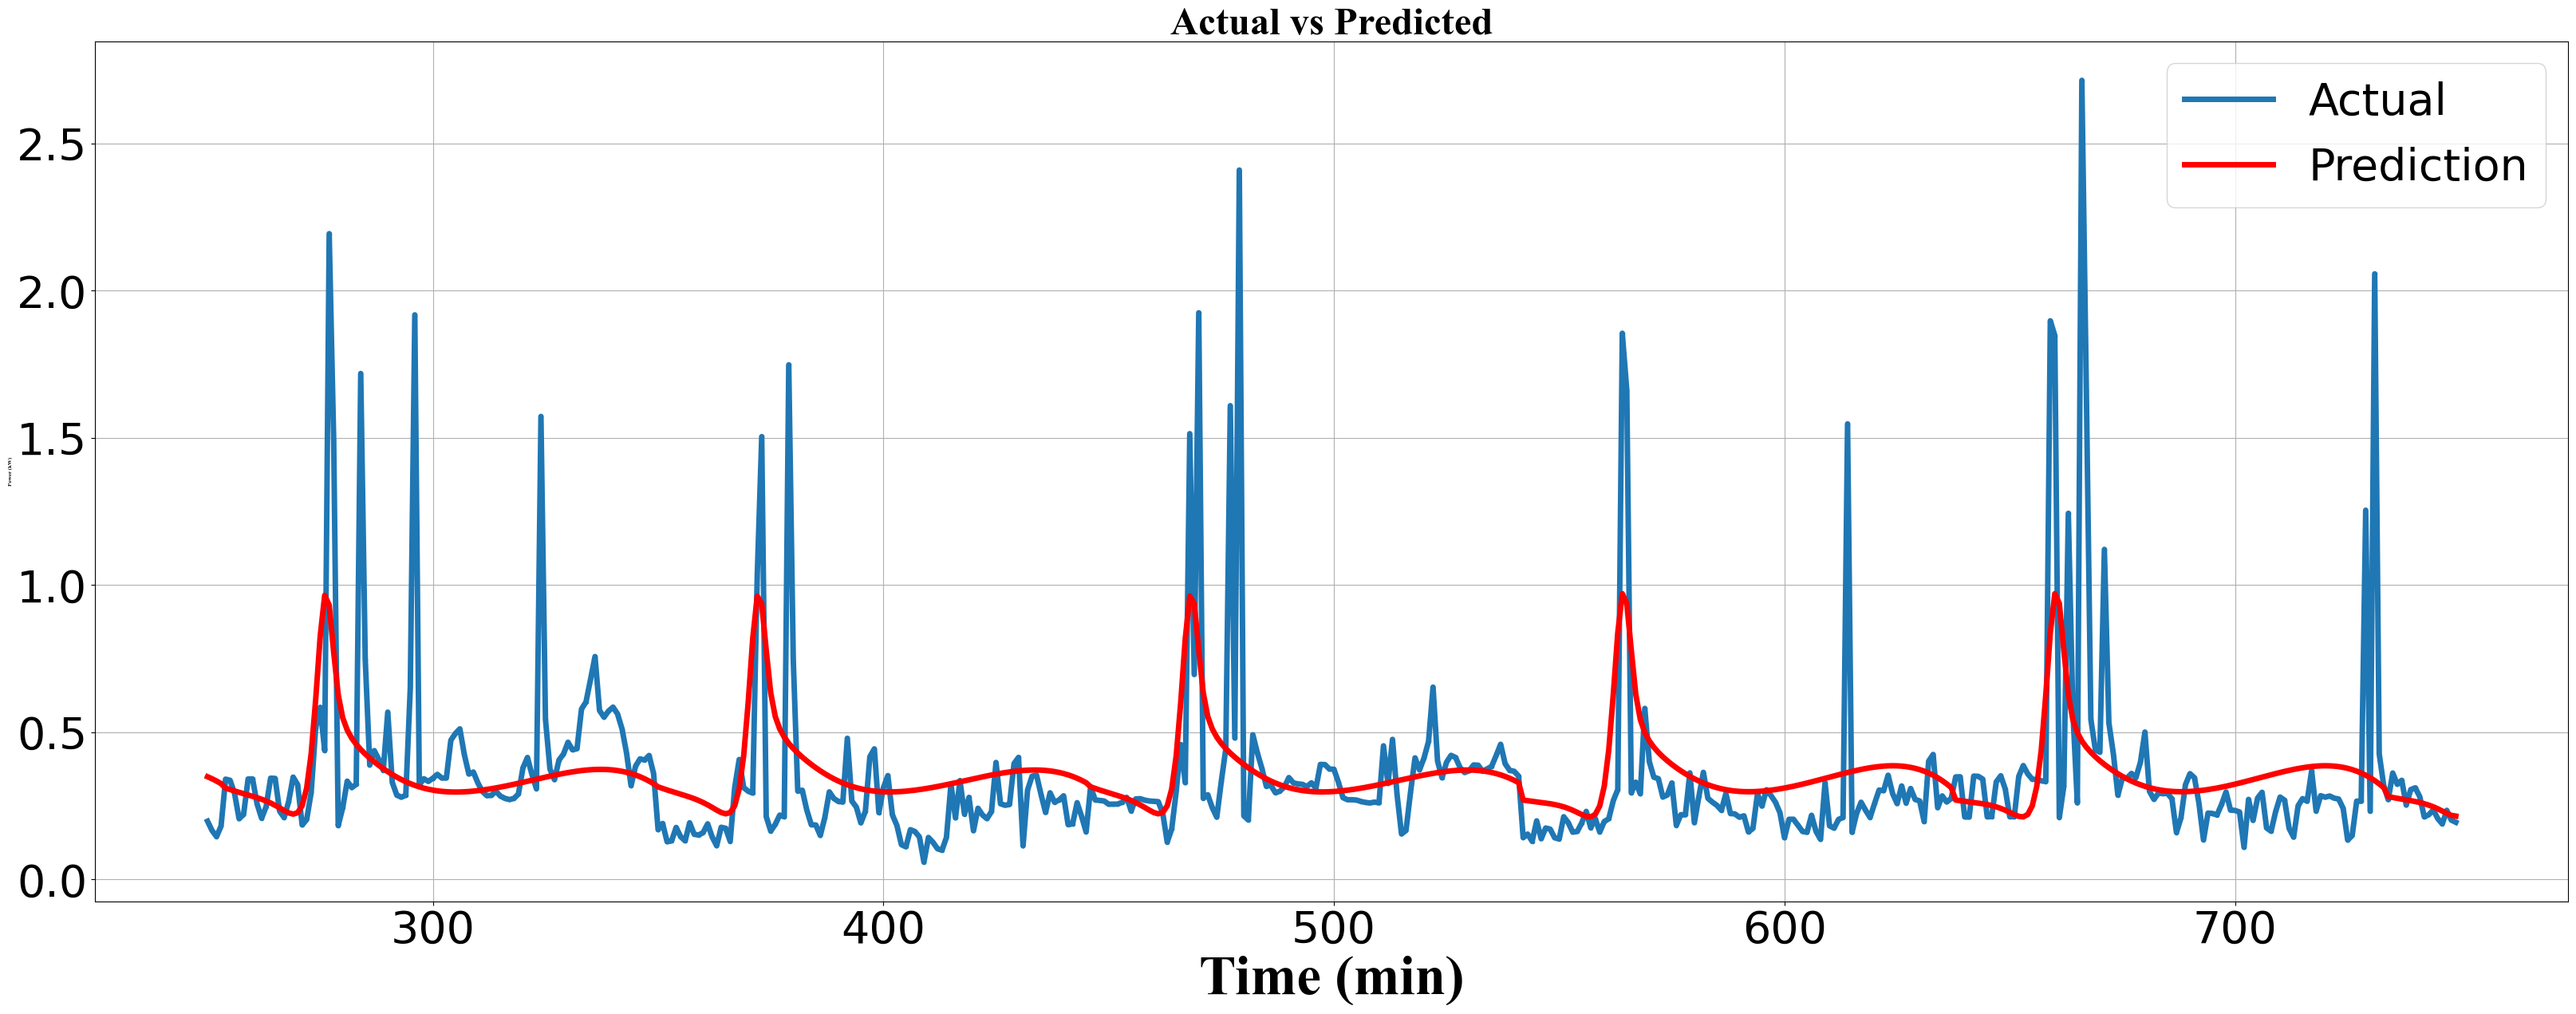

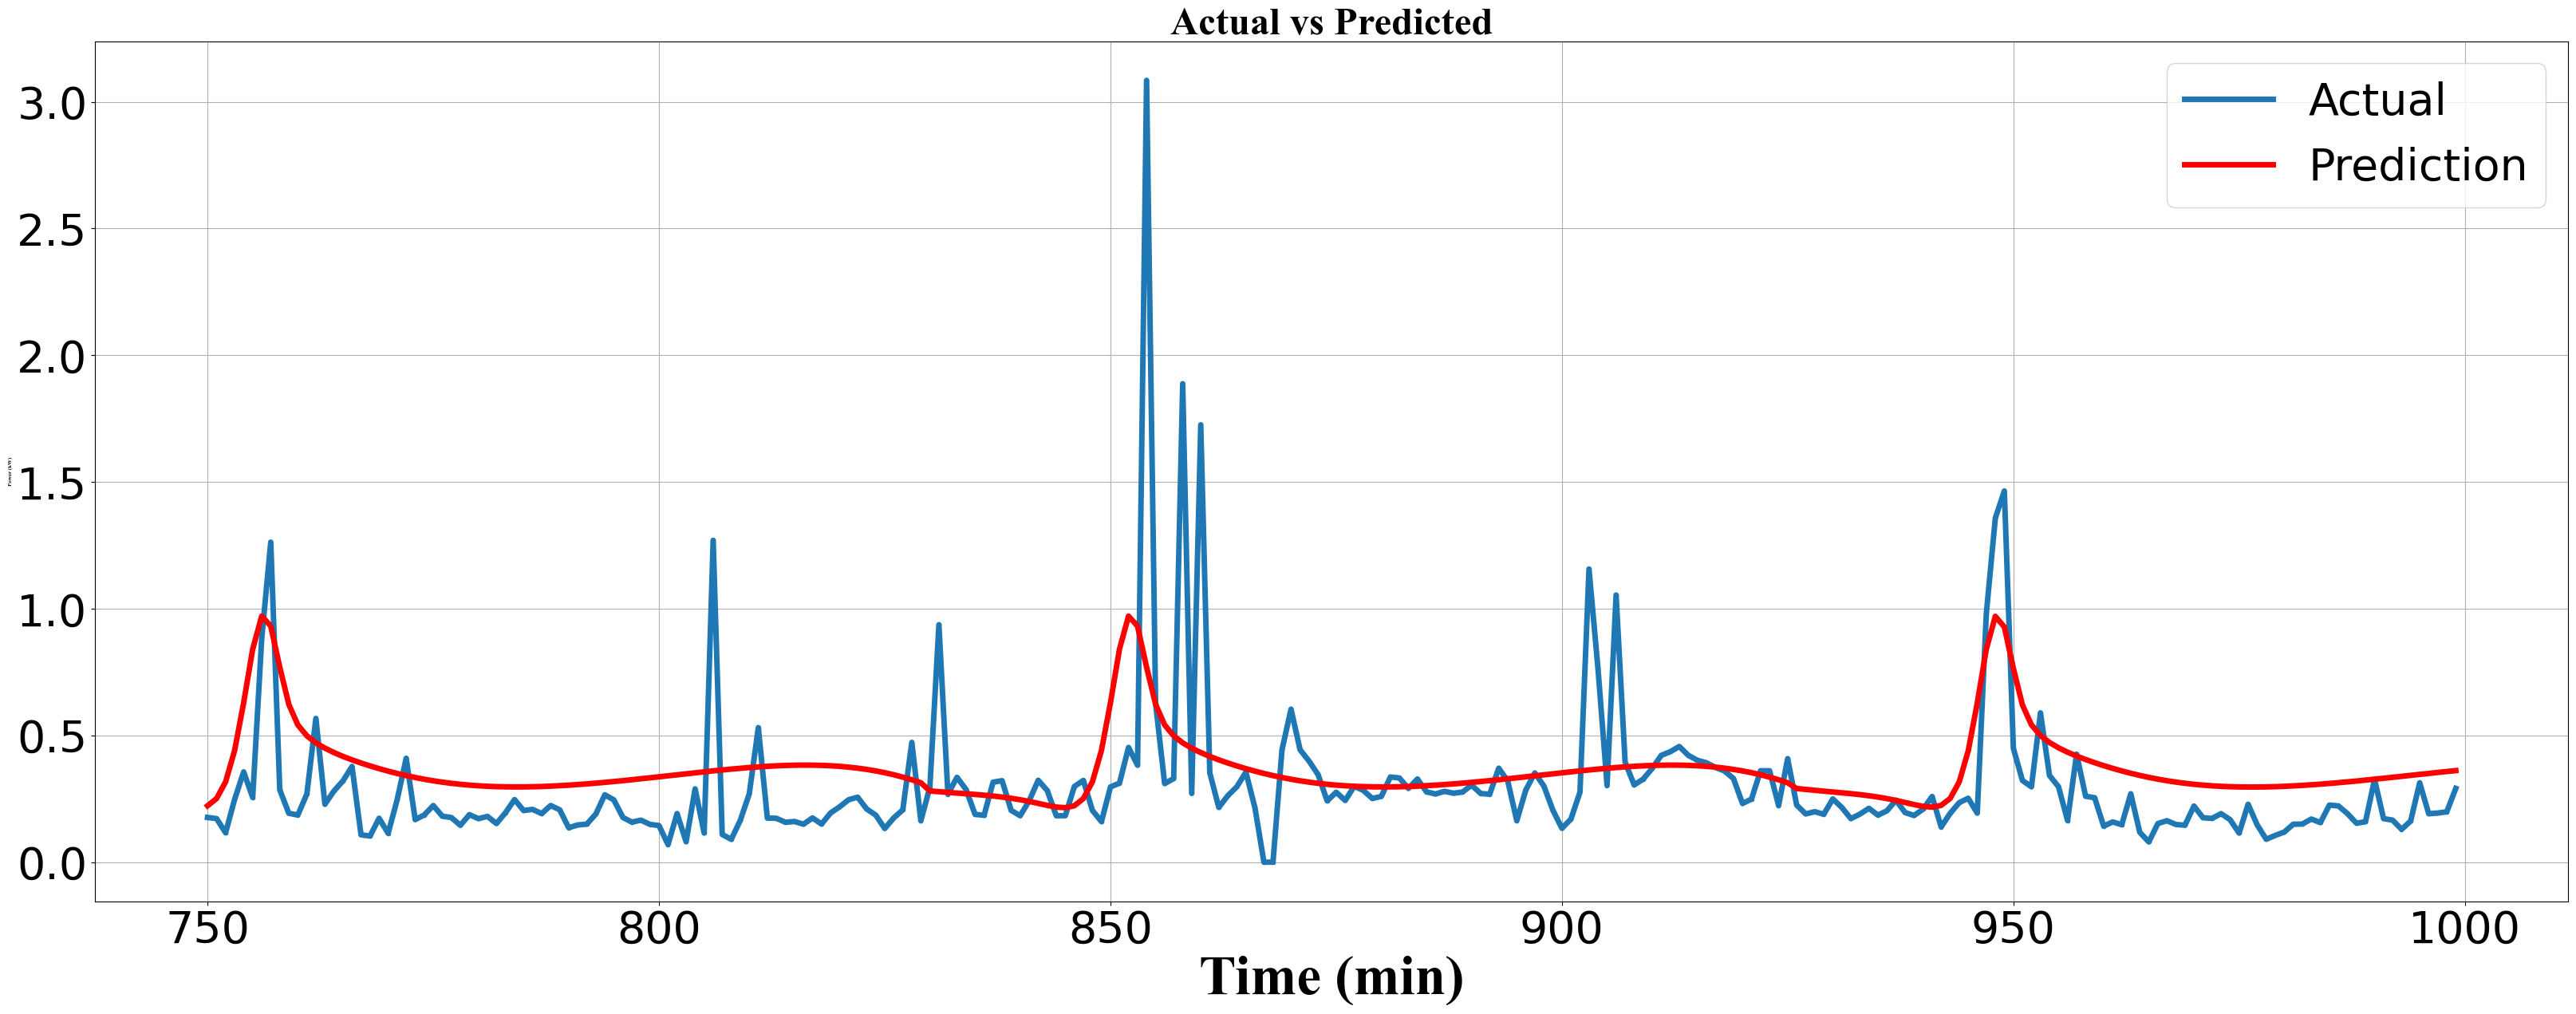

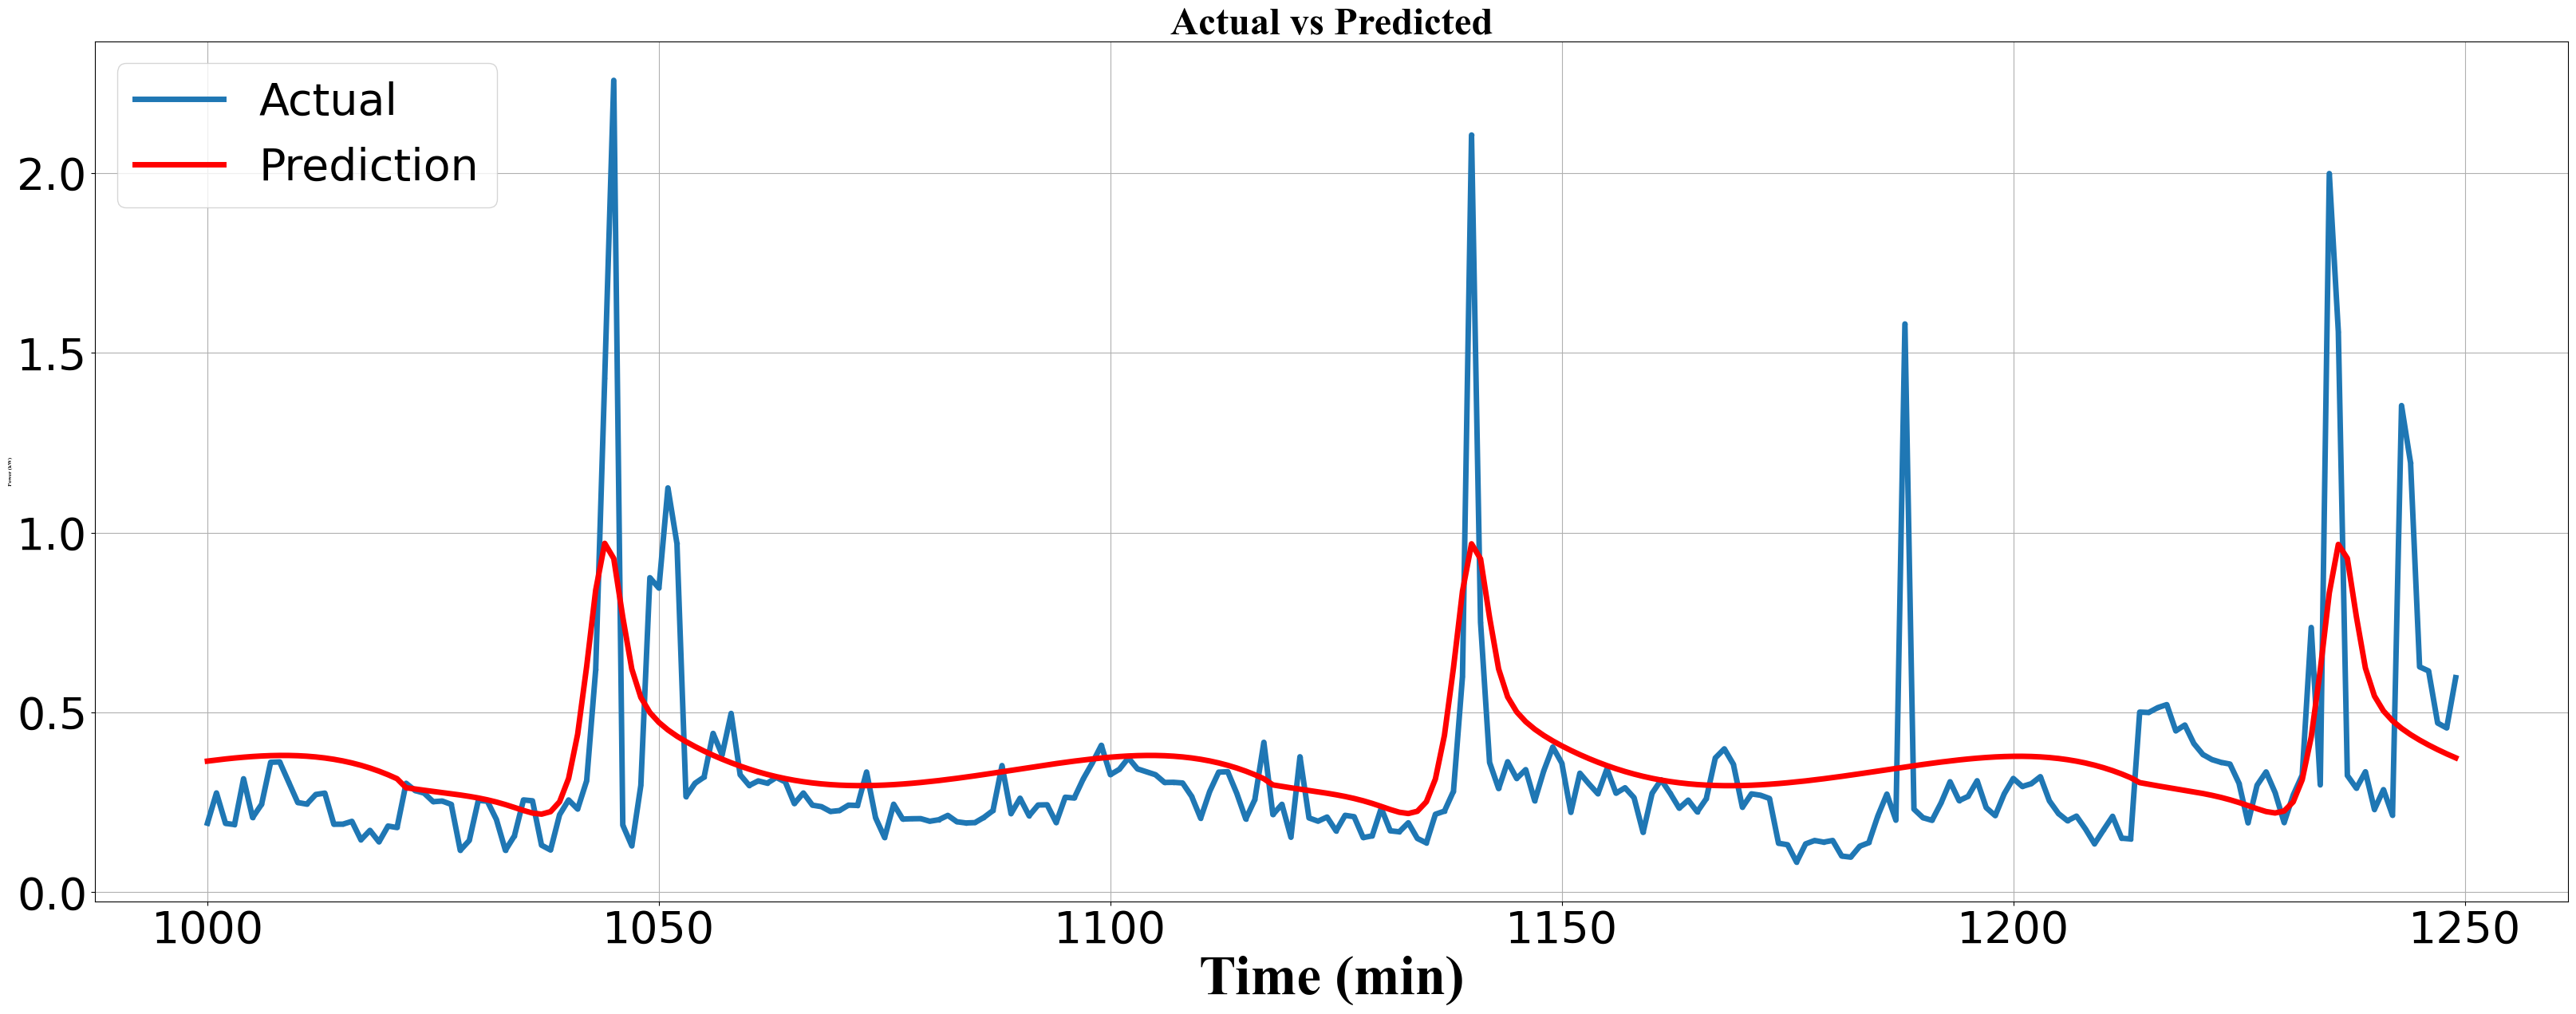

In [331]:
y=250
for i in range(750,1500,250):
    aa=[x for x in range(y,i)]
    plt.figure(figsize=(40,14)) 
    plt.plot(aa, inv_y[y:i], marker='.', label="Actual",linewidth=5)
    plt.plot(aa, inv_yhat[y:i], 'r', label="Prediction",linewidth=5)
    y = i
    plt.xlabel('Time (min)',fontsize=50,fontname="Times New Roman",fontweight="bold")
    plt.ylabel('Power (kW)',fontsize=5,fontname="Times New Roman",fontweight="bold")
    plt.title('Actual vs Predicted',fontsize=35,fontname="Times New Roman",fontweight="bold")
    plt.legend(fontsize=40)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.grid()
    #plt.savefig('C_pred.pdf')
    #plt.savefig('C_pred.png')
    plt.show()

In [332]:
df

deployment_id  block        date  Load (kW)
0                D0020     35    2/3/2018   0.113429
1                D0020     35   2/22/2018   0.017000
2                D0020     35    3/4/2018   0.162748
3                D0020     35    3/5/2018   0.784350
4                D0020     35   3/13/2018   0.114382
...                ...    ...         ...        ...
12702796         D0271     95   9/30/2019   0.027400
12702797         D0271     95   2/18/2020   0.012333
12702798         D0272     95  12/19/2019   0.008533
12702799         D0272     95    5/9/2020   0.034667
12702800         D0273     95   2/16/2020   0.000000

[12702801 rows x 4 columns]

In [333]:
df1= pd.read_csv('dataset\main\Household-Deployment basic info.csv')
df1.head()

deployment_id household_id Deployment type     Region  \
0         D0001         H001       appliance  Pune city   
1         D0002         H001        Mainline  Pune city   
2         D0003         H002       appliance  Pune city   
3         D0004         H002        Mainline  Pune city   
4         D0005         H003       appliance  Pune city   

            Household type  
0                    Basic  
1                    Basic  
2    With Air Conditioners  
3    With Air Conditioners  
4  Water Heaters but no AC

In [334]:
df1 = df1.groupby('Deployment type').get_group('Mainline')
df1

deployment_id household_id Deployment type      Region  \
1           D0002         H001        Mainline   Pune city   
3           D0004         H002        Mainline   Pune city   
5           D0006         H003        Mainline   Pune city   
7           D0008         H004        Mainline   Pune city   
9           D0010         H005        Mainline   Pune city   
..            ...          ...             ...         ...   
261         D0262         H140        Mainline  Aurangabad   
263         D0264         H141        Mainline  Aurangabad   
265         D0266         H142        Mainline  Aurangabad   
267         D0268         H143        Mainline  Aurangabad   
269         D0270         H144        Mainline  Aurangabad   

              Household type  
1                      Basic  
3      With Air Conditioners  
5    Water Heaters but no AC  
7    Water Heaters but no AC  
9      With Air Conditioners  
..                       ...  
261                    Basic  
263                    Basic  
265  Water Heaters but no AC  
267    With Air Conditioners  
269  Water Heaters but no AC  

[143 rows x 5 columns]

In [335]:
df1 = df1.groupby('Region').get_group('Pune city')
df1

deployment_id household_id Deployment type     Region  \
1          D0002         H001        Mainline  Pune city   
3          D0004         H002        Mainline  Pune city   
5          D0006         H003        Mainline  Pune city   
7          D0008         H004        Mainline  Pune city   
9          D0010         H005        Mainline  Pune city   
11         D0012         H006        Mainline  Pune city   
13         D0014         H007        Mainline  Pune city   
15         D0016         H008        Mainline  Pune city   
16         D0017         H009        Mainline  Pune city   
19         D0020         H010        Mainline  Pune city   
21         D0022         H011        Mainline  Pune city   
23         D0024         H012        Mainline  Pune city   
25         D0026         H013        Mainline  Pune city   
27         D0028         H014        Mainline  Pune city   
29         D0030         H015        Mainline  Pune city   
31         D0032         H016        Mainline  Pune city   
33         D0034         H017        Mainline  Pune city   
34         D0035         H018        Mainline  Pune city   
37         D0038         H019        Mainline  Pune city   
39         D0040         H020        Mainline  Pune city   
41         D0042         H021        Mainline  Pune city   
43         D0044         H022        Mainline  Pune city   
45         D0046         H023        Mainline  Pune city   
47         D0048         H024        Mainline  Pune city   
48         D0049         H025        Mainline  Pune city   
51         D0052         H026        Mainline  Pune city   
53         D0054         H027        Mainline  Pune city   
55         D0056         H028        Mainline  Pune city   
57         D0058         H029        Mainline  Pune city   
59         D0060         H030        Mainline  Pune city   
60         D0061         H031        Mainline  Pune city   
62         D0063         H032        Mainline  Pune city   
64         D0065         H033        Mainline  Pune city   
67         D0068         H034        Mainline  Pune city   
69         D0070         H035        Mainline  Pune city   
71         D0072         H036        Mainline  Pune city   
72         D0073         H037        Mainline  Pune city   
75         D0076         H038        Mainline  Pune city   
77         D0078         H039        Mainline  Pune city   
79         D0080         H040        Mainline  Pune city   
81         D0082         H041        Mainline  Pune city   
83         D0084         H042        Mainline  Pune city   
85         D0086         H043        Mainline  Pune city   
86         D0087         H044        Mainline  Pune city   

             Household type  
1                     Basic  
3     With Air Conditioners  
5   Water Heaters but no AC  
7   Water Heaters but no AC  
9     With Air Conditioners  
11                    Basic  
13  Water Heaters but no AC  
15                    Basic  
16                    Basic  
19  Water Heaters but no AC  
21  Water Heaters but no AC  
23  Water Heaters but no AC  
25    With Air Conditioners  
27  Water Heaters but no AC  
29  Water Heaters but no AC  
31  Water Heaters but no AC  
33                    Basic  
34  Water Heaters but no AC  
37    With Air Conditioners  
39                    Basic  
41    With Air Conditioners  
43    With Air Conditioners  
45    With Air Conditioners  
47  Water Heaters but no AC  
48    With Air Conditioners  
51  Water Heaters but no AC  
53    With Air Conditioners  
55  Water Heaters but no AC  
57                    Basic  
59    With Air Conditioners  
60  Water Heaters but no AC  
62                    Basic  
64    With Air Conditioners  
67  Water Heaters but no AC  
69    With Air Conditioners  
71                    Basic  
72    With Air Conditioners  
75                    Basic  
77                    Basic  
79    With Air Conditioners  
81    With Air Conditioners  
83  Water Heaters but no AC  
85          

In [336]:
df1.drop(['Region','Deployment type','Household type'],axis=1,inplace=True)
df1

C:\Users\Chandra Sekar S\AppData\Local\Temp\ipykernel_6844\3476074006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Region','Deployment type','Household type'],axis=1,inplace=True)


deployment_id household_id
1          D0002         H001
3          D0004         H002
5          D0006         H003
7          D0008         H004
9          D0010         H005
11         D0012         H006
13         D0014         H007
15         D0016         H008
16         D0017         H009
19         D0020         H010
21         D0022         H011
23         D0024         H012
25         D0026         H013
27         D0028         H014
29         D0030         H015
31         D0032         H016
33         D0034         H017
34         D0035         H018
37         D0038         H019
39         D0040         H020
41         D0042         H021
43         D0044         H022
45         D0046         H023
47         D0048         H024
48         D0049         H025
51         D0052         H026
53         D0054         H027
55         D0056         H028
57         D0058         H029
59         D0060         H030
60         D0061         H031
62         D0063         H032
64         D0065         H033
67         D0068         H034
69         D0070         H035
71         D0072         H036
72         D0073         H037
75         D0076         H038
77         D0078         H039
79         D0080         H040
81         D0082         H041
83         D0084         H042
85         D0086         H043
86         D0087         H044

In [360]:
df1 = df1.reset_index()
df1.drop('index',axis=1,inplace=True)

In [363]:
df2 = df1.reset_index()

In [364]:
df2

index deployment_id household_id
0       0         D0002         H001
1       1         D0004         H002
2       2         D0006         H003
3       3         D0008         H004
4       4         D0010         H005
5       5         D0012         H006
6       6         D0014         H007
7       7         D0016         H008
8       8         D0017         H009
9       9         D0020         H010
10     10         D0022         H011
11     11         D0024         H012
12     12         D0026         H013
13     13         D0028         H014
14     14         D0030         H015
15     15         D0032         H016
16     16         D0034         H017
17     17         D0035         H018
18     18         D0038         H019
19     19         D0040         H020
20     20         D0042         H021
21     21         D0044         H022
22     22         D0046         H023
23     23         D0048         H024
24     24         D0049         H025
25     25         D0052         H026
26     26         D0054         H027
27     27         D0056         H028
28     28         D0058         H029
29     29         D0060         H030
30     30         D0061         H031
31     31         D0063         H032
32     32         D0065         H033
33     33         D0068         H034
34     34         D0070         H035
35     35         D0072         H036
36     36         D0073         H037
37     37         D0076         H038
38     38         D0078         H039
39     39         D0080         H040
40     40         D0082         H041
41     41         D0084         H042
42     42         D0086         H043
43     43         D0087         H044

In [337]:
m1 = pd.merge(df, df1, left_on='deployment_id', right_on='deployment_id', how='left')

In [339]:
m1.dropna(axis=0,inplace=True)

In [344]:
m1 = m1.sort_values(by = ['deployment_id','date','block'])

In [345]:
m1

deployment_id  block      date  Load (kW) household_id
220121           D0002      0  1/1/2018   0.110844         H001
220147           D0002      1  1/1/2018   0.036595         H001
698858           D0002      2  1/1/2018   0.036101         H001
1012401          D0002      3  1/1/2018   0.035985         H001
698910           D0002      4  1/1/2018   0.035424         H001
...                ...    ...       ...        ...          ...
1696207          D0087     91  9/9/2019   0.165841         H044
10730077         D0087     92  9/9/2019   0.157579         H044
10784339         D0087     93  9/9/2019   0.186886         H044
9126655          D0087     94  9/9/2019   0.122679         H044
8692177          D0087     95  9/9/2019   0.206975         H044

[3341485 rows x 5 columns]

In [346]:
m1['date']=pd.to_datetime(m1['date'])

In [348]:
m1 = m1.reset_index()
m1.drop('index',axis=1,inplace=True)

In [349]:
m1

deployment_id  block       date  Load (kW) household_id
0               D0002      0 2018-01-01   0.110844         H001
1               D0002      1 2018-01-01   0.036595         H001
2               D0002      2 2018-01-01   0.036101         H001
3               D0002      3 2018-01-01   0.035985         H001
4               D0002      4 2018-01-01   0.035424         H001
...               ...    ...        ...        ...          ...
3341480         D0087     91 2019-09-09   0.165841         H044
3341481         D0087     92 2019-09-09   0.157579         H044
3341482         D0087     93 2019-09-09   0.186886         H044
3341483         D0087     94 2019-09-09   0.122679         H044
3341484         D0087     95 2019-09-09   0.206975         H044

[3341485 rows x 5 columns]

In [356]:
m1 = m1.groupby('date').get_group('2019-01-01')

In [365]:
m2 = pd.merge(m1, df2, left_on='household_id', right_on='household_id', how='left')

In [367]:
m2['index']=m2['index']+1

In [369]:
m2.head()

deployment_id_x  block       date  Load (kW) household_id  index  \
0           D0002      0 2019-01-01   0.100411         H001      1   
1           D0002      1 2019-01-01   0.034718         H001      1   
2           D0002      2 2019-01-01   0.031745         H001      1   
3           D0002      3 2019-01-01   0.028982         H001      1   
4           D0002      4 2019-01-01   0.098618         H001      1   

  deployment_id_y  
0           D0002  
1           D0002  
2           D0002  
3           D0002  
4           D0002

In [381]:
i=1
m2.loc[m2['index'] == i]

deployment_id_x  block       date  Load (kW) household_id  index  \
0            D0002      0 2019-01-01   0.100411         H001      1   
1            D0002      1 2019-01-01   0.034718         H001      1   
2            D0002      2 2019-01-01   0.031745         H001      1   
3            D0002      3 2019-01-01   0.028982         H001      1   
4            D0002      4 2019-01-01   0.098618         H001      1   
..             ...    ...        ...        ...          ...    ...   
91           D0002     91 2019-01-01   0.102136         H001      1   
92           D0002     92 2019-01-01   0.116781         H001      1   
93           D0002     93 2019-01-01   0.175892         H001      1   
94           D0002     94 2019-01-01   0.078766         H001      1   
95           D0002     95 2019-01-01   0.123039         H001      1   

   deployment_id_y  
0            D0002  
1            D0002  
2            D0002  
3            D0002  
4            D0002  
..             ...  
91           D0002  
92           D0002  
93           D0002  
94           D0002  
95           D0002  

[96 rows x 7 columns]

   deployment_id_x  block       date  Load (kW) household_id  index  \
0            D0002      0 2019-01-01   0.100411         H001      1   
1            D0002      1 2019-01-01   0.034718         H001      1   
2            D0002      2 2019-01-01   0.031745         H001      1   
3            D0002      3 2019-01-01   0.028982         H001      1   
4            D0002      4 2019-01-01   0.098618         H001      1   
..             ...    ...        ...        ...          ...    ...   
91           D0002     91 2019-01-01   0.102136         H001      1   
92           D0002     92 2019-01-01   0.116781         H001      1   
93           D0002     93 2019-01-01   0.175892         H001      1   
94           D0002     94 2019-01-01   0.078766         H001      1   
95           D0002     95 2019-01-01   0.123039         H001      1   

   deployment_id_y  
0            D0002  
1            D0002  
2            D0002  
3            D0002  
4            D0002  
..             ...  


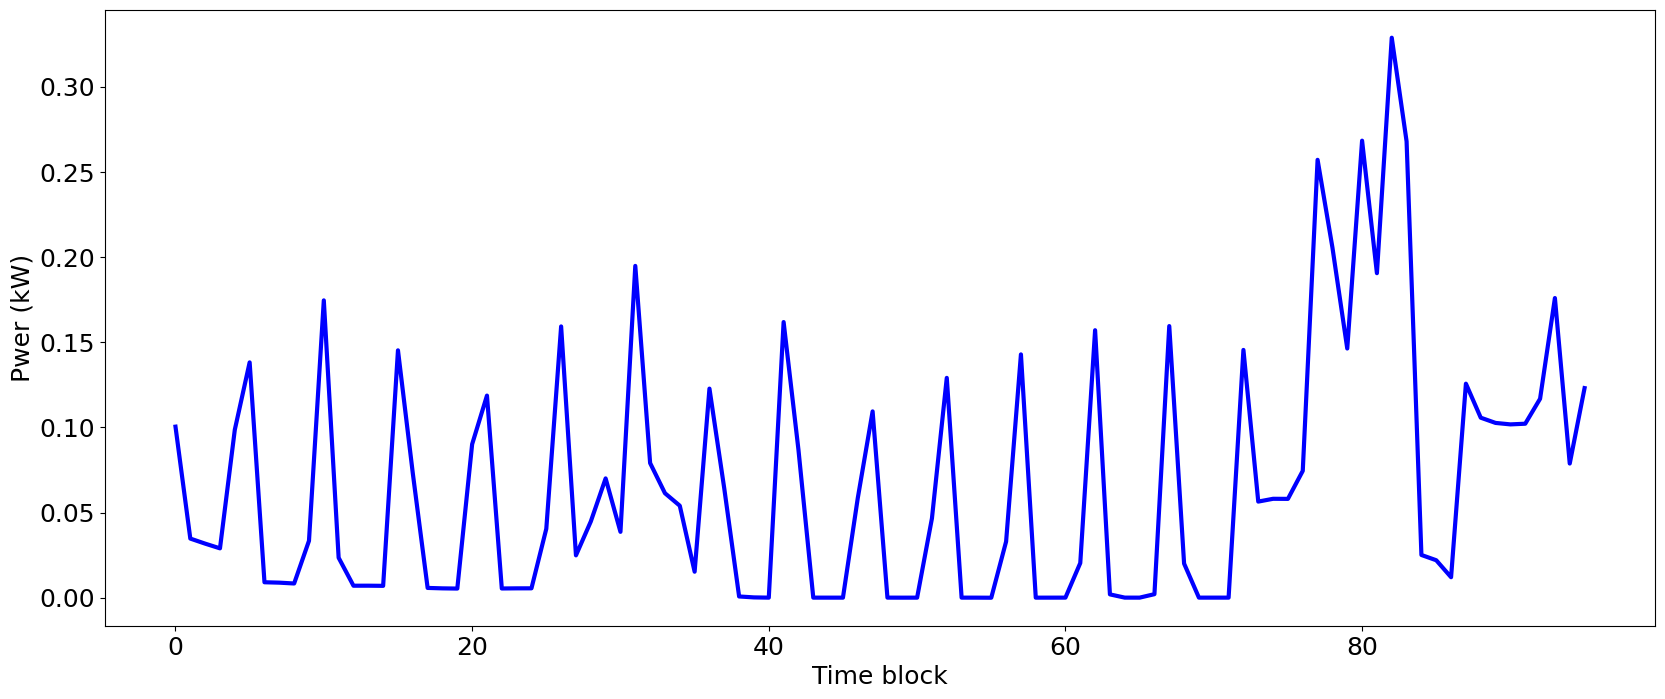

    deployment_id_x  block       date  Load (kW) household_id  index  \
96            D0004      0 2019-01-01   1.320928         H002      2   
97            D0004      1 2019-01-01   1.346305         H002      2   
98            D0004      2 2019-01-01   1.316039         H002      2   
99            D0004      3 2019-01-01   1.321894         H002      2   
100           D0004      4 2019-01-01   1.364881         H002      2   
..              ...    ...        ...        ...          ...    ...   
187           D0004     91 2019-01-01   1.437254         H002      2   
188           D0004     92 2019-01-01   1.424249         H002      2   
189           D0004     93 2019-01-01   1.543035         H002      2   
190           D0004     94 2019-01-01   1.576325         H002      2   
191           D0004     95 2019-01-01   1.465754         H002      2   

    deployment_id_y  
96            D0004  
97            D0004  
98            D0004  
99            D0004  
100           D0004  
.. 

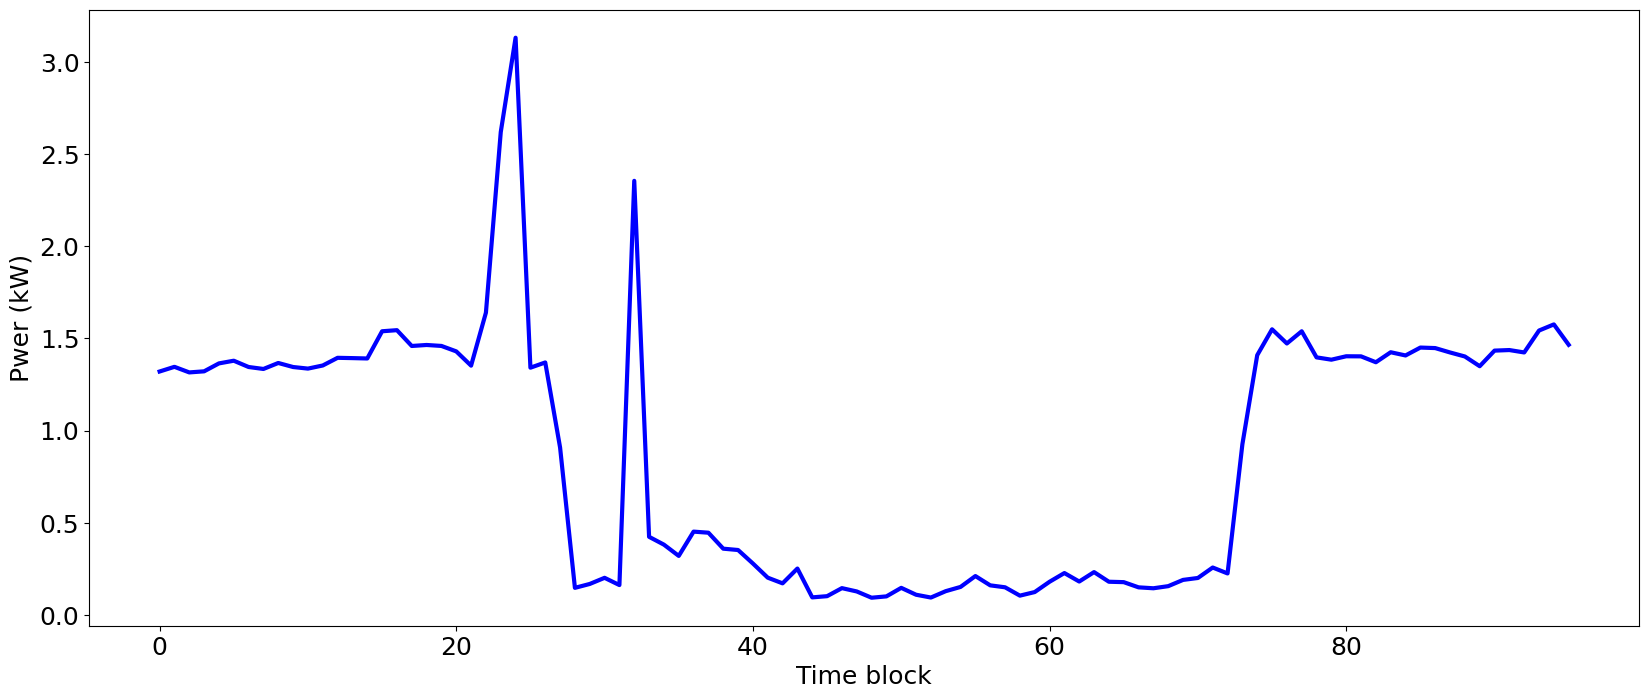

    deployment_id_x  block       date  Load (kW) household_id  index  \
192           D0006      0 2019-01-01   0.168817         H003      3   
193           D0006      1 2019-01-01   0.159952         H003      3   
194           D0006      2 2019-01-01   0.066839         H003      3   
195           D0006      3 2019-01-01   0.008244         H003      3   
196           D0006      4 2019-01-01   0.008225         H003      3   
..              ...    ...        ...        ...          ...    ...   
283           D0006     91 2019-01-01   0.185517         H003      3   
284           D0006     92 2019-01-01   0.160809         H003      3   
285           D0006     93 2019-01-01   0.077859         H003      3   
286           D0006     94 2019-01-01   0.004956         H003      3   
287           D0006     95 2019-01-01   0.004990         H003      3   

    deployment_id_y  
192           D0006  
193           D0006  
194           D0006  
195           D0006  
196           D0006  
.. 

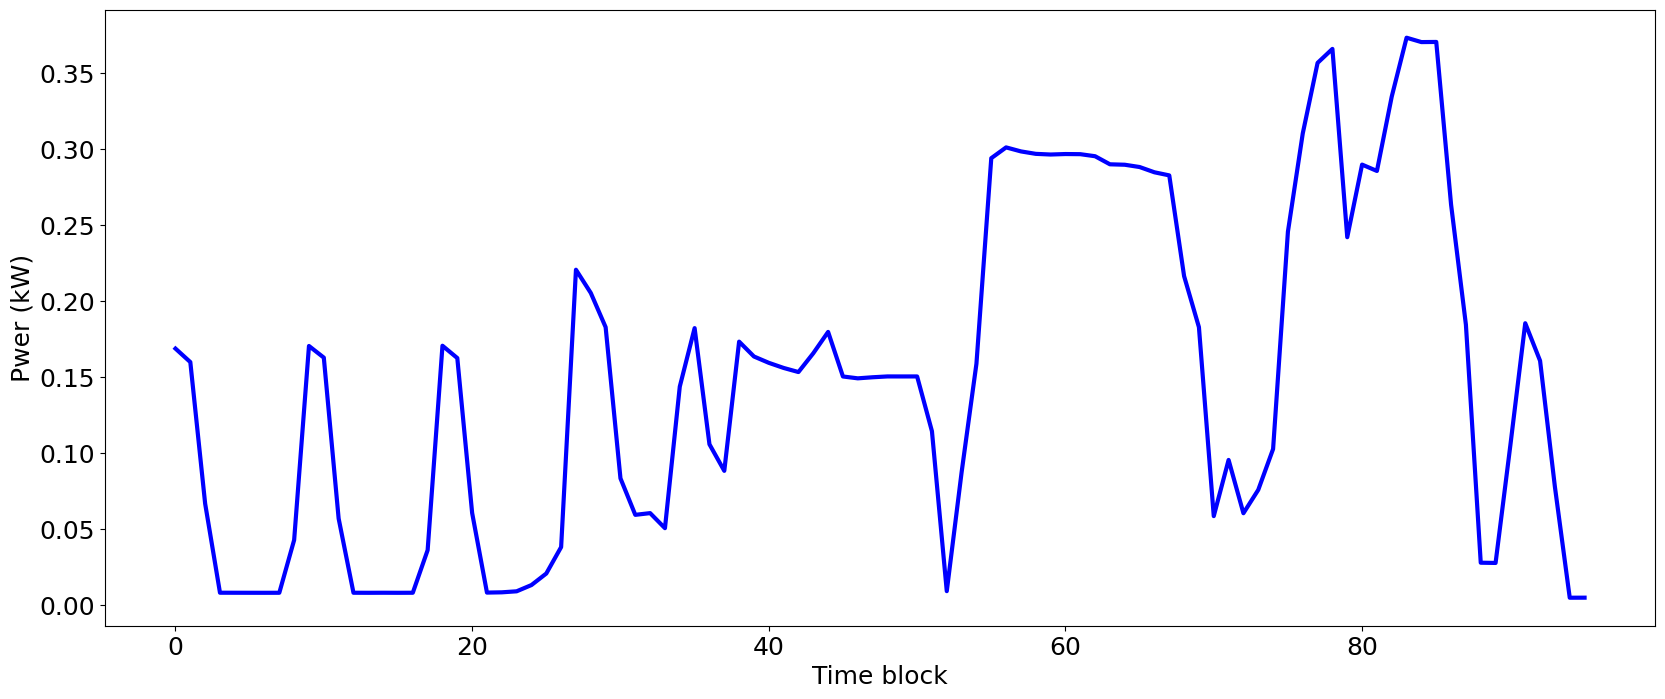

    deployment_id_x  block       date  Load (kW) household_id  index  \
288           D0008      0 2019-01-01   0.203550         H004      4   
289           D0008      1 2019-01-01   0.204695         H004      4   
290           D0008      2 2019-01-01   0.143164         H004      4   
291           D0008      3 2019-01-01   0.140705         H004      4   
292           D0008      4 2019-01-01   0.045253         H004      4   
..              ...    ...        ...        ...          ...    ...   
379           D0008     91 2019-01-01   0.058984         H004      4   
380           D0008     92 2019-01-01   0.149213         H004      4   
381           D0008     93 2019-01-01   0.145788         H004      4   
382           D0008     94 2019-01-01   0.049521         H004      4   
383           D0008     95 2019-01-01   0.010700         H004      4   

    deployment_id_y  
288           D0008  
289           D0008  
290           D0008  
291           D0008  
292           D0008  
.. 

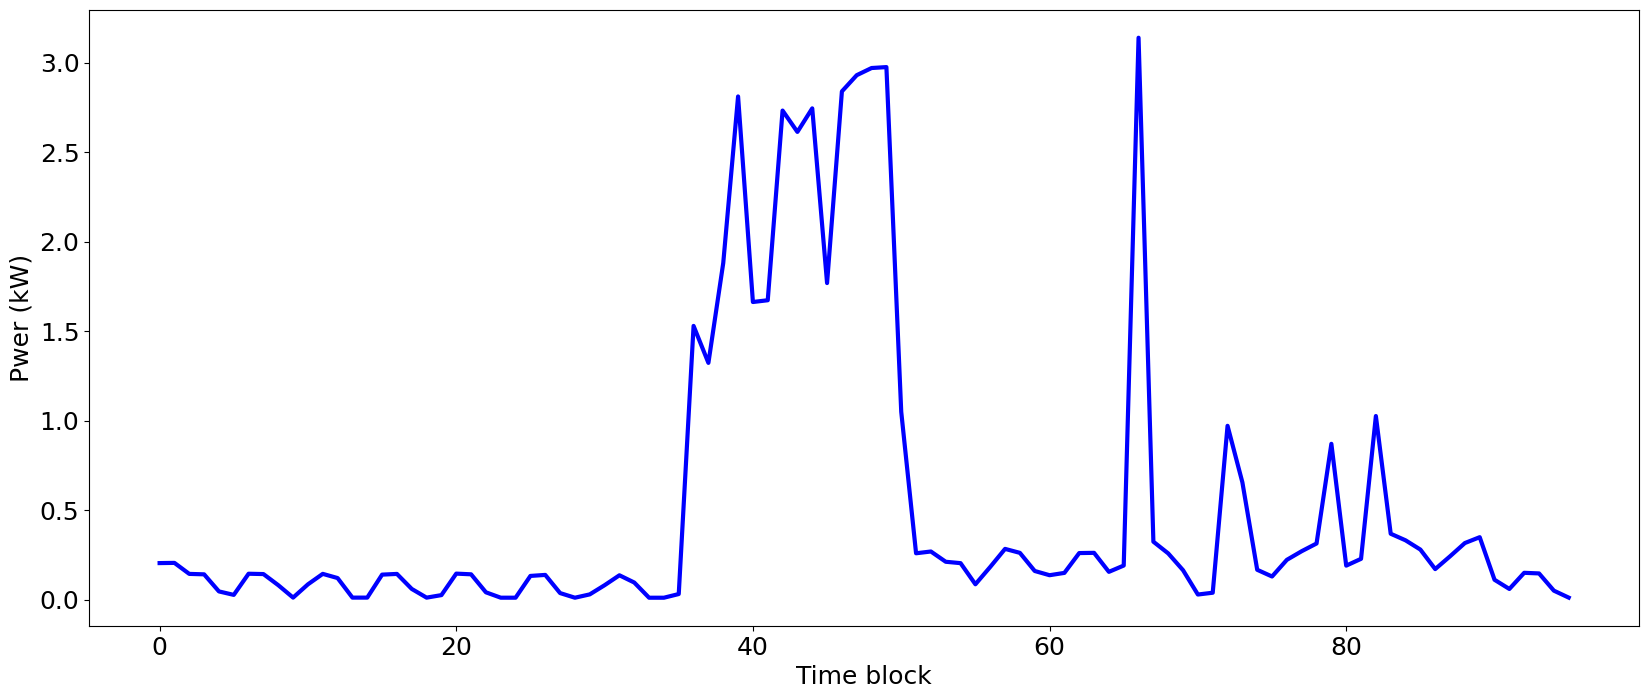

    deployment_id_x  block       date  Load (kW) household_id  index  \
384           D0010      0 2019-01-01   0.072052         H005      5   
385           D0010      1 2019-01-01   0.073512         H005      5   
386           D0010      2 2019-01-01   0.146535         H005      5   
387           D0010      3 2019-01-01   0.275465         H005      5   
388           D0010      4 2019-01-01   0.062031         H005      5   
..              ...    ...        ...        ...          ...    ...   
475           D0010     91 2019-01-01   0.098483         H005      5   
476           D0010     92 2019-01-01   0.326357         H005      5   
477           D0010     93 2019-01-01   0.080635         H005      5   
478           D0010     94 2019-01-01   0.044809         H005      5   
479           D0010     95 2019-01-01   0.030099         H005      5   

    deployment_id_y  
384           D0010  
385           D0010  
386           D0010  
387           D0010  
388           D0010  
.. 

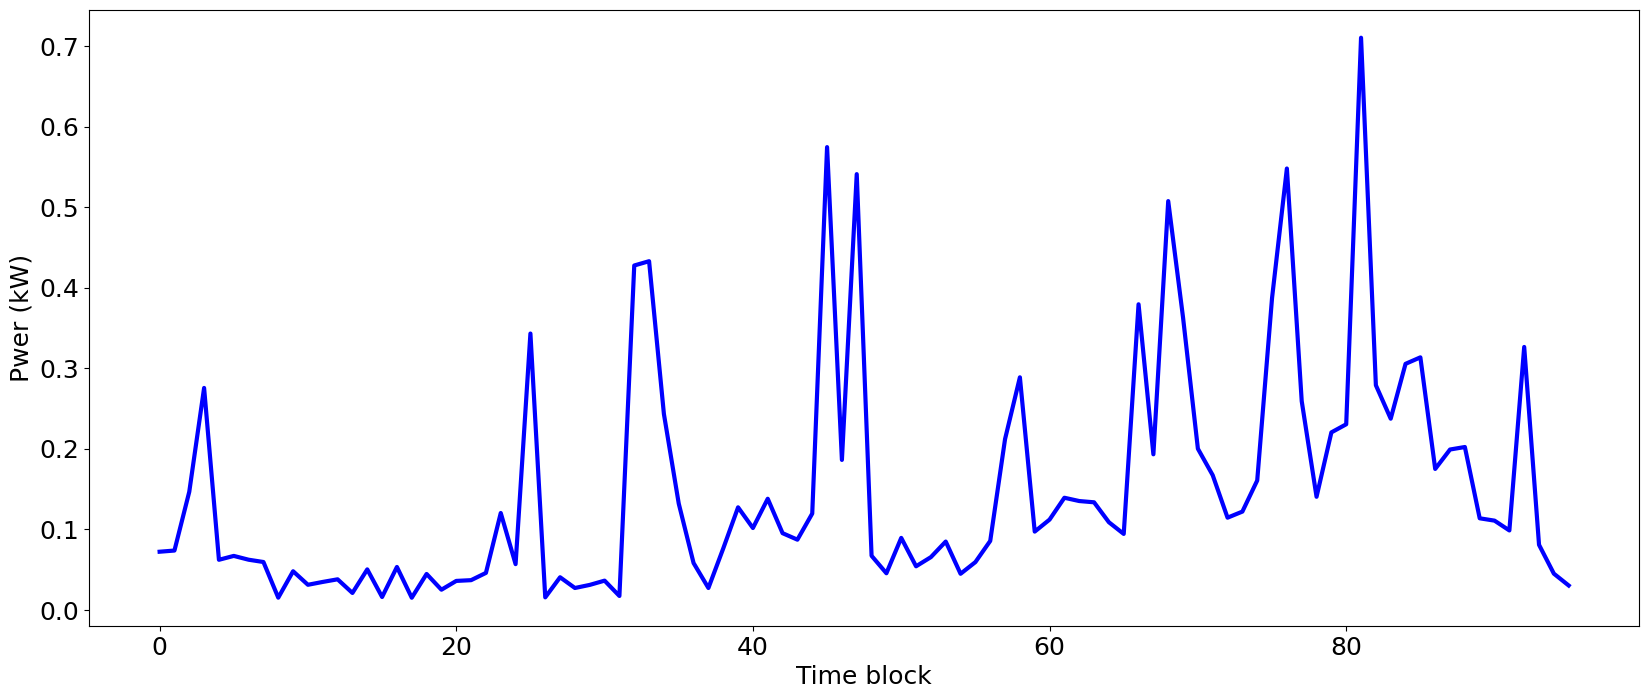

    deployment_id_x  block       date  Load (kW) household_id  index  \
480           D0012      0 2019-01-01   0.029310         H006      6   
481           D0012      1 2019-01-01   0.060016         H006      6   
482           D0012      2 2019-01-01   0.065475         H006      6   
483           D0012      3 2019-01-01   0.041216         H006      6   
484           D0012      4 2019-01-01   0.010050         H006      6   
..              ...    ...        ...        ...          ...    ...   
571           D0012     91 2019-01-01   0.208967         H006      6   
572           D0012     92 2019-01-01   0.172642         H006      6   
573           D0012     93 2019-01-01   0.146138         H006      6   
574           D0012     94 2019-01-01   0.144245         H006      6   
575           D0012     95 2019-01-01   0.153101         H006      6   

    deployment_id_y  
480           D0012  
481           D0012  
482           D0012  
483           D0012  
484           D0012  
.. 

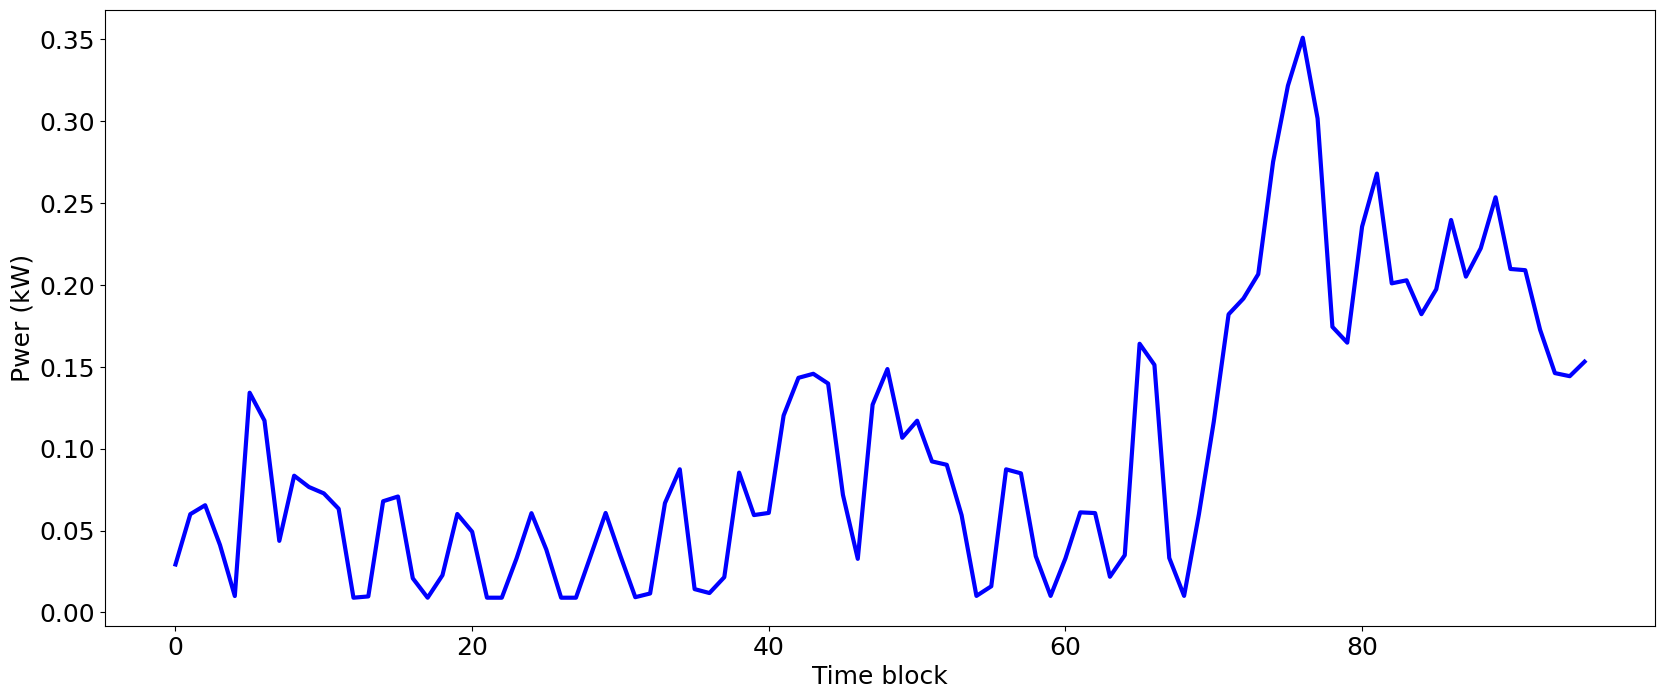

    deployment_id_x  block       date  Load (kW) household_id  index  \
576           D0014      0 2019-01-01   0.127973         H007      7   
577           D0014      1 2019-01-01   0.023170         H007      7   
578           D0014      2 2019-01-01   0.108109         H007      7   
579           D0014      3 2019-01-01   0.009059         H007      7   
580           D0014      4 2019-01-01   0.106921         H007      7   
..              ...    ...        ...        ...          ...    ...   
667           D0014     91 2019-01-01   0.012322         H007      7   
668           D0014     92 2019-01-01   0.111102         H007      7   
669           D0014     93 2019-01-01   0.044922         H007      7   
670           D0014     94 2019-01-01   0.104365         H007      7   
671           D0014     95 2019-01-01   0.047398         H007      7   

    deployment_id_y  
576           D0014  
577           D0014  
578           D0014  
579           D0014  
580           D0014  
.. 

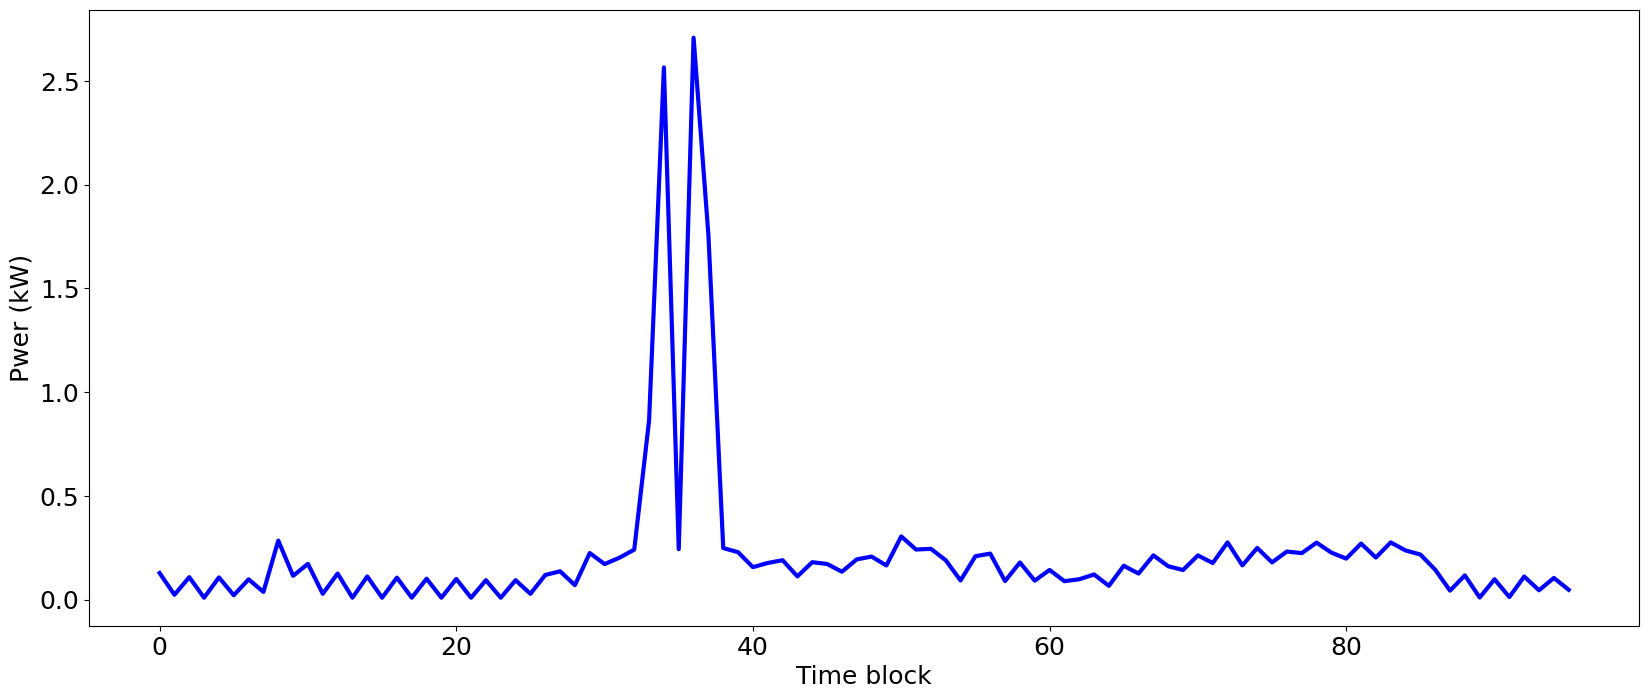

    deployment_id_x  block       date  Load (kW) household_id  index  \
672           D0016      0 2019-01-01   0.125002         H008      8   
673           D0016      1 2019-01-01   0.123303         H008      8   
674           D0016      2 2019-01-01   0.104409         H008      8   
675           D0016      3 2019-01-01   0.084020         H008      8   
676           D0016      4 2019-01-01   0.157778         H008      8   
..              ...    ...        ...        ...          ...    ...   
763           D0016     91 2019-01-01   0.066545         H008      8   
764           D0016     92 2019-01-01   0.066734         H008      8   
765           D0016     93 2019-01-01   0.070316         H008      8   
766           D0016     94 2019-01-01   0.130595         H008      8   
767           D0016     95 2019-01-01   0.129382         H008      8   

    deployment_id_y  
672           D0016  
673           D0016  
674           D0016  
675           D0016  
676           D0016  
.. 

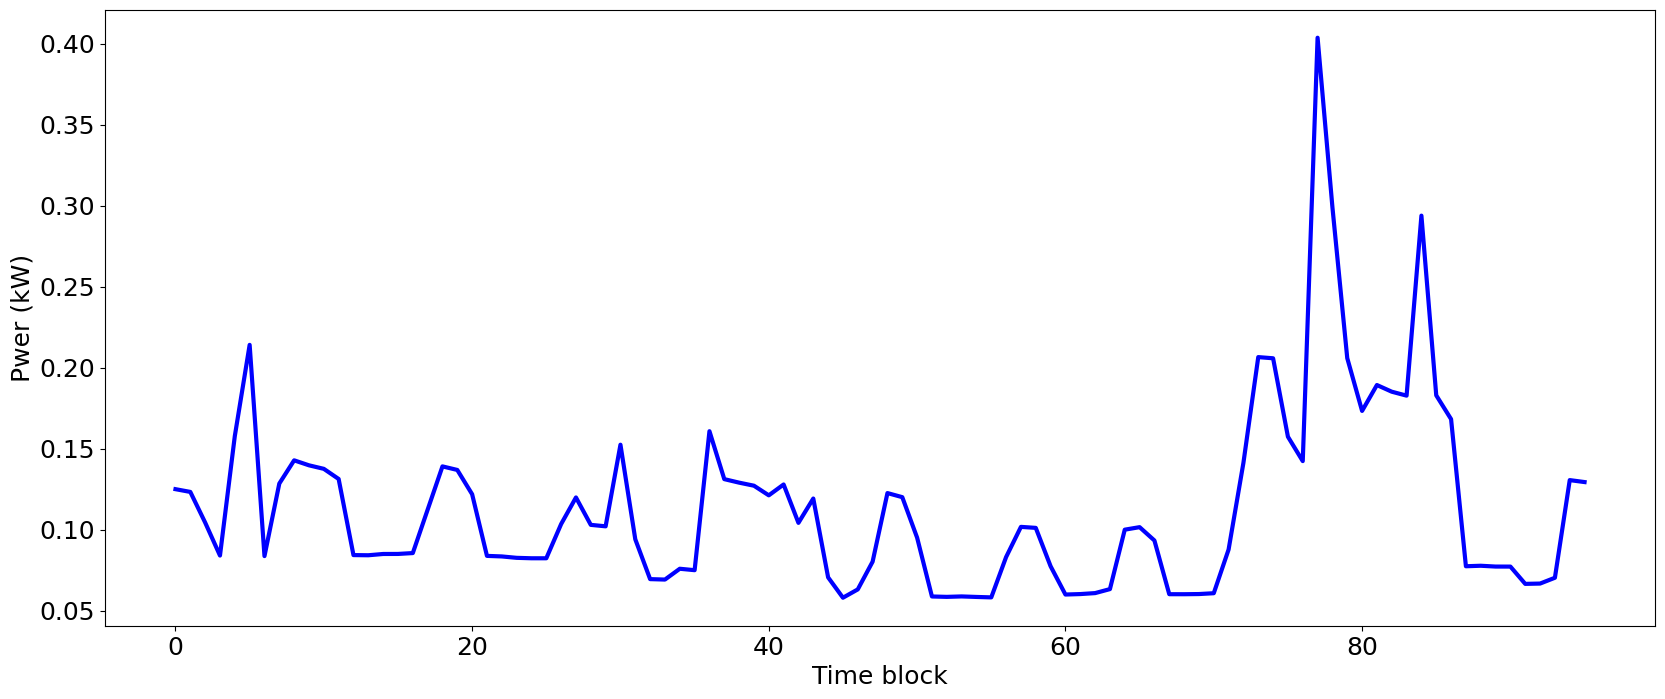

    deployment_id_x  block       date  Load (kW) household_id  index  \
768           D0017      0 2019-01-01   0.089344         H009      9   
769           D0017      1 2019-01-01   0.094685         H009      9   
770           D0017      2 2019-01-01   0.093351         H009      9   
771           D0017      3 2019-01-01   0.094136         H009      9   
772           D0017      4 2019-01-01   0.094609         H009      9   
..              ...    ...        ...        ...          ...    ...   
859           D0017     91 2019-01-01   0.092877         H009      9   
860           D0017     92 2019-01-01   0.093272         H009      9   
861           D0017     93 2019-01-01   0.093921         H009      9   
862           D0017     94 2019-01-01   0.094445         H009      9   
863           D0017     95 2019-01-01   0.094753         H009      9   

    deployment_id_y  
768           D0017  
769           D0017  
770           D0017  
771           D0017  
772           D0017  
.. 

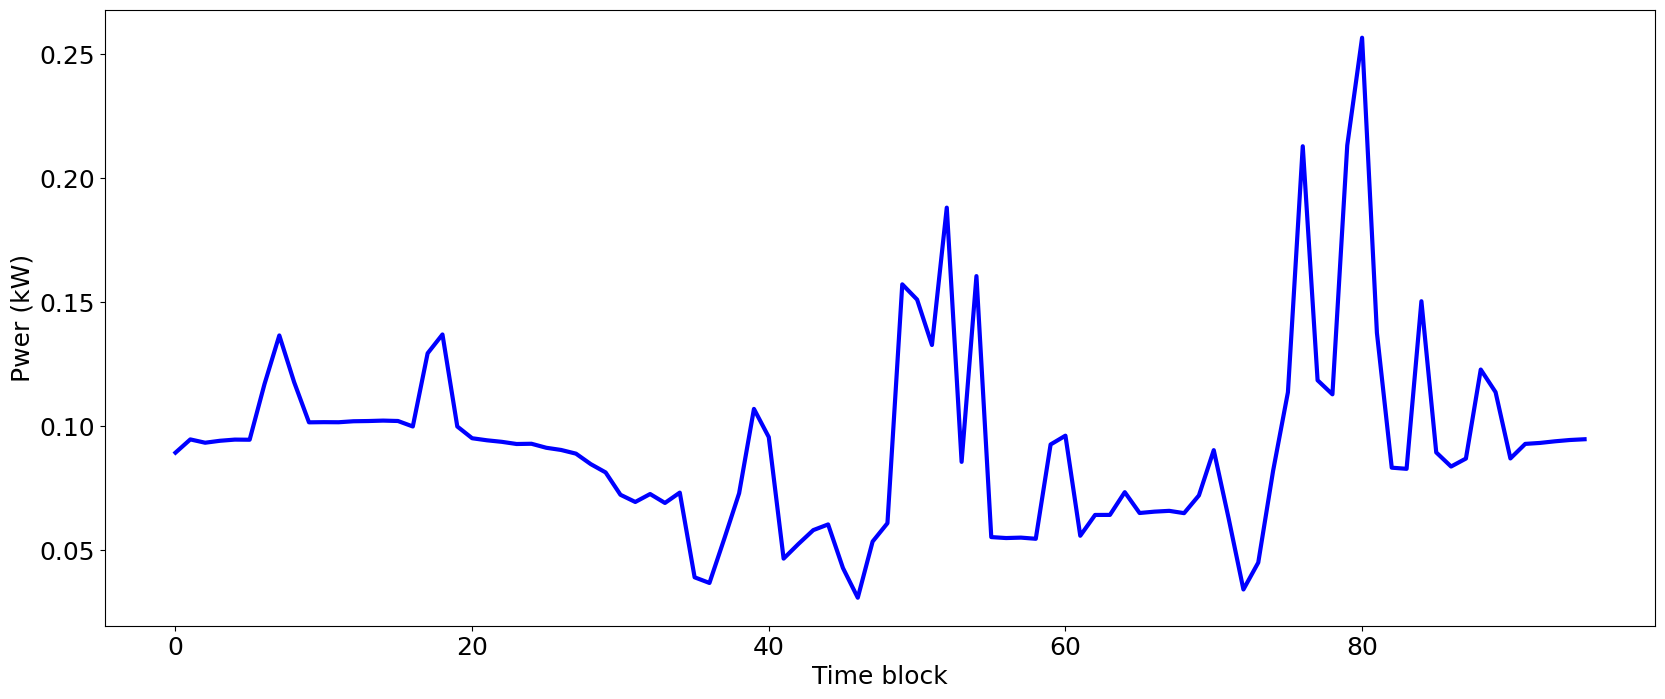

    deployment_id_x  block       date  Load (kW) household_id  index  \
864           D0020      0 2019-01-01   0.109245         H010     10   
865           D0020      1 2019-01-01   0.124276         H010     10   
866           D0020      2 2019-01-01   0.059401         H010     10   
867           D0020      3 2019-01-01   0.057812         H010     10   
868           D0020      4 2019-01-01   0.095439         H010     10   
..              ...    ...        ...        ...          ...    ...   
955           D0020     91 2019-01-01   0.036139         H010     10   
956           D0020     92 2019-01-01   0.267595         H010     10   
957           D0020     93 2019-01-01   1.609308         H010     10   
958           D0020     94 2019-01-01   0.073056         H010     10   
959           D0020     95 2019-01-01   0.010044         H010     10   

    deployment_id_y  
864           D0020  
865           D0020  
866           D0020  
867           D0020  
868           D0020  
.. 

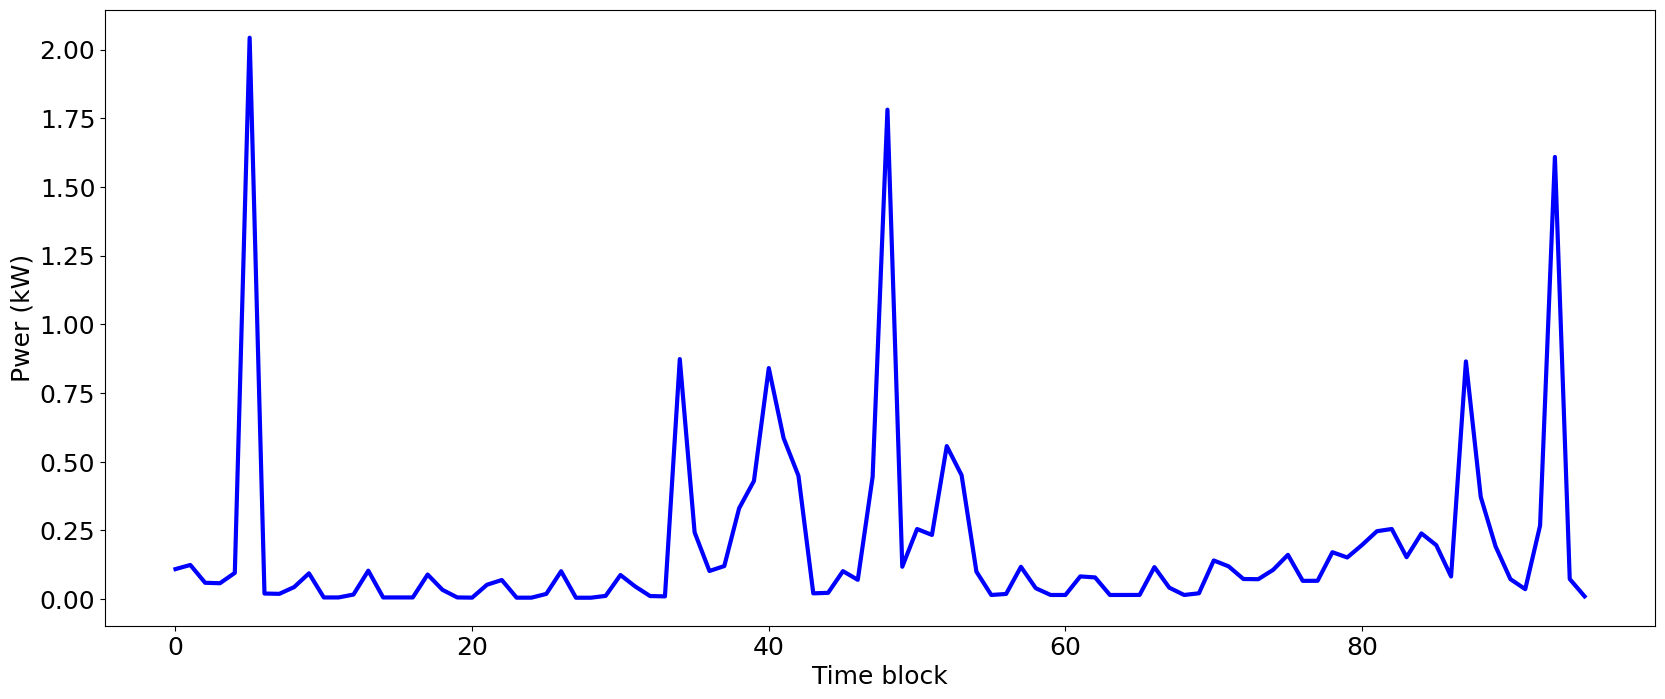

     deployment_id_x  block       date  Load (kW) household_id  index  \
960            D0022      0 2019-01-01   0.024246         H011     11   
961            D0022      1 2019-01-01   0.003462         H011     11   
962            D0022      2 2019-01-01   0.024554         H011     11   
963            D0022      3 2019-01-01   0.026830         H011     11   
964            D0022      4 2019-01-01   0.025074         H011     11   
...              ...    ...        ...        ...          ...    ...   
1051           D0022     91 2019-01-01   0.131063         H011     11   
1052           D0022     92 2019-01-01   0.129890         H011     11   
1053           D0022     93 2019-01-01   0.052018         H011     11   
1054           D0022     94 2019-01-01   0.031932         H011     11   
1055           D0022     95 2019-01-01   0.032860         H011     11   

     deployment_id_y  
960            D0022  
961            D0022  
962            D0022  
963            D0022  
964     

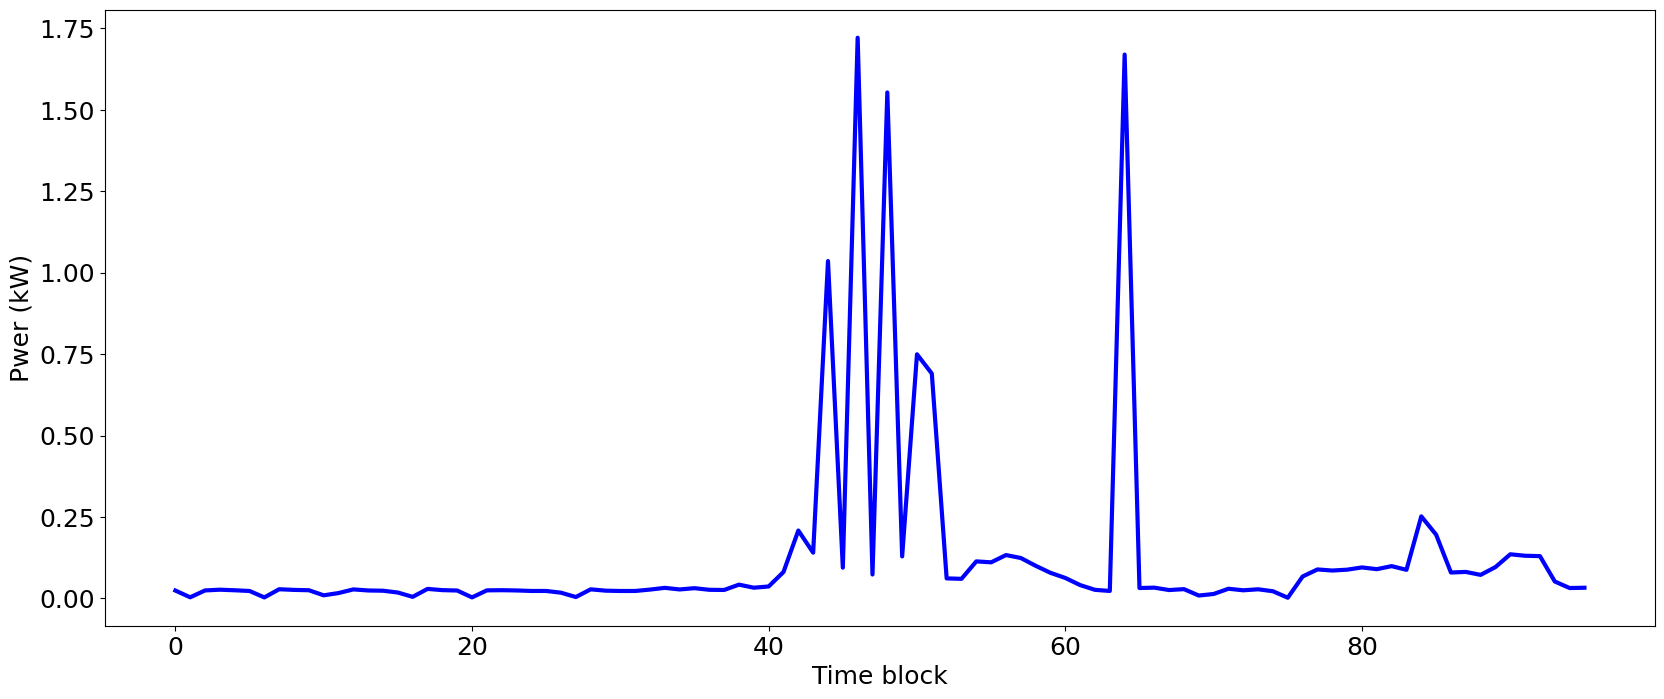

     deployment_id_x  block       date  Load (kW) household_id  index  \
1056           D0024      0 2019-01-01   0.196790         H012     12   
1057           D0024      1 2019-01-01   0.077052         H012     12   
1058           D0024      2 2019-01-01   0.149444         H012     12   
1059           D0024      3 2019-01-01   0.143869         H012     12   
1060           D0024      4 2019-01-01   0.137883         H012     12   
...              ...    ...        ...        ...          ...    ...   
1147           D0024     91 2019-01-01   0.140144         H012     12   
1148           D0024     92 2019-01-01   0.137851         H012     12   
1149           D0024     93 2019-01-01   0.129532         H012     12   
1150           D0024     94 2019-01-01   0.074895         H012     12   
1151           D0024     95 2019-01-01   0.074250         H012     12   

     deployment_id_y  
1056           D0024  
1057           D0024  
1058           D0024  
1059           D0024  
1060    

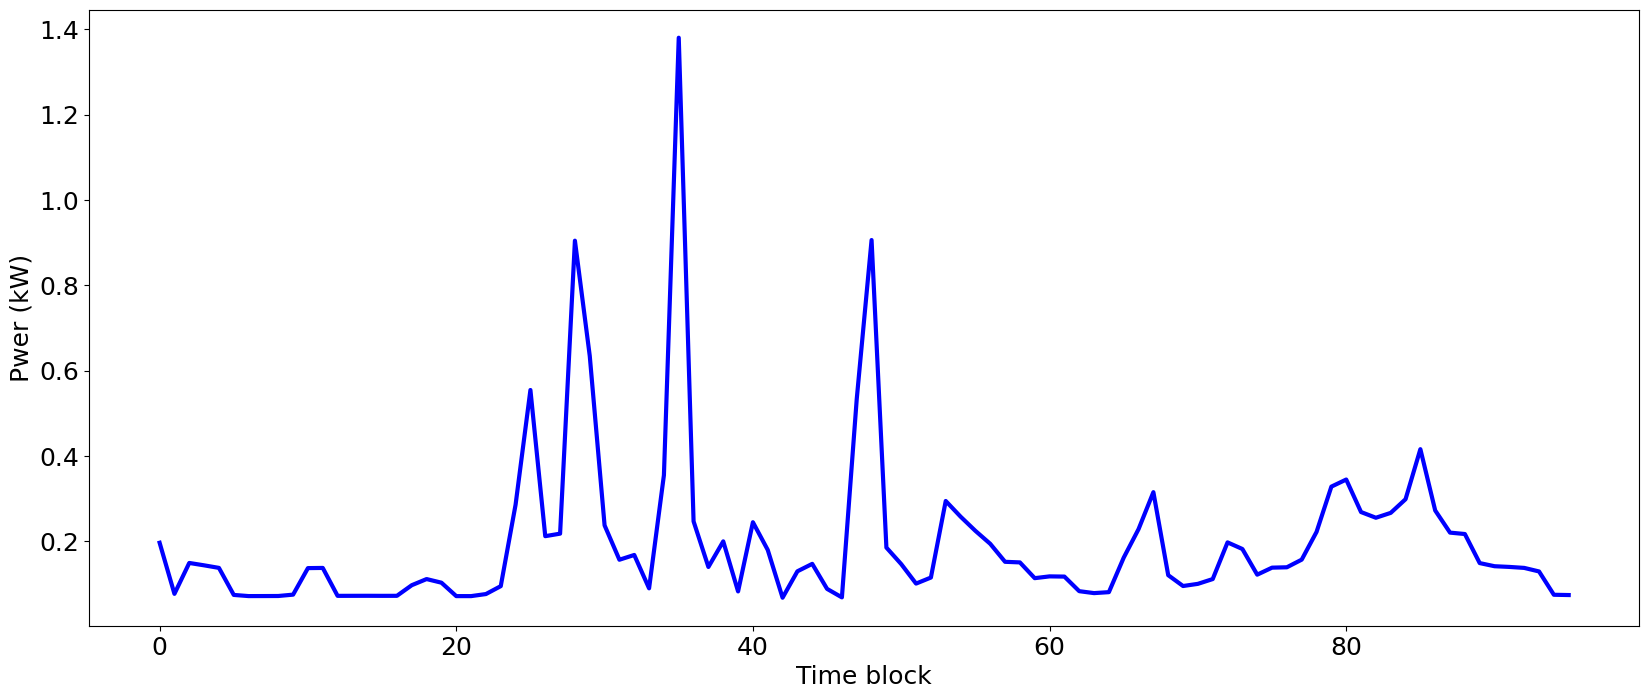

     deployment_id_x  block       date  Load (kW) household_id  index  \
1152           D0026      0 2019-01-01   0.095108         H013     13   
1153           D0026      1 2019-01-01   0.107282         H013     13   
1154           D0026      2 2019-01-01   0.134665         H013     13   
1155           D0026      3 2019-01-01   0.126284         H013     13   
1156           D0026      4 2019-01-01   0.109929         H013     13   
...              ...    ...        ...        ...          ...    ...   
1243           D0026     91 2019-01-01   0.194937         H013     13   
1244           D0026     92 2019-01-01   0.101829         H013     13   
1245           D0026     93 2019-01-01   0.107788         H013     13   
1246           D0026     94 2019-01-01   0.112368         H013     13   
1247           D0026     95 2019-01-01   0.102981         H013     13   

     deployment_id_y  
1152           D0026  
1153           D0026  
1154           D0026  
1155           D0026  
1156    

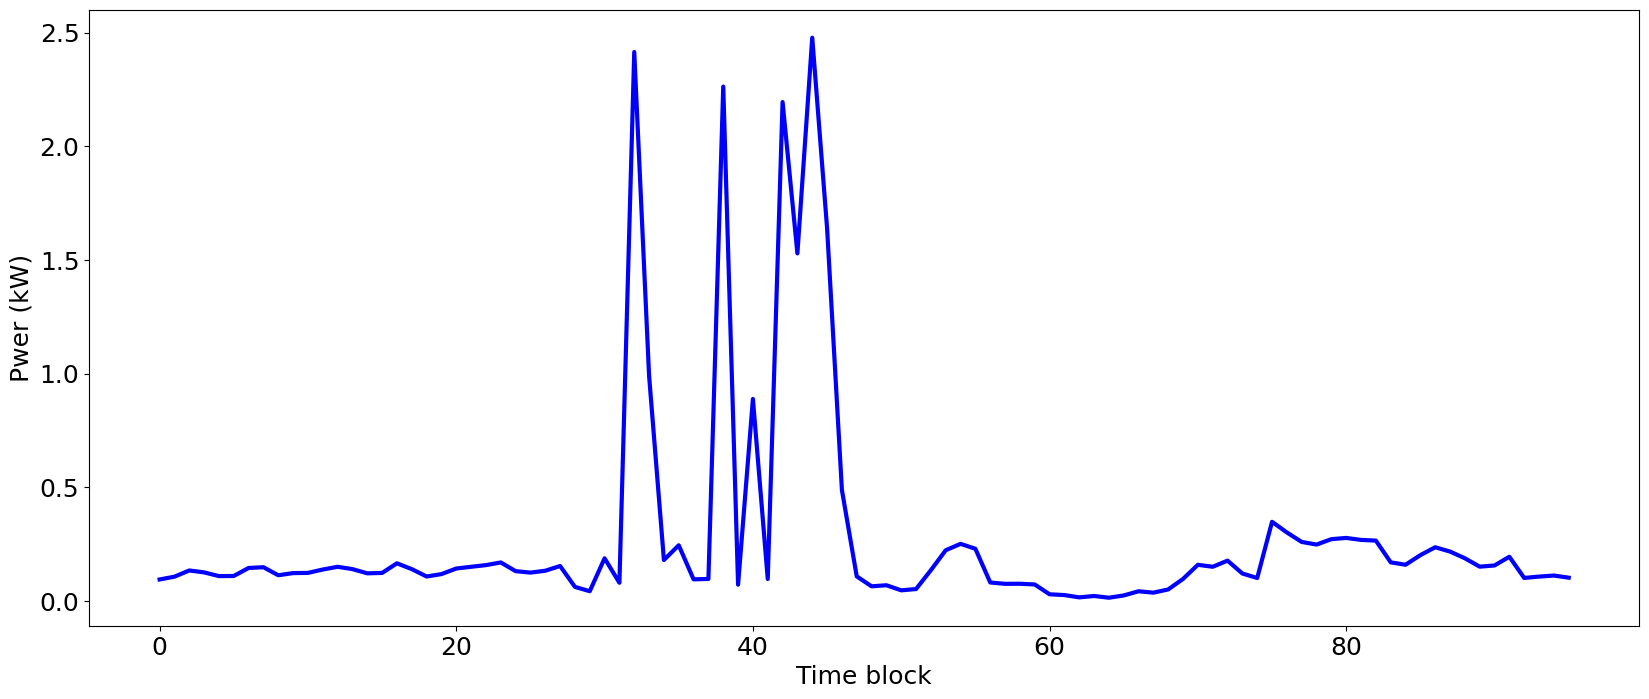

     deployment_id_x  block       date  Load (kW) household_id  index  \
1248           D0028      0 2019-01-01   0.024486         H014     14   
1249           D0028      1 2019-01-01   0.039838         H014     14   
1250           D0028      2 2019-01-01   0.003188         H014     14   
1251           D0028      3 2019-01-01   0.002046         H014     14   
1252           D0028      4 2019-01-01   0.025315         H014     14   
...              ...    ...        ...        ...          ...    ...   
1339           D0028     91 2019-01-01   0.008449         H014     14   
1340           D0028     92 2019-01-01   0.047638         H014     14   
1341           D0028     93 2019-01-01   0.046528         H014     14   
1342           D0028     94 2019-01-01   0.032275         H014     14   
1343           D0028     95 2019-01-01   0.006036         H014     14   

     deployment_id_y  
1248           D0028  
1249           D0028  
1250           D0028  
1251           D0028  
1252    

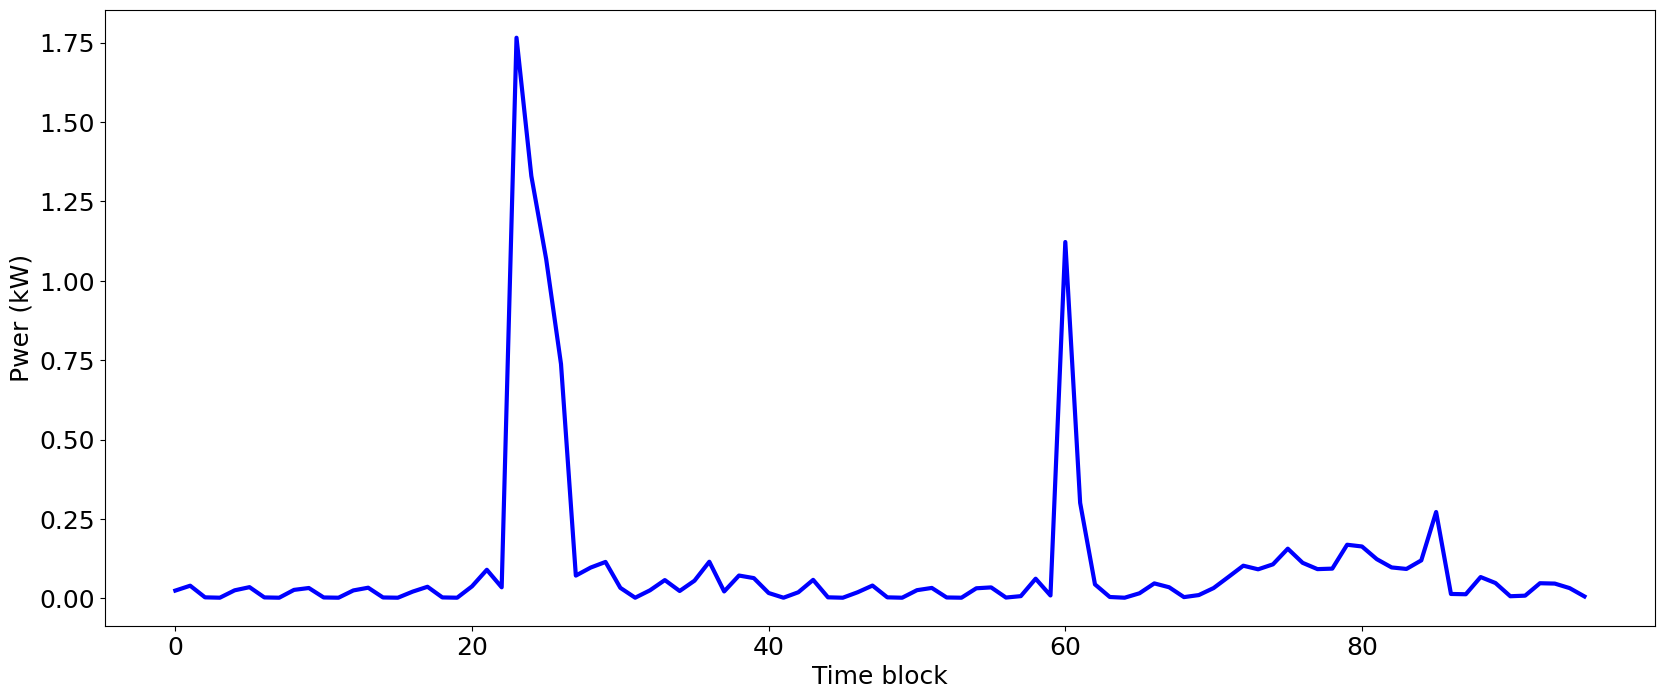

     deployment_id_x  block       date  Load (kW) household_id  index  \
1344           D0030      0 2019-01-01   0.069920         H015     15   
1345           D0030      1 2019-01-01   0.033723         H015     15   
1346           D0030      2 2019-01-01   0.061136         H015     15   
1347           D0030      3 2019-01-01   0.055262         H015     15   
1348           D0030      4 2019-01-01   0.039414         H015     15   
...              ...    ...        ...        ...          ...    ...   
1435           D0030     91 2019-01-01   0.047699         H015     15   
1436           D0030     92 2019-01-01   0.064961         H015     15   
1437           D0030     93 2019-01-01   0.073307         H015     15   
1438           D0030     94 2019-01-01   0.035113         H015     15   
1439           D0030     95 2019-01-01   0.071151         H015     15   

     deployment_id_y  
1344           D0030  
1345           D0030  
1346           D0030  
1347           D0030  
1348    

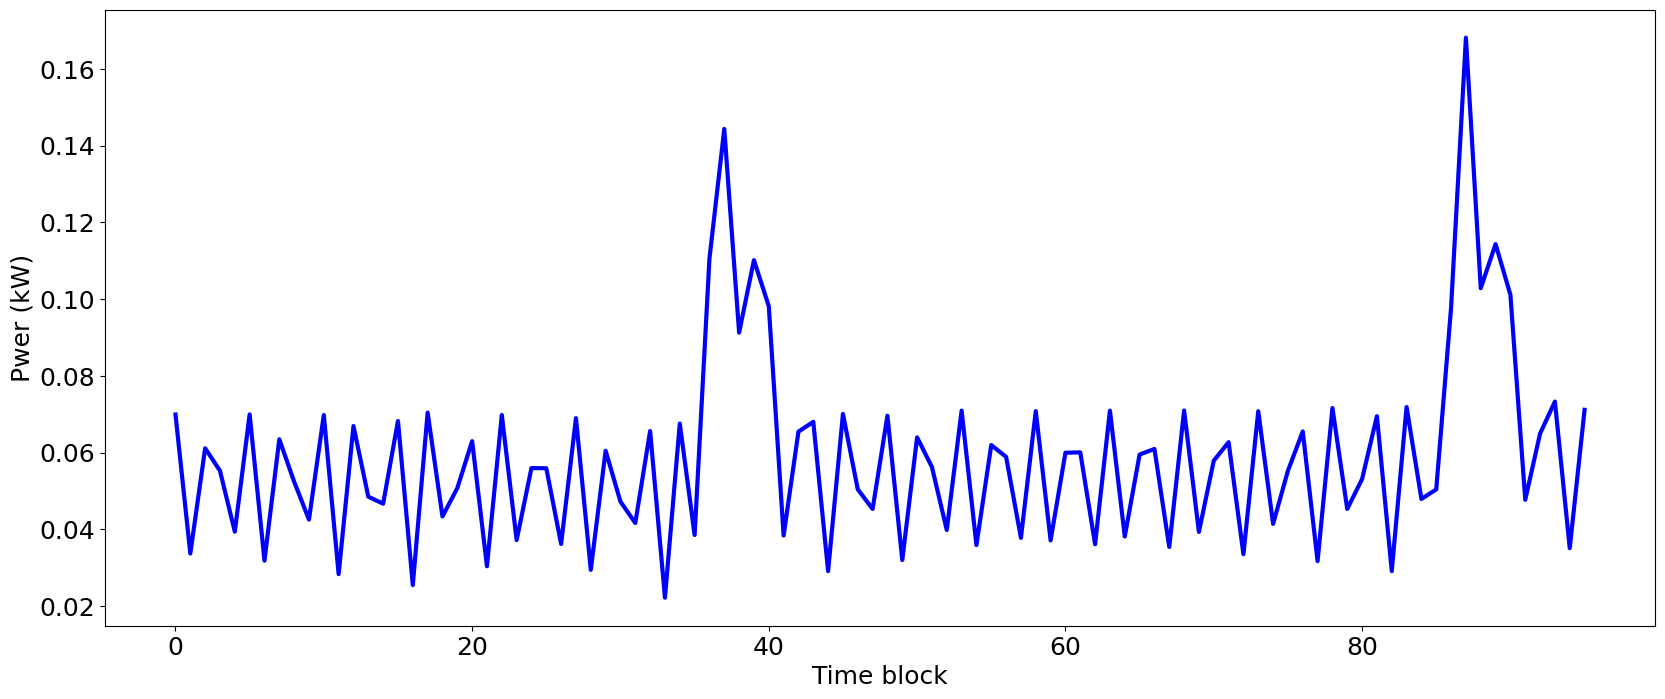

     deployment_id_x  block       date  Load (kW) household_id  index  \
1440           D0032      0 2019-01-01   0.235701         H016     16   
1441           D0032      1 2019-01-01   0.064956         H016     16   
1442           D0032      2 2019-01-01   0.108456         H016     16   
1443           D0032      3 2019-01-01   0.143408         H016     16   
1444           D0032      4 2019-01-01   0.065289         H016     16   
...              ...    ...        ...        ...          ...    ...   
1531           D0032     91 2019-01-01   0.190463         H016     16   
1532           D0032     92 2019-01-01   0.076910         H016     16   
1533           D0032     93 2019-01-01   0.132628         H016     16   
1534           D0032     94 2019-01-01   0.084207         H016     16   
1535           D0032     95 2019-01-01   0.032029         H016     16   

     deployment_id_y  
1440           D0032  
1441           D0032  
1442           D0032  
1443           D0032  
1444    

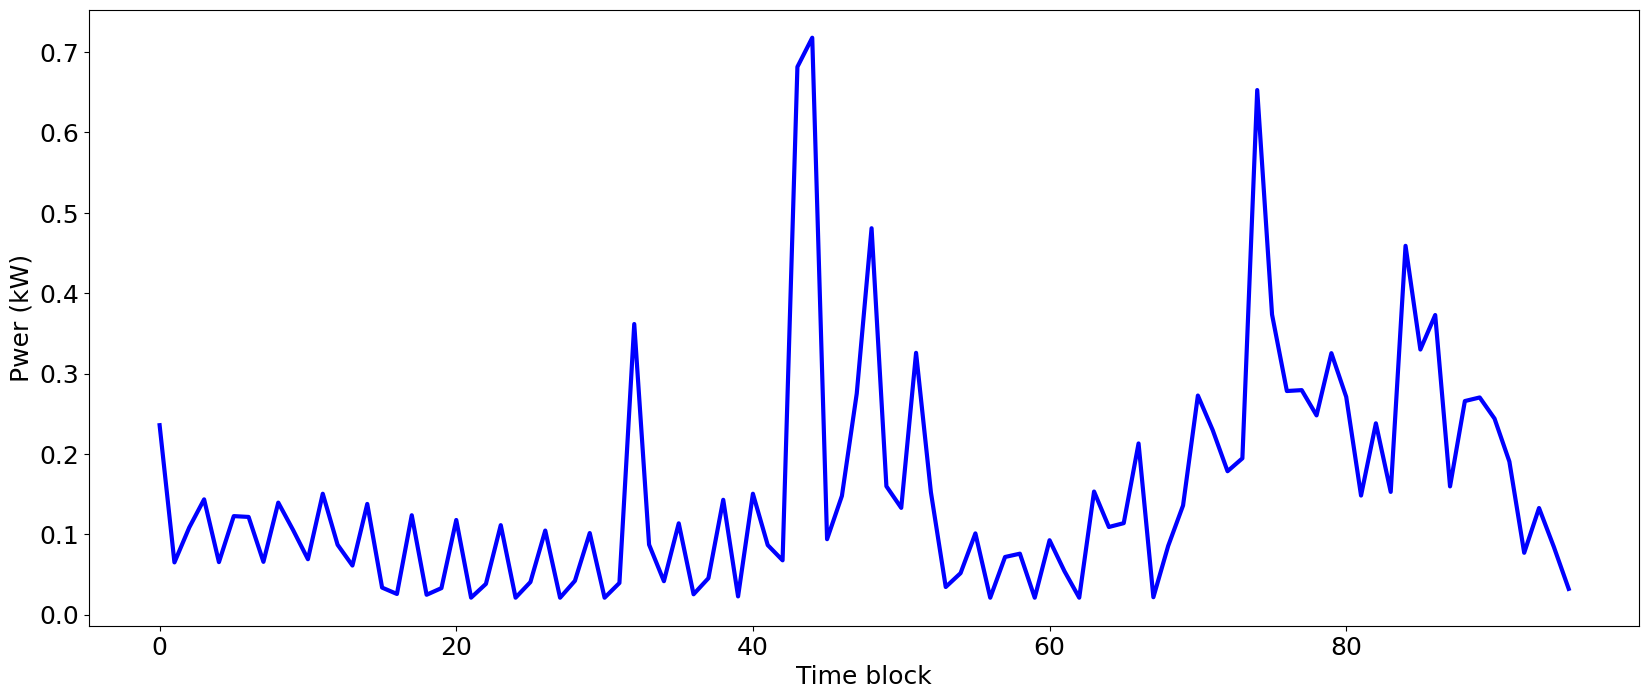

     deployment_id_x  block       date  Load (kW) household_id  index  \
1536           D0034      0 2019-01-01   0.063676         H017     17   
1537           D0034      1 2019-01-01   0.063540         H017     17   
1538           D0034      2 2019-01-01   0.016075         H017     17   
1539           D0034      3 2019-01-01   0.063138         H017     17   
1540           D0034      4 2019-01-01   0.016625         H017     17   
...              ...    ...        ...        ...          ...    ...   
1627           D0034     91 2019-01-01   0.016012         H017     17   
1628           D0034     92 2019-01-01   0.065577         H017     17   
1629           D0034     93 2019-01-01   0.016663         H017     17   
1630           D0034     94 2019-01-01   0.067934         H017     17   
1631           D0034     95 2019-01-01   0.017406         H017     17   

     deployment_id_y  
1536           D0034  
1537           D0034  
1538           D0034  
1539           D0034  
1540    

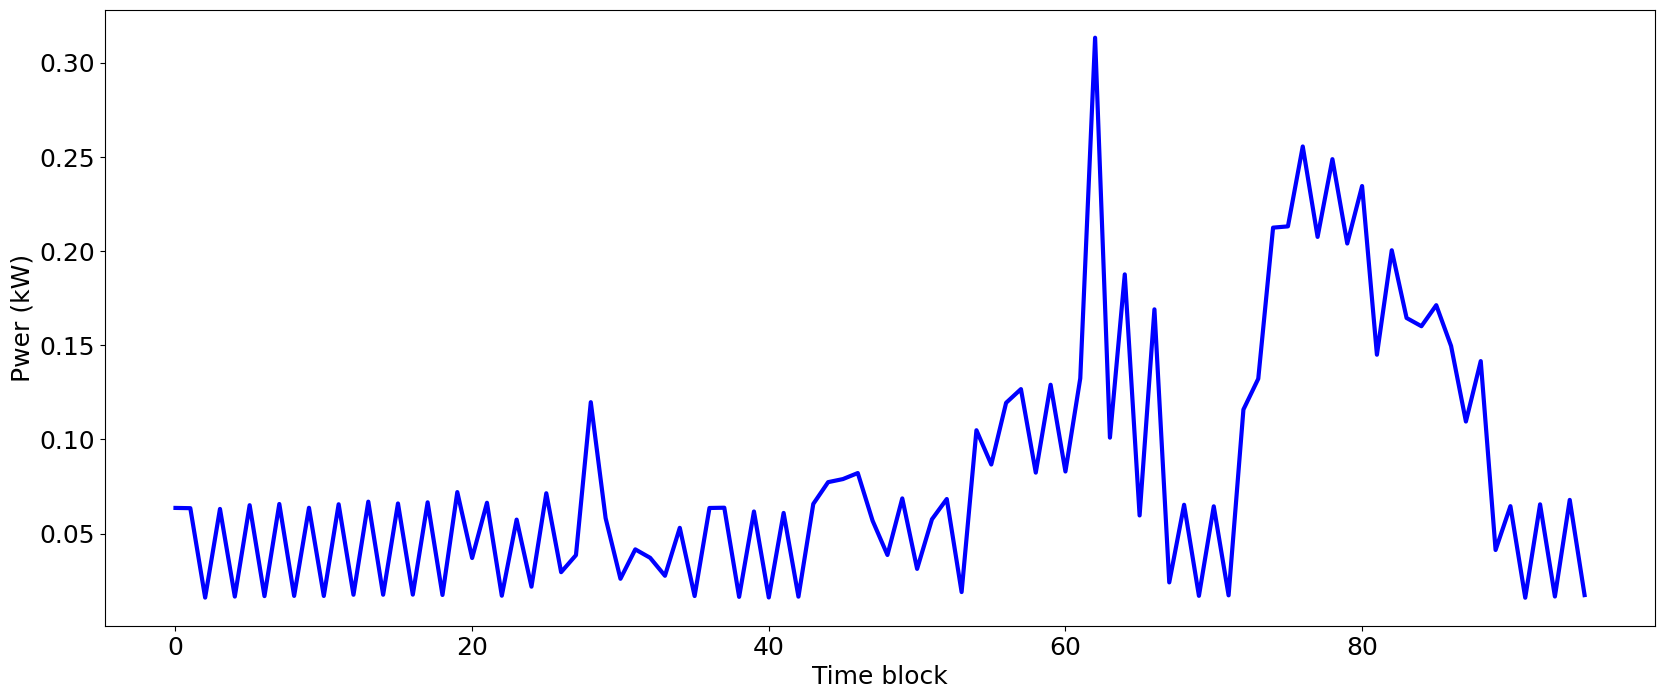

     deployment_id_x  block       date  Load (kW) household_id  index  \
1632           D0035      0 2019-01-01   0.078424         H018     18   
1633           D0035      1 2019-01-01   0.124094         H018     18   
1634           D0035      2 2019-01-01   0.074946         H018     18   
1635           D0035      3 2019-01-01   0.069444         H018     18   
1636           D0035      4 2019-01-01   0.109425         H018     18   
...              ...    ...        ...        ...          ...    ...   
1723           D0035     91 2019-01-01   0.033975         H018     18   
1724           D0035     92 2019-01-01   0.057544         H018     18   
1725           D0035     93 2019-01-01   0.116069         H018     18   
1726           D0035     94 2019-01-01   0.300517         H018     18   
1727           D0035     95 2019-01-01   0.104665         H018     18   

     deployment_id_y  
1632           D0035  
1633           D0035  
1634           D0035  
1635           D0035  
1636    

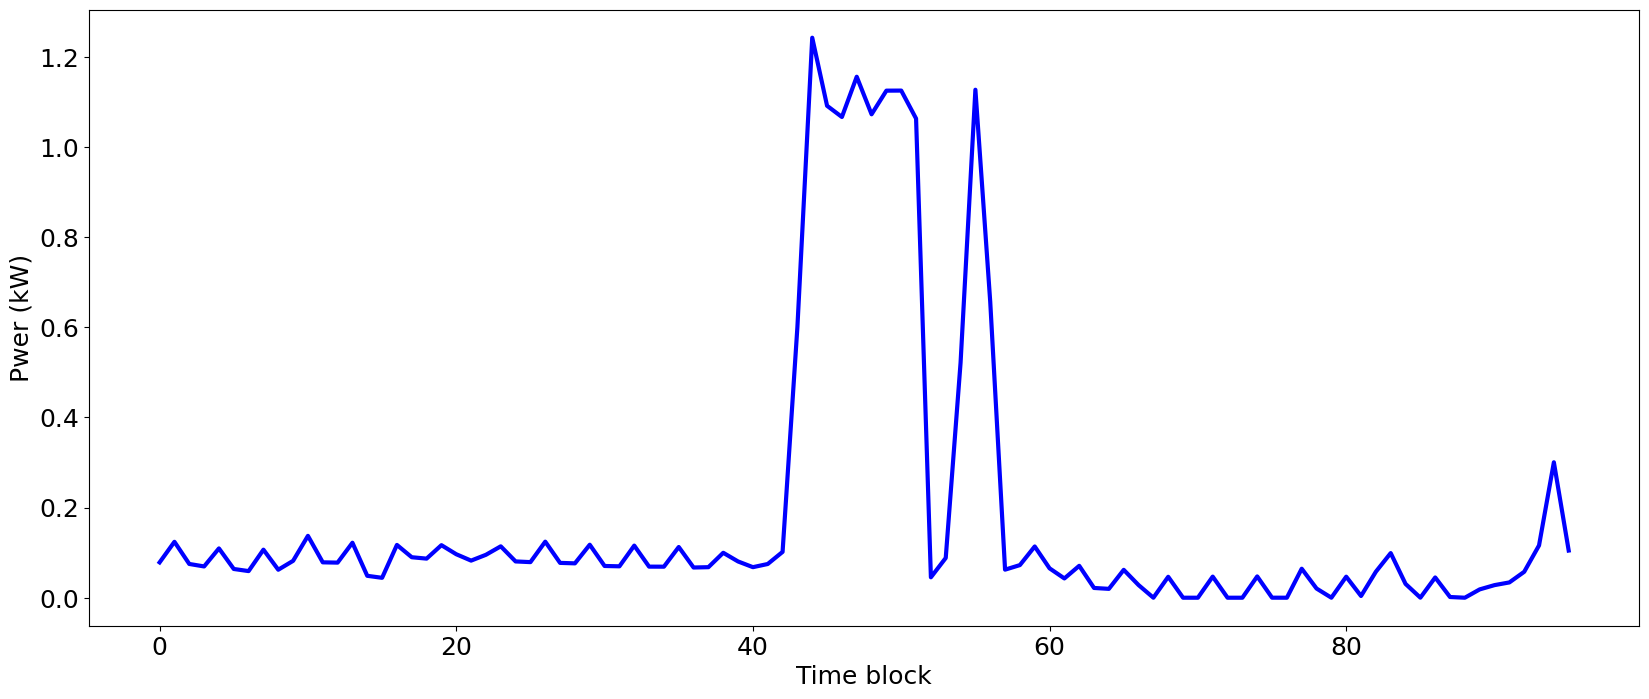

     deployment_id_x  block       date  Load (kW) household_id  index  \
1728           D0038      0 2019-01-01   0.029587         H019     19   
1729           D0038      1 2019-01-01   0.101429         H019     19   
1730           D0038      2 2019-01-01   0.041474         H019     19   
1731           D0038      3 2019-01-01   0.041526         H019     19   
1732           D0038      4 2019-01-01   0.083610         H019     19   
...              ...    ...        ...        ...          ...    ...   
1819           D0038     91 2019-01-01   0.129680         H019     19   
1820           D0038     92 2019-01-01   0.095079         H019     19   
1821           D0038     93 2019-01-01   0.034588         H019     19   
1822           D0038     94 2019-01-01   0.131841         H019     19   
1823           D0038     95 2019-01-01   0.018748         H019     19   

     deployment_id_y  
1728           D0038  
1729           D0038  
1730           D0038  
1731           D0038  
1732    

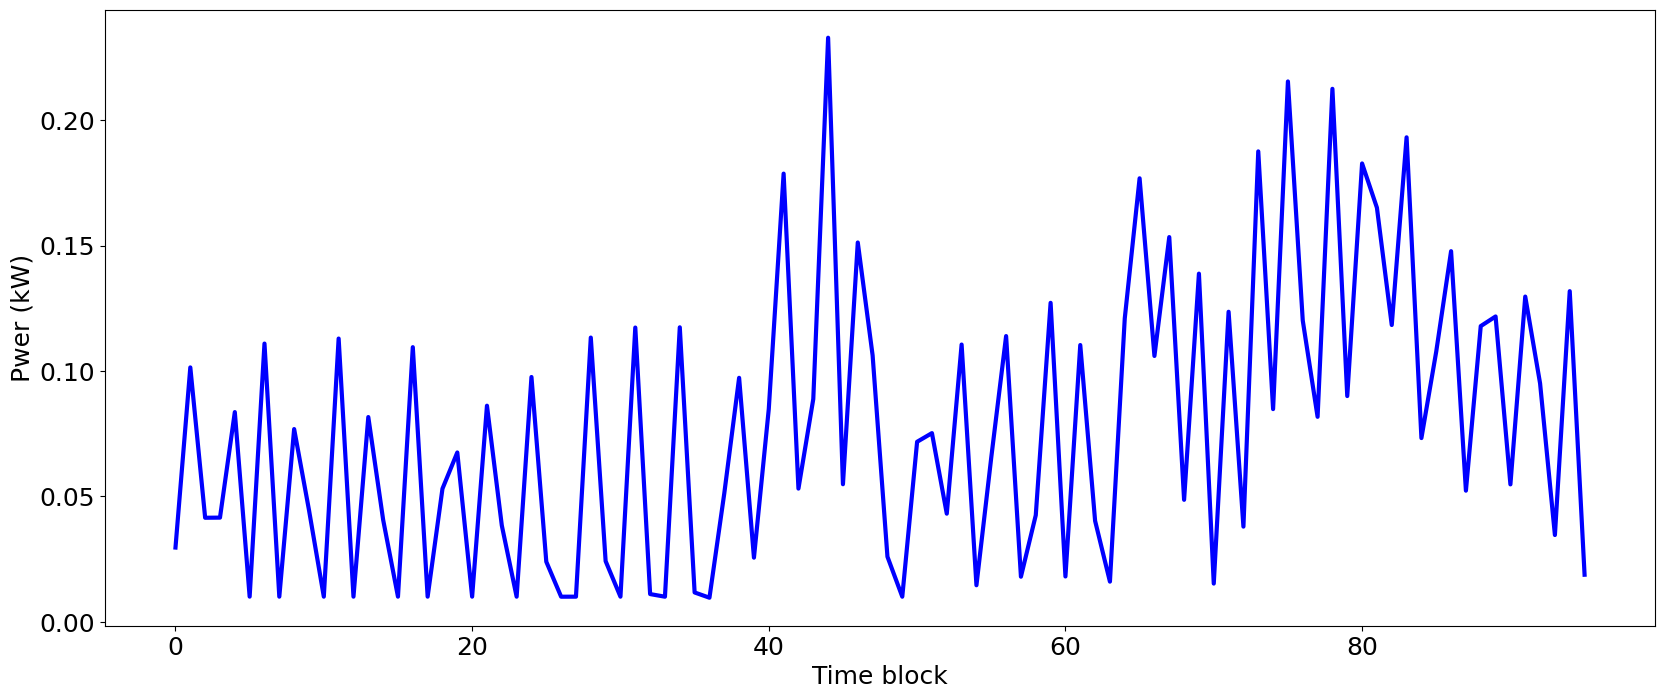

     deployment_id_x  block       date  Load (kW) household_id  index  \
1824           D0040      0 2019-01-01   0.215819         H020     20   
1825           D0040      1 2019-01-01   0.132561         H020     20   
1826           D0040      2 2019-01-01   0.057014         H020     20   
1827           D0040      3 2019-01-01   0.004032         H020     20   
1828           D0040      4 2019-01-01   0.004020         H020     20   
...              ...    ...        ...        ...          ...    ...   
1915           D0040     91 2019-01-01   0.102868         H020     20   
1916           D0040     92 2019-01-01   0.067543         H020     20   
1917           D0040     93 2019-01-01   0.067282         H020     20   
1918           D0040     94 2019-01-01   0.067972         H020     20   
1919           D0040     95 2019-01-01   0.214239         H020     20   

     deployment_id_y  
1824           D0040  
1825           D0040  
1826           D0040  
1827           D0040  
1828    

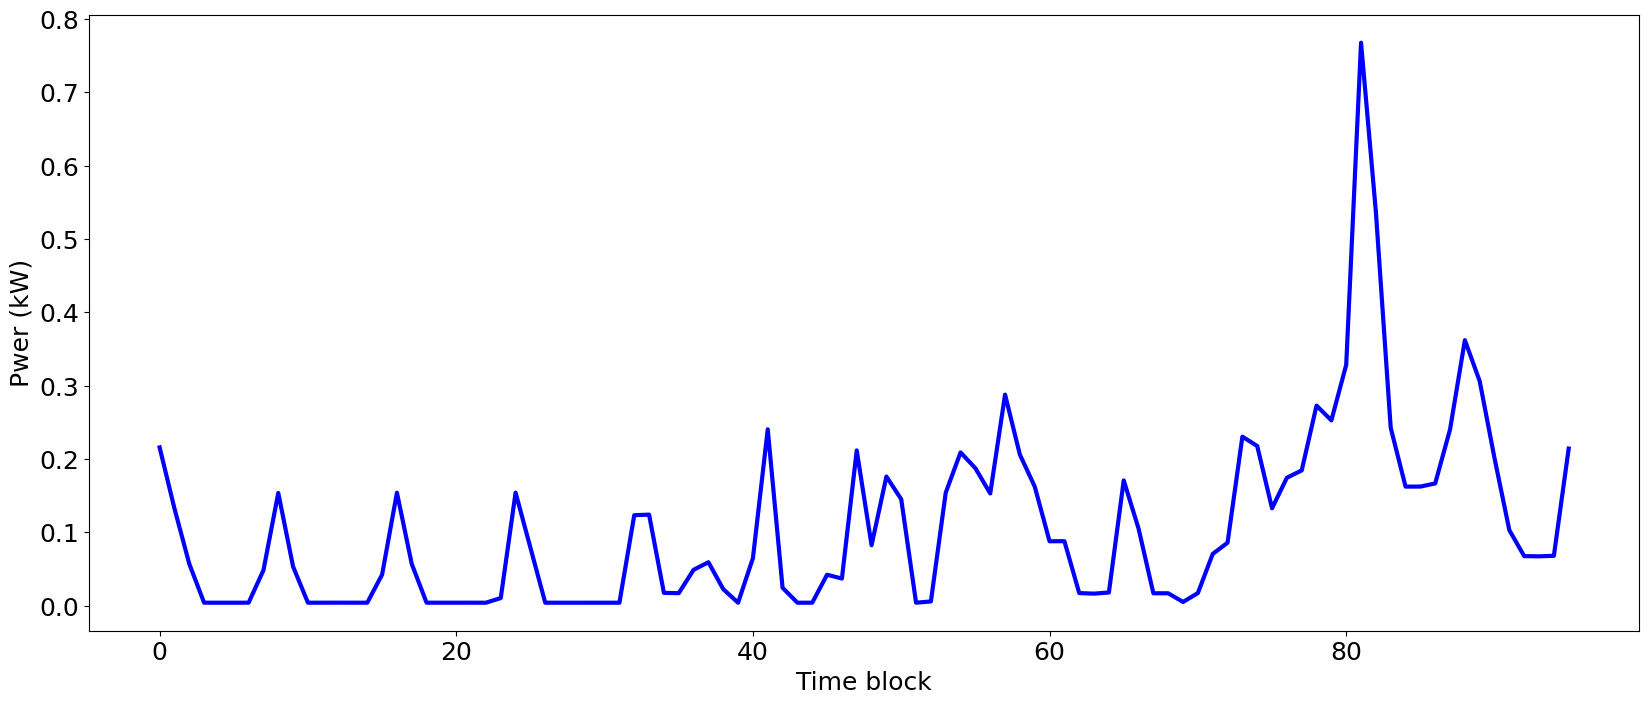

     deployment_id_x  block       date  Load (kW) household_id  index  \
1920           D0042      0 2019-01-01   0.129735         H021     21   
1921           D0042      1 2019-01-01   0.090319         H021     21   
1922           D0042      2 2019-01-01   0.141452         H021     21   
1923           D0042      3 2019-01-01   0.089294         H021     21   
1924           D0042      4 2019-01-01   0.134785         H021     21   
...              ...    ...        ...        ...          ...    ...   
2011           D0042     91 2019-01-01   0.220841         H021     21   
2012           D0042     92 2019-01-01   0.226073         H021     21   
2013           D0042     93 2019-01-01   0.177771         H021     21   
2014           D0042     94 2019-01-01   0.139385         H021     21   
2015           D0042     95 2019-01-01   0.089641         H021     21   

     deployment_id_y  
1920           D0042  
1921           D0042  
1922           D0042  
1923           D0042  
1924    

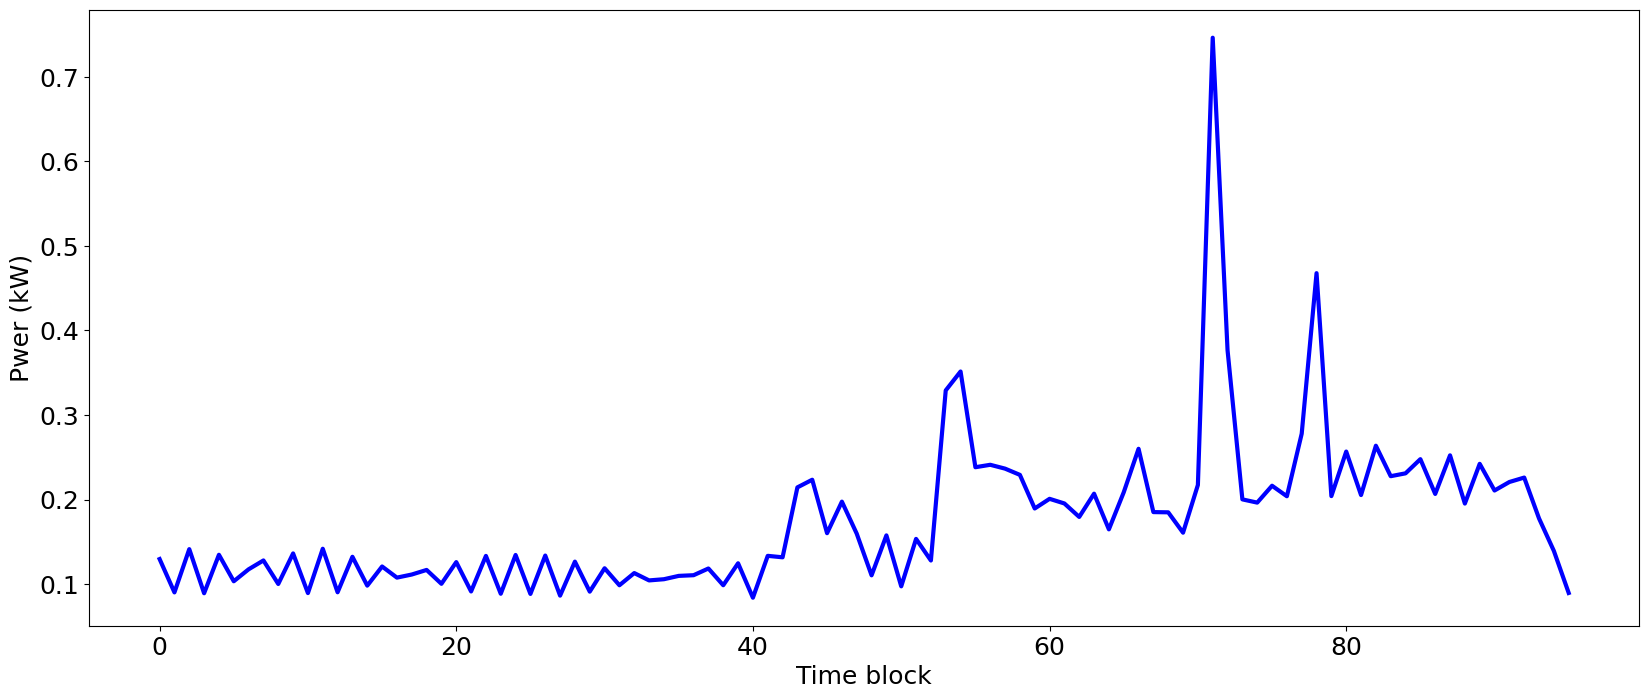

     deployment_id_x  block       date  Load (kW) household_id  index  \
2016           D0044      0 2019-01-01   1.833032         H022     22   
2017           D0044      1 2019-01-01   0.180755         H022     22   
2018           D0044      2 2019-01-01   0.177956         H022     22   
2019           D0044      3 2019-01-01   2.727066         H022     22   
2020           D0044      4 2019-01-01   0.069125         H022     22   
...              ...    ...        ...        ...          ...    ...   
2107           D0044     91 2019-01-01   0.050986         H022     22   
2108           D0044     92 2019-01-01   0.048387         H022     22   
2109           D0044     93 2019-01-01   0.166588         H022     22   
2110           D0044     94 2019-01-01   0.241561         H022     22   
2111           D0044     95 2019-01-01   2.497174         H022     22   

     deployment_id_y  
2016           D0044  
2017           D0044  
2018           D0044  
2019           D0044  
2020    

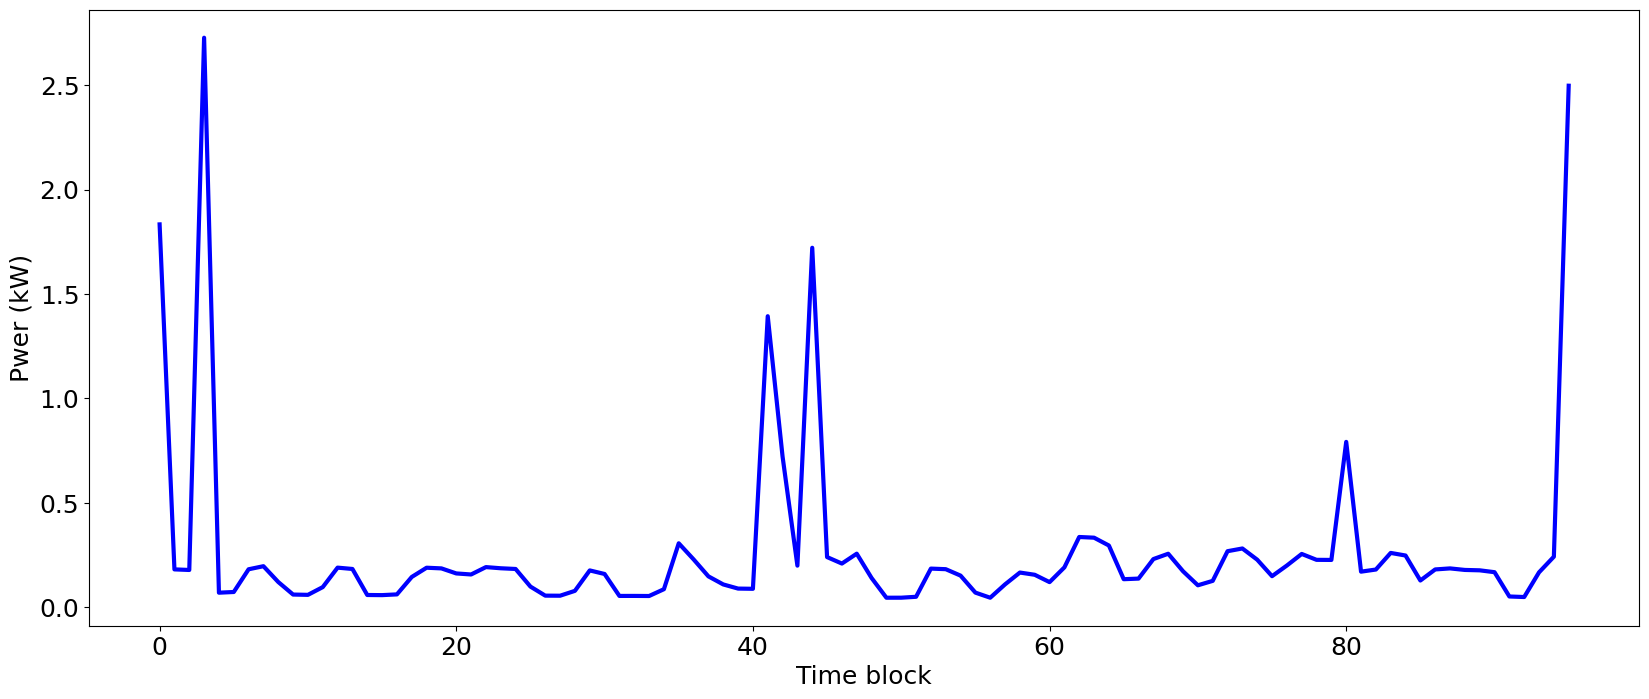

     deployment_id_x  block       date  Load (kW) household_id  index  \
2112           D0046      0 2019-01-01   0.316565         H023     23   
2113           D0046      1 2019-01-01   0.164267         H023     23   
2114           D0046      2 2019-01-01   0.142553         H023     23   
2115           D0046      3 2019-01-01   0.127499         H023     23   
2116           D0046      4 2019-01-01   0.074225         H023     23   
...              ...    ...        ...        ...          ...    ...   
2203           D0046     91 2019-01-01   0.193321         H023     23   
2204           D0046     92 2019-01-01   0.137746         H023     23   
2205           D0046     93 2019-01-01   0.198091         H023     23   
2206           D0046     94 2019-01-01   0.054935         H023     23   
2207           D0046     95 2019-01-01   0.113966         H023     23   

     deployment_id_y  
2112           D0046  
2113           D0046  
2114           D0046  
2115           D0046  
2116    

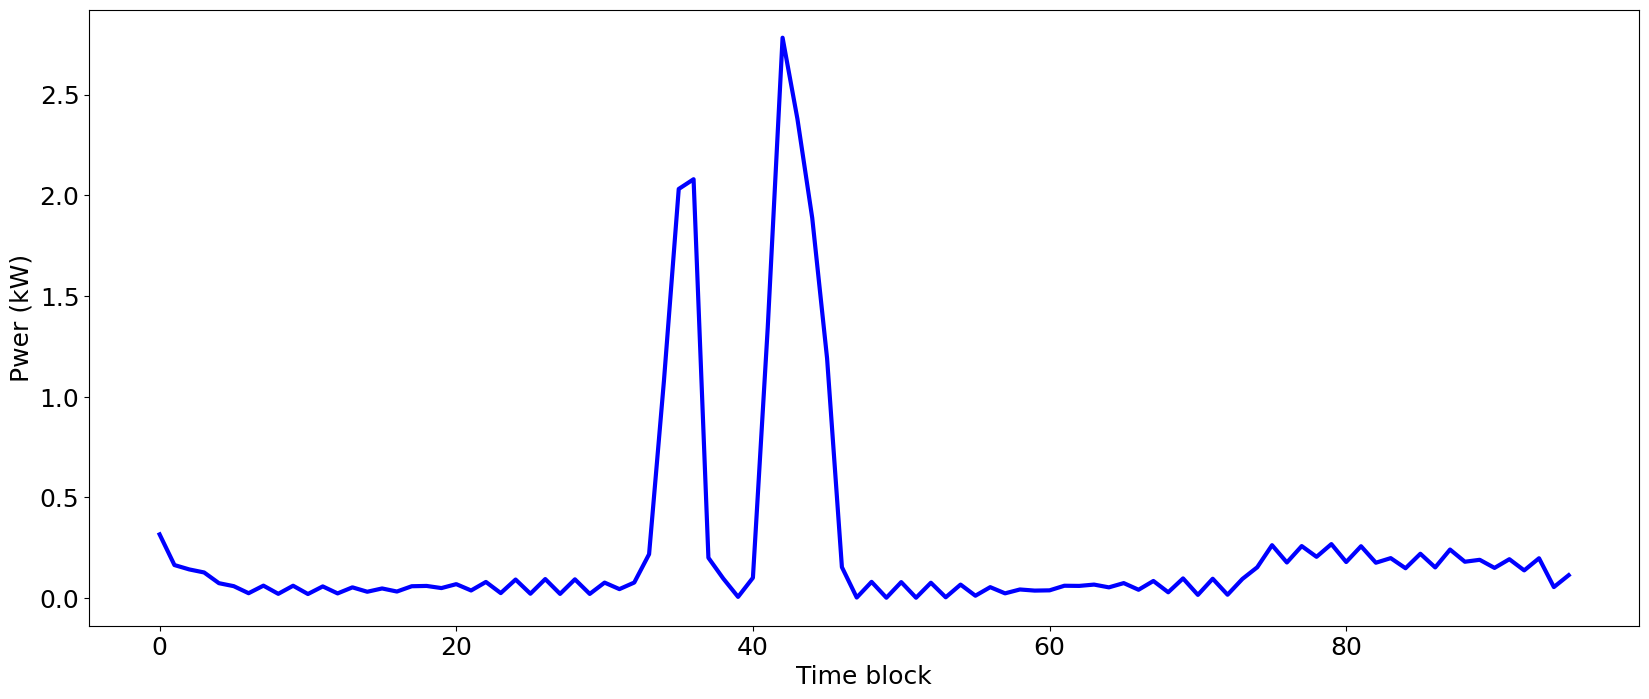

     deployment_id_x  block       date  Load (kW) household_id  index  \
2208           D0048      0 2019-01-01   0.039928         H024     24   
2209           D0048      1 2019-01-01   0.149038         H024     24   
2210           D0048      2 2019-01-01   0.056378         H024     24   
2211           D0048      3 2019-01-01   0.129553         H024     24   
2212           D0048      4 2019-01-01   0.146478         H024     24   
...              ...    ...        ...        ...          ...    ...   
2299           D0048     91 2019-01-01   0.050081         H024     24   
2300           D0048     92 2019-01-01   0.150639         H024     24   
2301           D0048     93 2019-01-01   0.057763         H024     24   
2302           D0048     94 2019-01-01   0.138592         H024     24   
2303           D0048     95 2019-01-01   0.069748         H024     24   

     deployment_id_y  
2208           D0048  
2209           D0048  
2210           D0048  
2211           D0048  
2212    

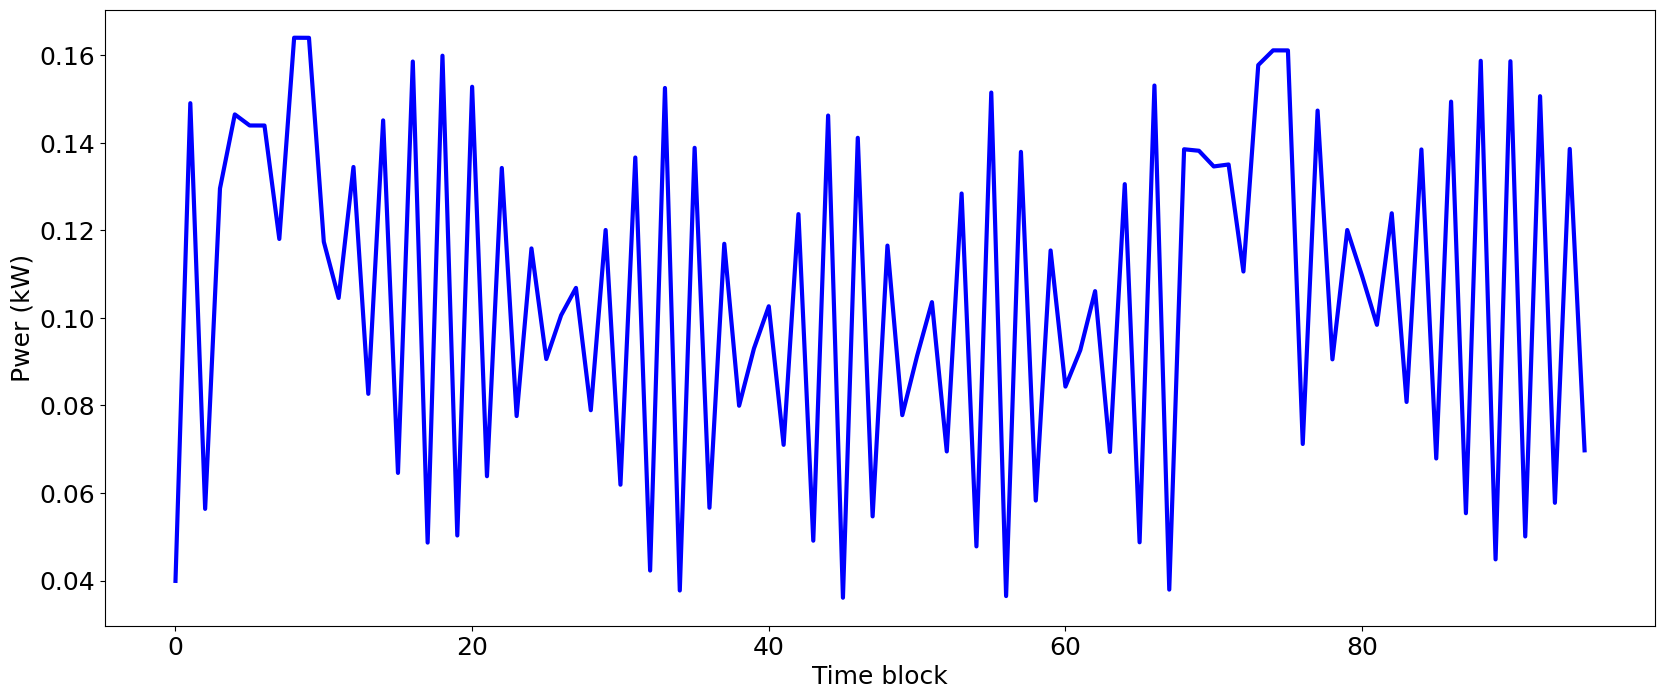

     deployment_id_x  block       date  Load (kW) household_id  index  \
2304           D0049      0 2019-01-01   0.203906         H025     25   
2305           D0049      1 2019-01-01   0.111338         H025     25   
2306           D0049      2 2019-01-01   0.087231         H025     25   
2307           D0049      3 2019-01-01   0.040059         H025     25   
2308           D0049      4 2019-01-01   0.040015         H025     25   
...              ...    ...        ...        ...          ...    ...   
2395           D0049     91 2019-01-01   0.132132         H025     25   
2396           D0049     92 2019-01-01   0.057488         H025     25   
2397           D0049     93 2019-01-01   0.052928         H025     25   
2398           D0049     94 2019-01-01   0.100393         H025     25   
2399           D0049     95 2019-01-01   0.039992         H025     25   

     deployment_id_y  
2304           D0049  
2305           D0049  
2306           D0049  
2307           D0049  
2308    

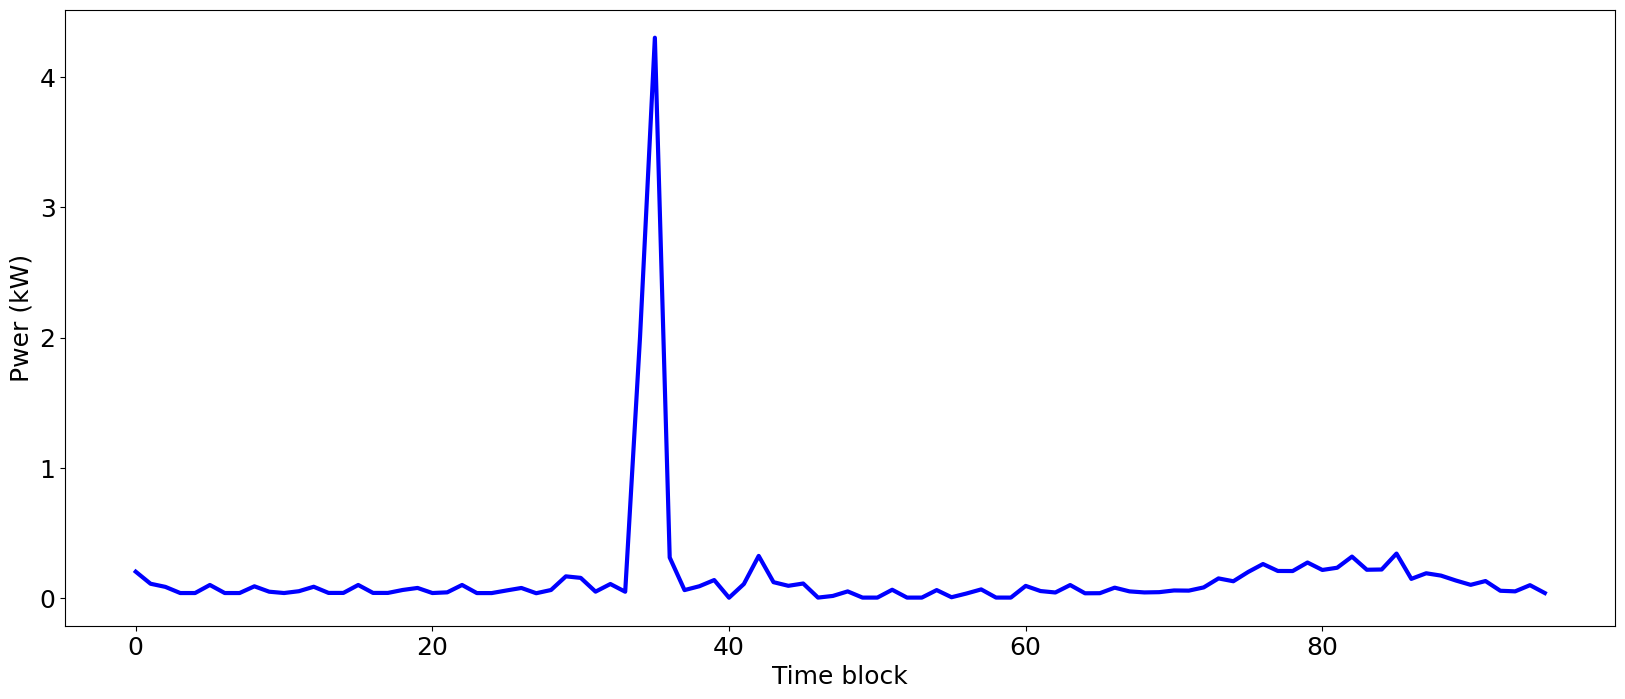

     deployment_id_x  block       date  Load (kW) household_id  index  \
2400           D0052      0 2019-01-01   0.050755         H026     26   
2401           D0052      1 2019-01-01   0.048046         H026     26   
2402           D0052      2 2019-01-01   0.038317         H026     26   
2403           D0052      3 2019-01-01   0.041510         H026     26   
2404           D0052      4 2019-01-01   0.046908         H026     26   
...              ...    ...        ...        ...          ...    ...   
2491           D0052     91 2019-01-01   0.040593         H026     26   
2492           D0052     92 2019-01-01   0.058501         H026     26   
2493           D0052     93 2019-01-01   0.046815         H026     26   
2494           D0052     94 2019-01-01   0.045086         H026     26   
2495           D0052     95 2019-01-01   0.044738         H026     26   

     deployment_id_y  
2400           D0052  
2401           D0052  
2402           D0052  
2403           D0052  
2404    

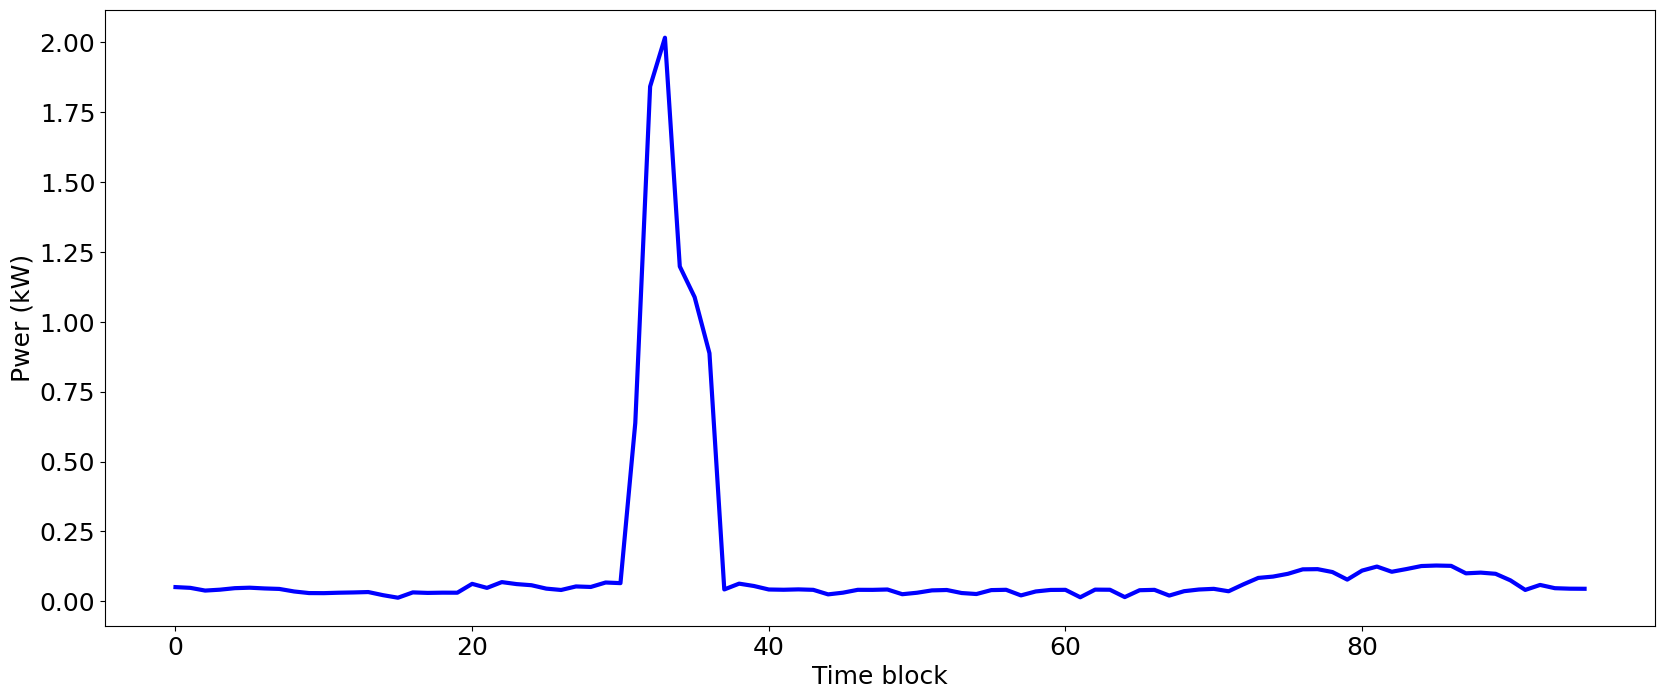

     deployment_id_x  block       date  Load (kW) household_id  index  \
2496           D0054      0 2019-01-01   0.050945         H027     27   
2497           D0054      1 2019-01-01   0.051000         H027     27   
2498           D0054      2 2019-01-01   0.050962         H027     27   
2499           D0054      3 2019-01-01   0.076059         H027     27   
2500           D0054      4 2019-01-01   0.083079         H027     27   
...              ...    ...        ...        ...          ...    ...   
2587           D0054     91 2019-01-01   0.073421         H027     27   
2588           D0054     92 2019-01-01   0.050887         H027     27   
2589           D0054     93 2019-01-01   0.050983         H027     27   
2590           D0054     94 2019-01-01   0.051014         H027     27   
2591           D0054     95 2019-01-01   0.076118         H027     27   

     deployment_id_y  
2496           D0054  
2497           D0054  
2498           D0054  
2499           D0054  
2500    

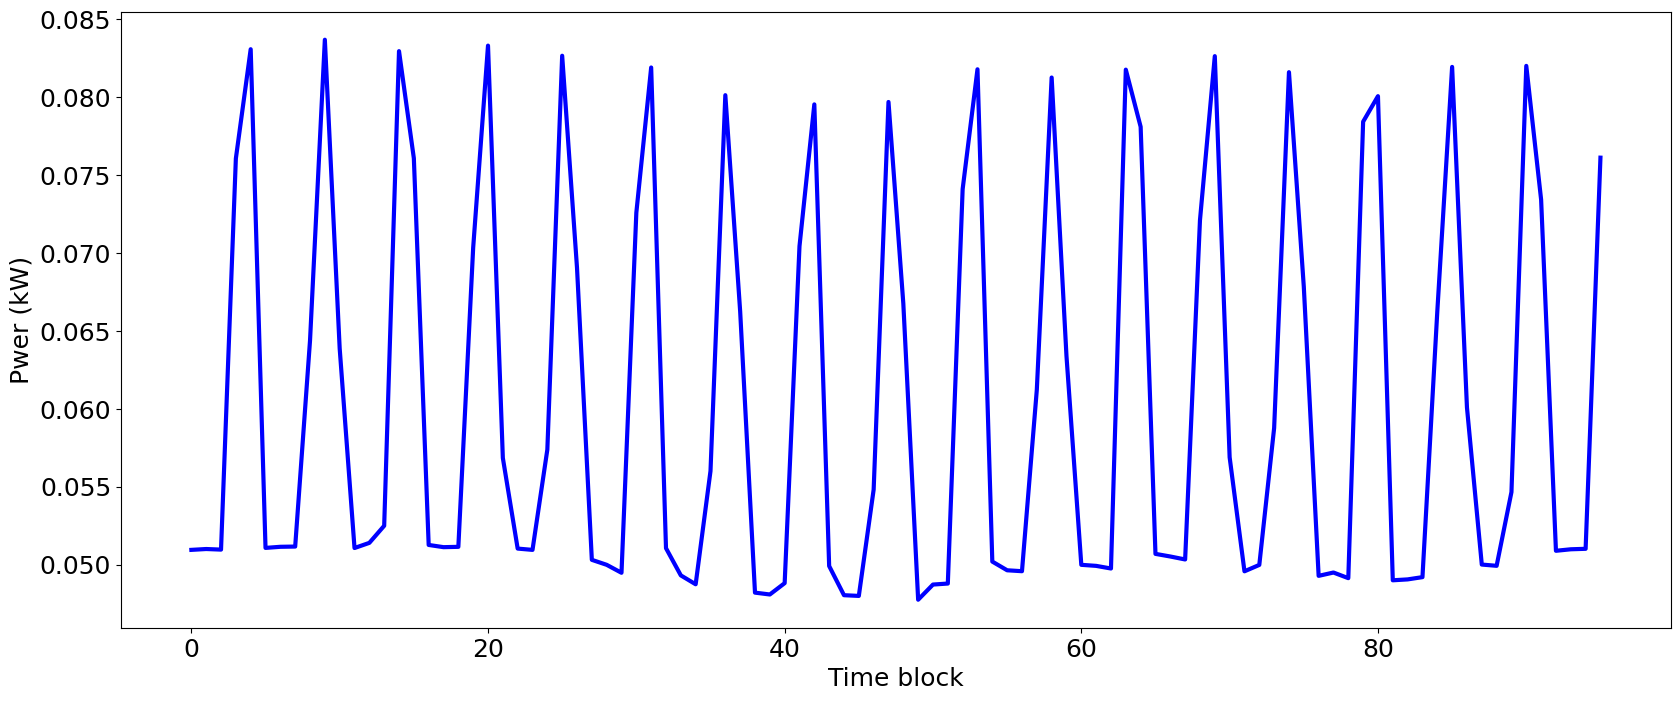

     deployment_id_x  block       date  Load (kW) household_id  index  \
2592           D0056      0 2019-01-01   0.013566         H028     28   
2593           D0056      1 2019-01-01   0.047576         H028     28   
2594           D0056      2 2019-01-01   0.012088         H028     28   
2595           D0056      3 2019-01-01   0.035434         H028     28   
2596           D0056      4 2019-01-01   0.027662         H028     28   
...              ...    ...        ...        ...          ...    ...   
2683           D0056     91 2019-01-01   0.000053         H028     28   
2684           D0056     92 2019-01-01   0.002935         H028     28   
2685           D0056     93 2019-01-01   0.035139         H028     28   
2686           D0056     94 2019-01-01   0.000029         H028     28   
2687           D0056     95 2019-01-01   0.030944         H028     28   

     deployment_id_y  
2592           D0056  
2593           D0056  
2594           D0056  
2595           D0056  
2596    

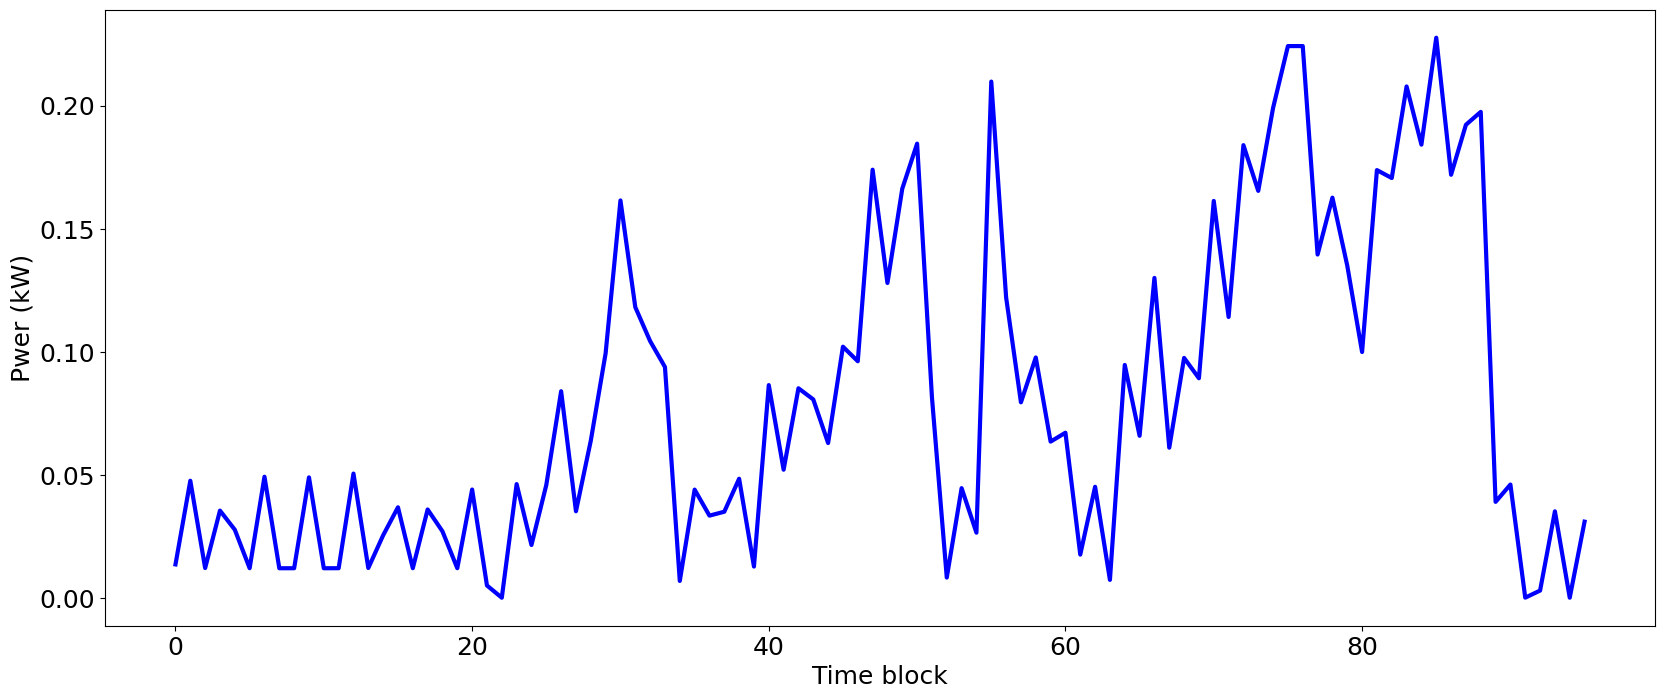

     deployment_id_x  block       date  Load (kW) household_id  index  \
2688           D0058      0 2019-01-01   0.076975         H029     29   
2689           D0058      1 2019-01-01   0.027149         H029     29   
2690           D0058      2 2019-01-01   0.018970         H029     29   
2691           D0058      3 2019-01-01   0.083435         H029     29   
2692           D0058      4 2019-01-01   0.006266         H029     29   
...              ...    ...        ...        ...          ...    ...   
2779           D0058     91 2019-01-01   0.093813         H029     29   
2780           D0058     92 2019-01-01   0.005037         H029     29   
2781           D0058     93 2019-01-01   0.029554         H029     29   
2782           D0058     94 2019-01-01   0.071234         H029     29   
2783           D0058     95 2019-01-01   0.005022         H029     29   

     deployment_id_y  
2688           D0058  
2689           D0058  
2690           D0058  
2691           D0058  
2692    

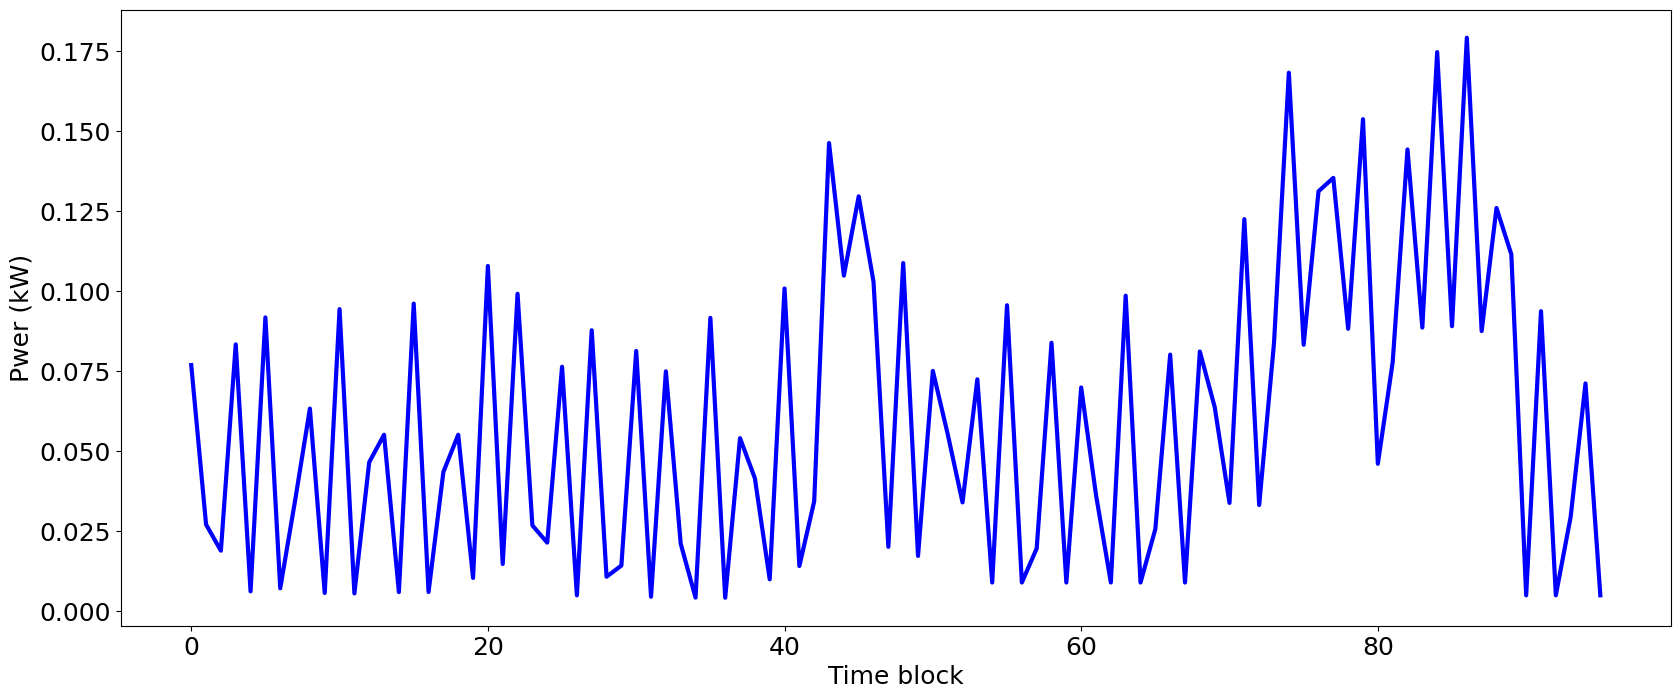

     deployment_id_x  block       date  Load (kW) household_id  index  \
2784           D0060      0 2019-01-01   0.220752         H030     30   
2785           D0060      1 2019-01-01   0.151499         H030     30   
2786           D0060      2 2019-01-01   0.198043         H030     30   
2787           D0060      3 2019-01-01   0.162815         H030     30   
2788           D0060      4 2019-01-01   0.149674         H030     30   
...              ...    ...        ...        ...          ...    ...   
2875           D0060     91 2019-01-01   0.170898         H030     30   
2876           D0060     92 2019-01-01   0.276530         H030     30   
2877           D0060     93 2019-01-01   0.242731         H030     30   
2878           D0060     94 2019-01-01   0.267385         H030     30   
2879           D0060     95 2019-01-01   0.326754         H030     30   

     deployment_id_y  
2784           D0060  
2785           D0060  
2786           D0060  
2787           D0060  
2788    

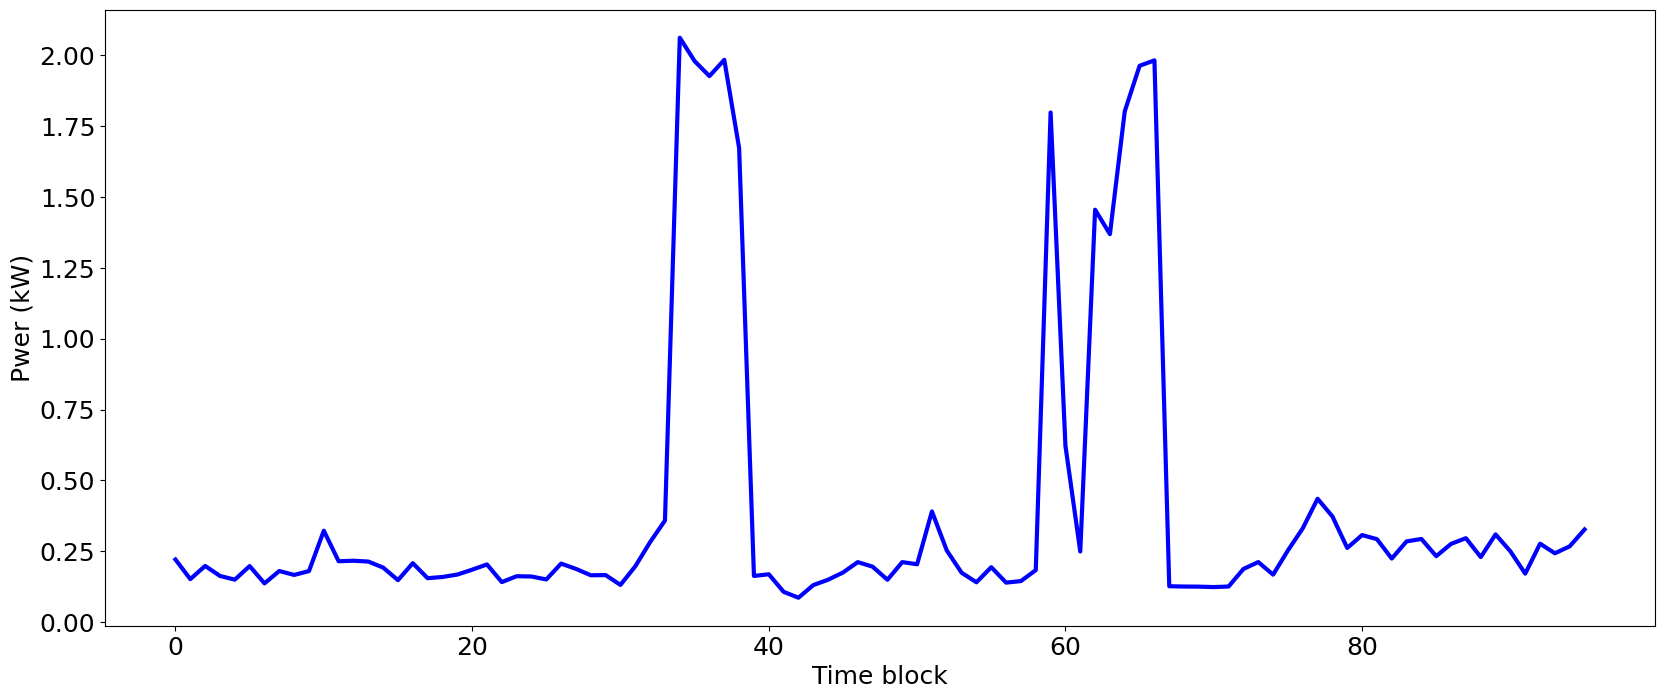

     deployment_id_x  block       date  Load (kW) household_id  index  \
2880           D0061      0 2019-01-01   0.062293         H031     31   
2881           D0061      1 2019-01-01   0.061792         H031     31   
2882           D0061      2 2019-01-01   0.061617         H031     31   
2883           D0061      3 2019-01-01   0.062120         H031     31   
2884           D0061      4 2019-01-01   0.061882         H031     31   
...              ...    ...        ...        ...          ...    ...   
2971           D0061     91 2019-01-01   0.000044         H031     31   
2972           D0061     92 2019-01-01   0.000048         H031     31   
2973           D0061     93 2019-01-01   0.000069         H031     31   
2974           D0061     94 2019-01-01   0.000051         H031     31   
2975           D0061     95 2019-01-01   0.000024         H031     31   

     deployment_id_y  
2880           D0061  
2881           D0061  
2882           D0061  
2883           D0061  
2884    

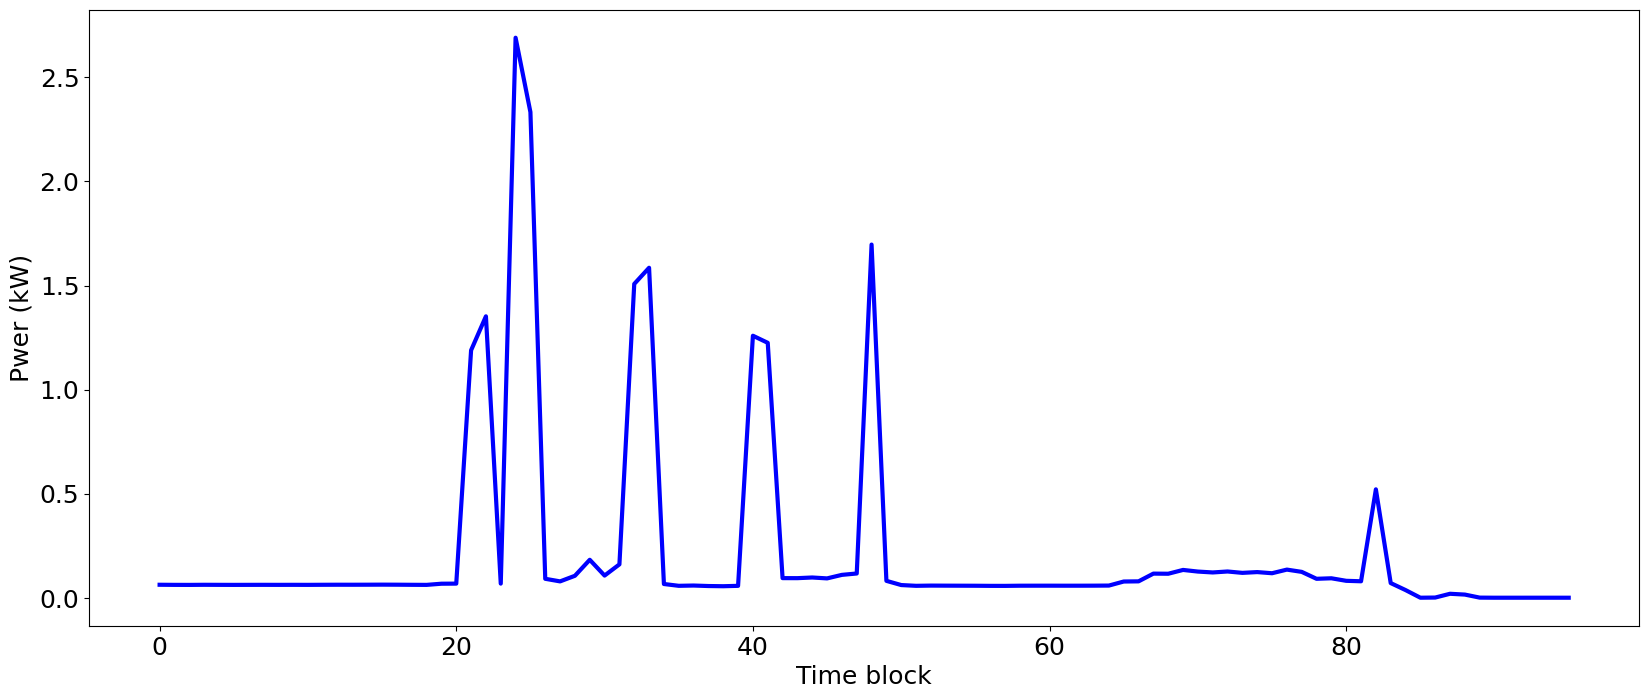

     deployment_id_x  block       date  Load (kW) household_id  index  \
2976           D0063      0 2019-01-01   0.072585         H032     32   
2977           D0063      1 2019-01-01   0.211012         H032     32   
2978           D0063      2 2019-01-01   0.962972         H032     32   
2979           D0063      3 2019-01-01   1.018721         H032     32   
2980           D0063      4 2019-01-01   0.949980         H032     32   
...              ...    ...        ...        ...          ...    ...   
3067           D0063     91 2019-01-01   0.073856         H032     32   
3068           D0063     92 2019-01-01   0.073215         H032     32   
3069           D0063     93 2019-01-01   0.140926         H032     32   
3070           D0063     94 2019-01-01   0.144013         H032     32   
3071           D0063     95 2019-01-01   0.072077         H032     32   

     deployment_id_y  
2976           D0063  
2977           D0063  
2978           D0063  
2979           D0063  
2980    

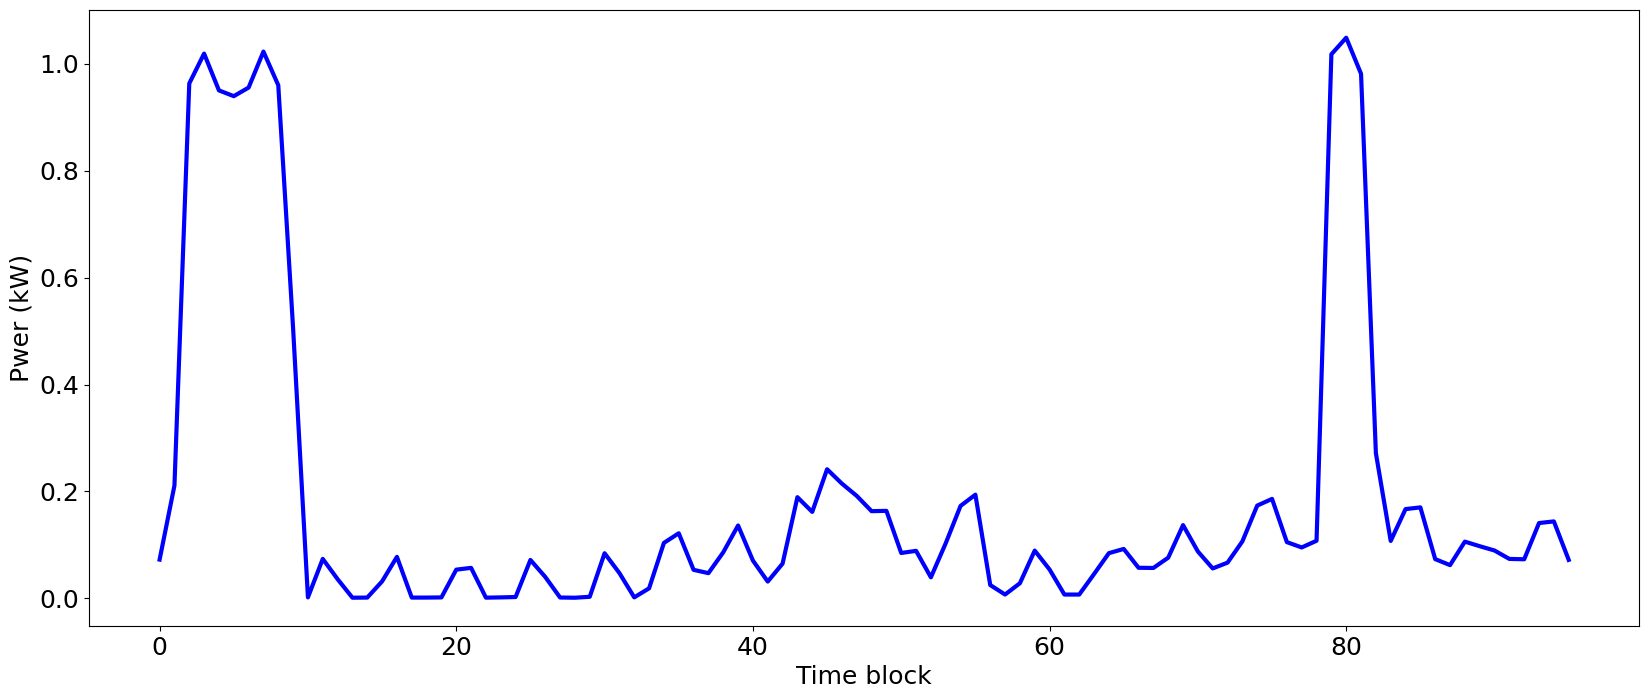

     deployment_id_x  block       date  Load (kW) household_id  index  \
3072           D0065      0 2019-01-01   0.046893         H033     33   
3073           D0065      1 2019-01-01   0.046035         H033     33   
3074           D0065      2 2019-01-01   0.046226         H033     33   
3075           D0065      3 2019-01-01   0.045283         H033     33   
3076           D0065      4 2019-01-01   0.045860         H033     33   
...              ...    ...        ...        ...          ...    ...   
3163           D0065     91 2019-01-01   0.054054         H033     33   
3164           D0065     92 2019-01-01   0.051142         H033     33   
3165           D0065     93 2019-01-01   0.050721         H033     33   
3166           D0065     94 2019-01-01   0.051920         H033     33   
3167           D0065     95 2019-01-01   0.050059         H033     33   

     deployment_id_y  
3072           D0065  
3073           D0065  
3074           D0065  
3075           D0065  
3076    

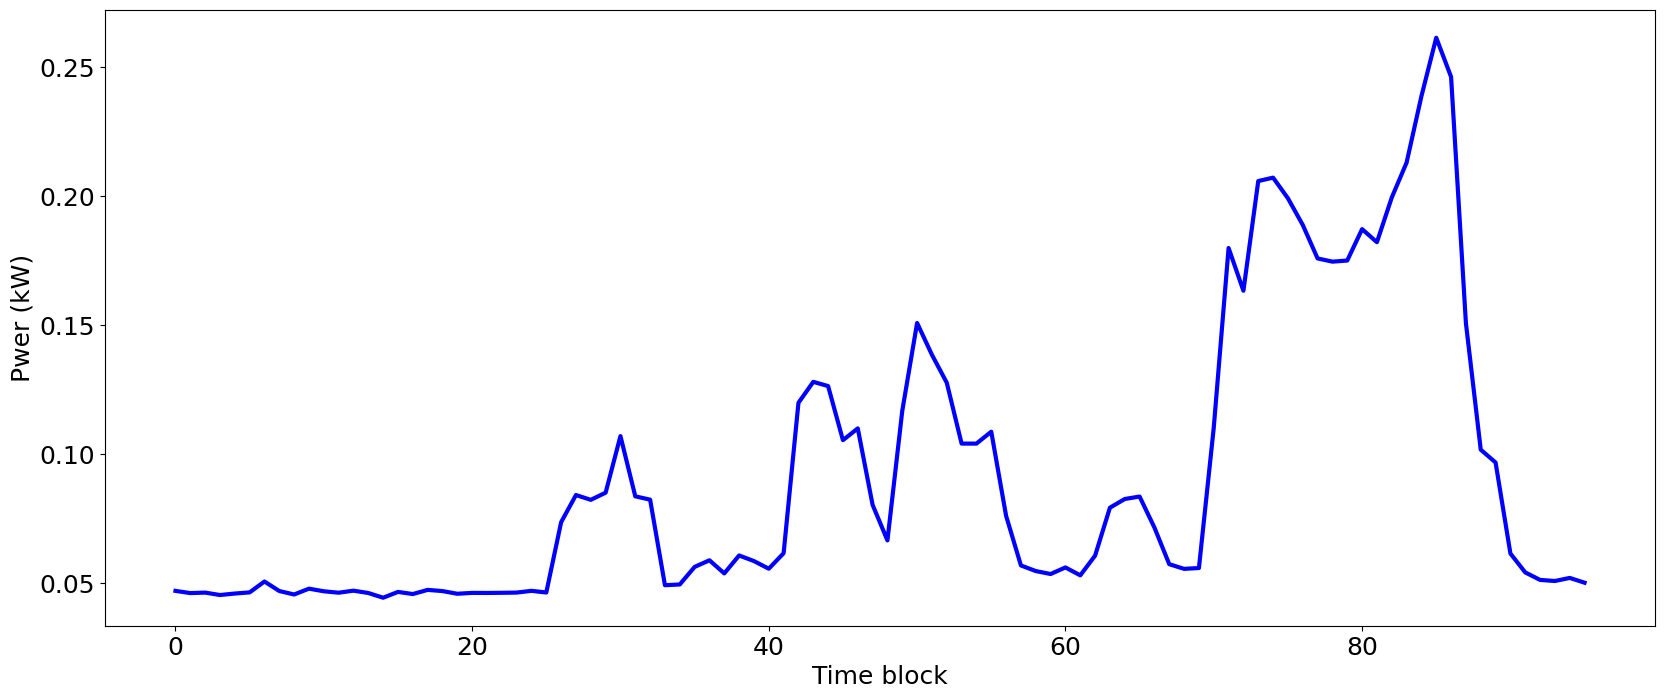

     deployment_id_x  block       date  Load (kW) household_id  index  \
3168           D0068      0 2019-01-01   0.166866         H034     34   
3169           D0068      1 2019-01-01   0.169855         H034     34   
3170           D0068      2 2019-01-01   0.213350         H034     34   
3171           D0068      3 2019-01-01   0.146880         H034     34   
3172           D0068      4 2019-01-01   0.122012         H034     34   
...              ...    ...        ...        ...          ...    ...   
3259           D0068     91 2019-01-01   0.166893         H034     34   
3260           D0068     92 2019-01-01   0.117743         H034     34   
3261           D0068     93 2019-01-01   0.137549         H034     34   
3262           D0068     94 2019-01-01   0.159593         H034     34   
3263           D0068     95 2019-01-01   0.119771         H034     34   

     deployment_id_y  
3168           D0068  
3169           D0068  
3170           D0068  
3171           D0068  
3172    

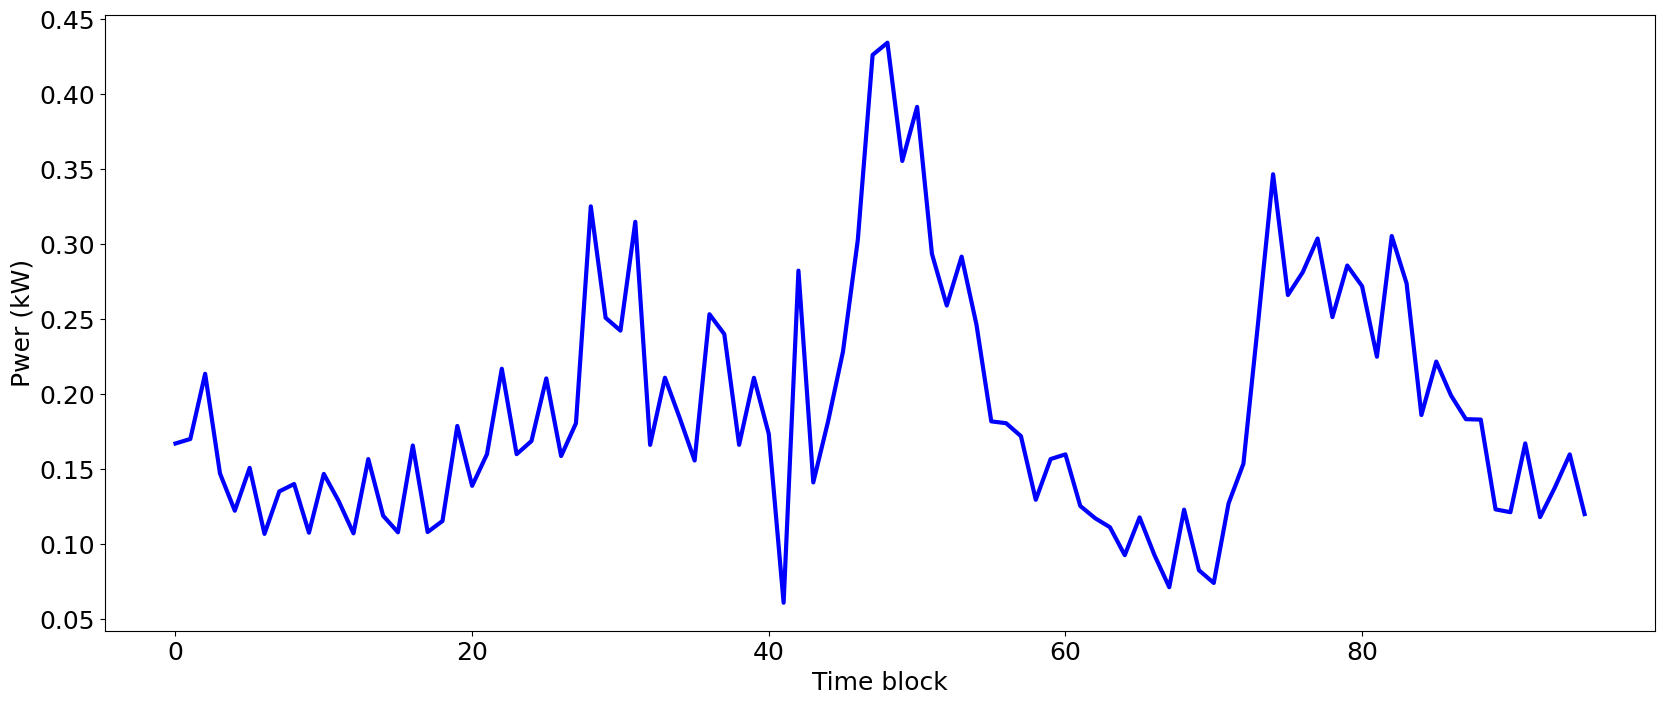

Empty DataFrame
Columns: [deployment_id_x, block, date, Load (kW), household_id, index, deployment_id_y]
Index: []


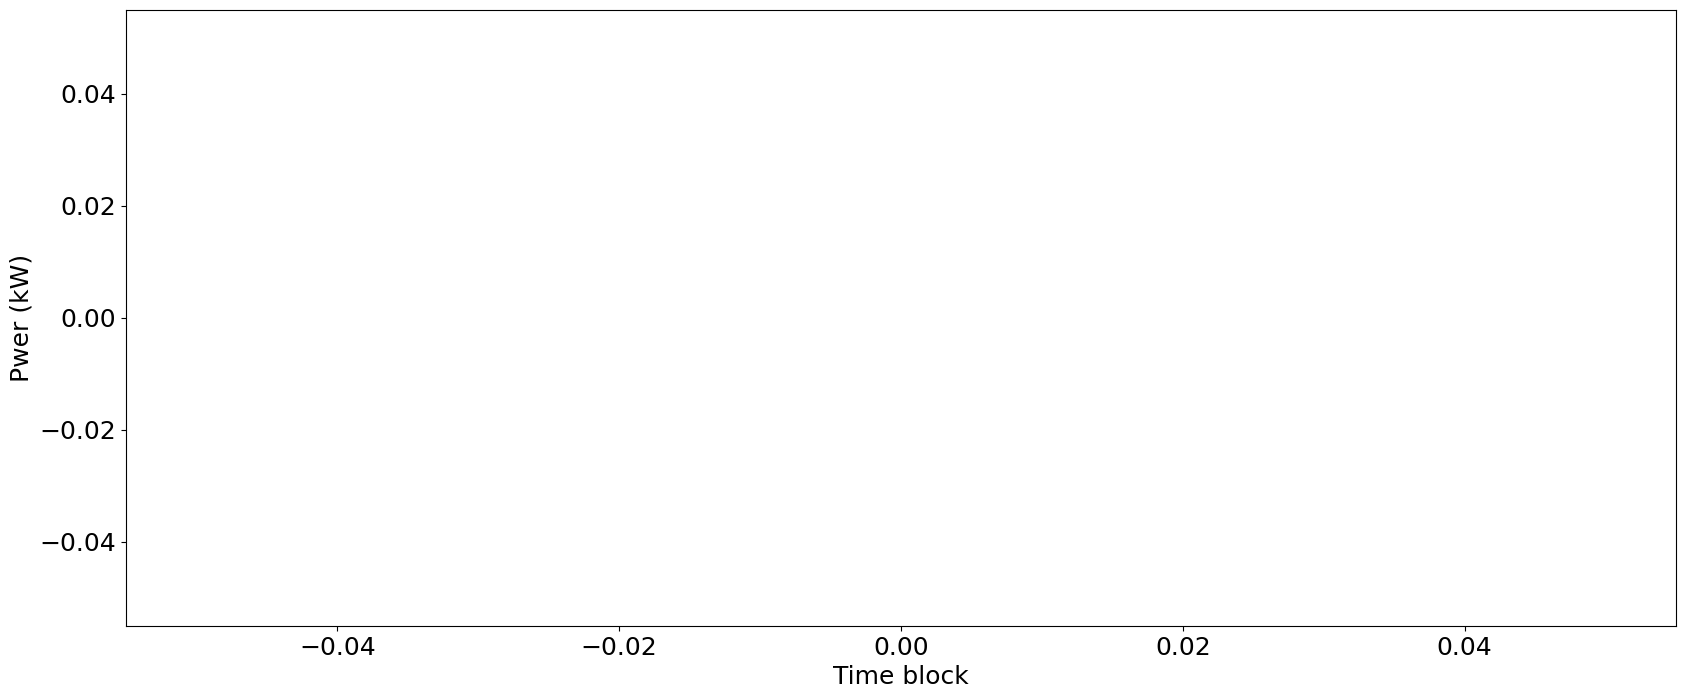

     deployment_id_x  block       date  Load (kW) household_id  index  \
3264           D0072      0 2019-01-01   0.241250         H036     36   
3265           D0072      1 2019-01-01   0.166489         H036     36   
3266           D0072      2 2019-01-01   0.107708         H036     36   
3267           D0072      3 2019-01-01   0.128129         H036     36   
3268           D0072      4 2019-01-01   0.186240         H036     36   
...              ...    ...        ...        ...          ...    ...   
3355           D0072     91 2019-01-01   0.306552         H036     36   
3356           D0072     92 2019-01-01   0.305554         H036     36   
3357           D0072     93 2019-01-01   0.187248         H036     36   
3358           D0072     94 2019-01-01   0.192646         H036     36   
3359           D0072     95 2019-01-01   0.185516         H036     36   

     deployment_id_y  
3264           D0072  
3265           D0072  
3266           D0072  
3267           D0072  
3268    

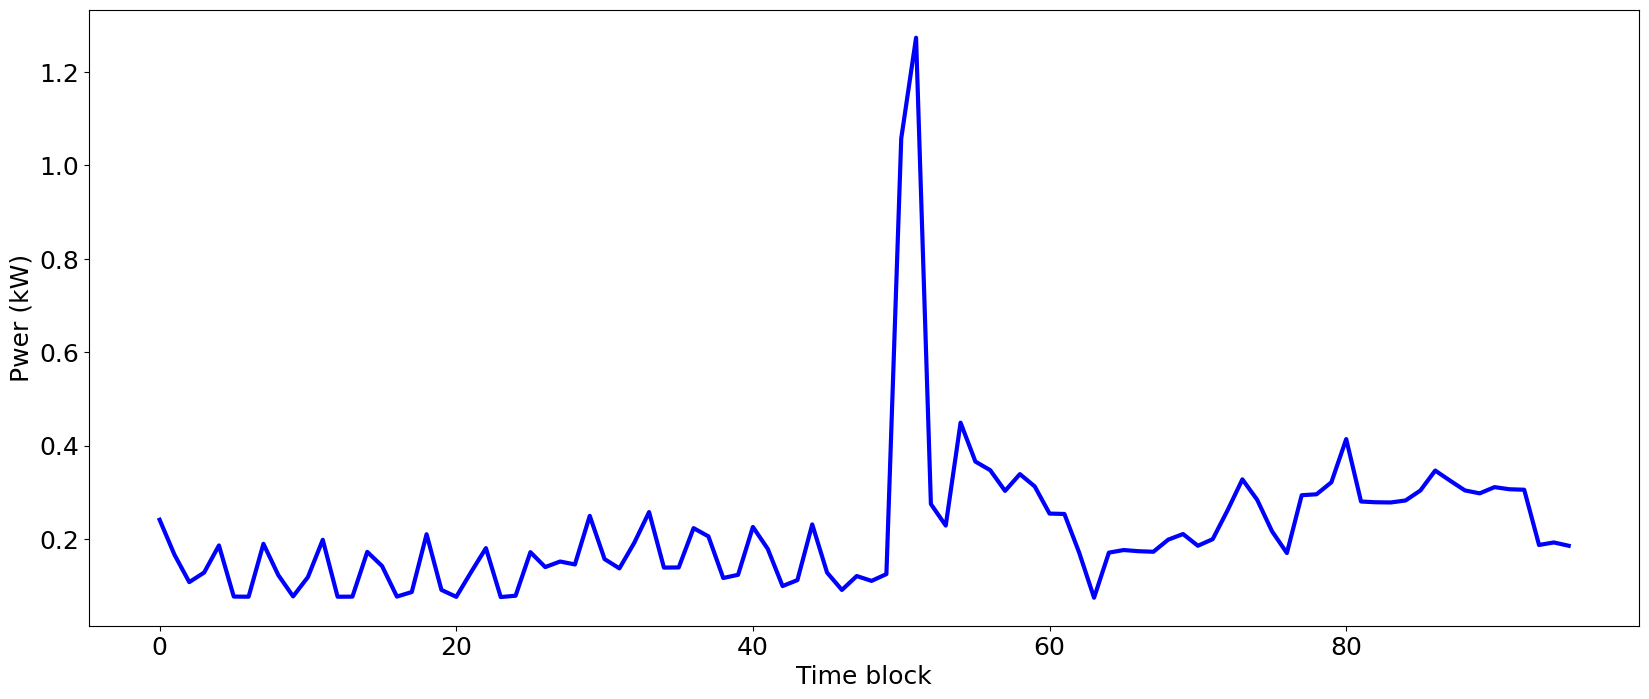

     deployment_id_x  block       date  Load (kW) household_id  index  \
3360           D0073      0 2019-01-01   0.160310         H037     37   
3361           D0073      1 2019-01-01   0.110858         H037     37   
3362           D0073      2 2019-01-01   0.237508         H037     37   
3363           D0073      3 2019-01-01   0.214844         H037     37   
3364           D0073      4 2019-01-01   0.156880         H037     37   
...              ...    ...        ...        ...          ...    ...   
3451           D0073     91 2019-01-01   0.491705         H037     37   
3452           D0073     92 2019-01-01   0.411468         H037     37   
3453           D0073     93 2019-01-01   0.235028         H037     37   
3454           D0073     94 2019-01-01   0.195594         H037     37   
3455           D0073     95 2019-01-01   0.297341         H037     37   

     deployment_id_y  
3360           D0073  
3361           D0073  
3362           D0073  
3363           D0073  
3364    

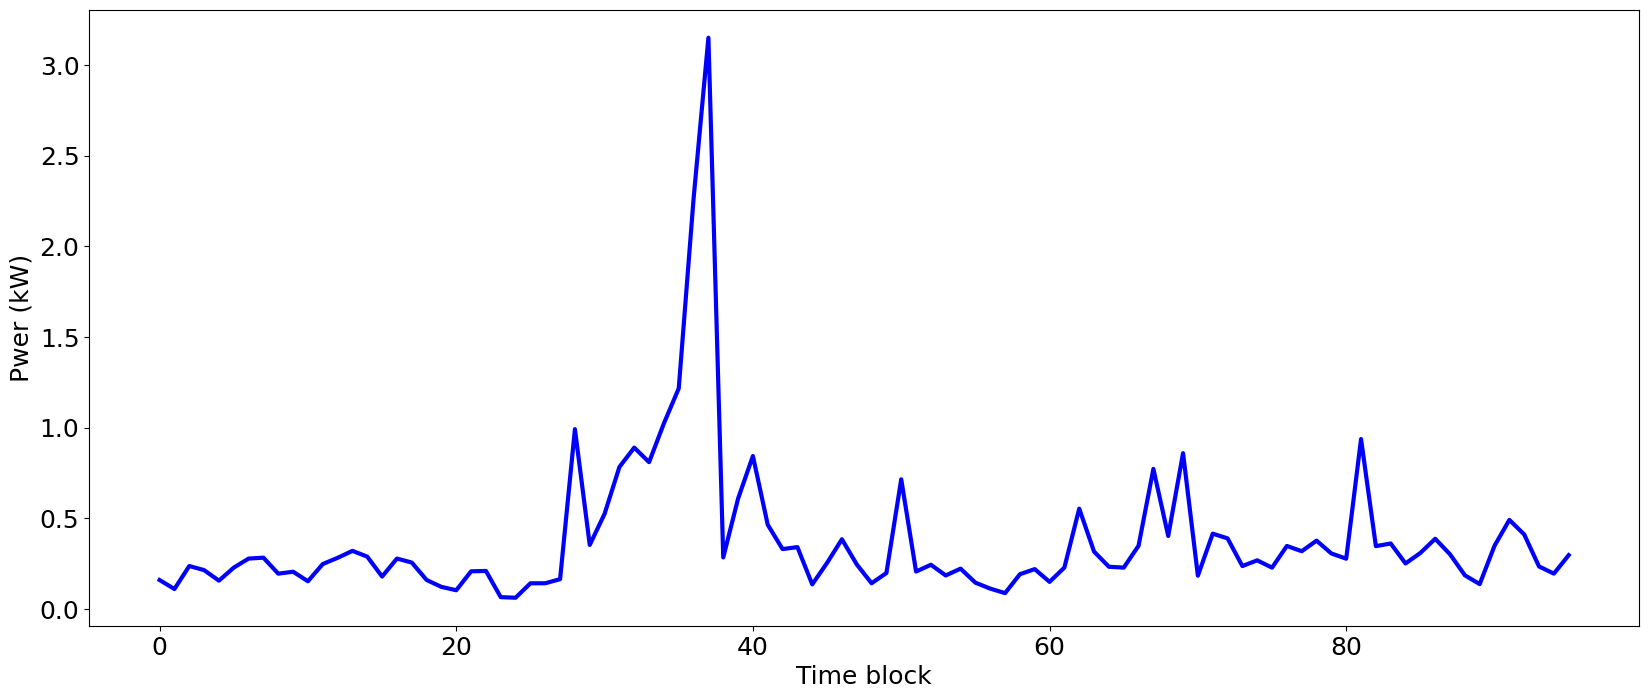

     deployment_id_x  block       date  Load (kW) household_id  index  \
3456           D0076      0 2019-01-01   0.049983         H038     38   
3457           D0076      1 2019-01-01   0.075706         H038     38   
3458           D0076      2 2019-01-01   0.056830         H038     38   
3459           D0076      3 2019-01-01   0.030228         H038     38   
3460           D0076      4 2019-01-01   0.076162         H038     38   
...              ...    ...        ...        ...          ...    ...   
3547           D0076     91 2019-01-01   0.094581         H038     38   
3548           D0076     92 2019-01-01   0.063659         H038     38   
3549           D0076     93 2019-01-01   0.064725         H038     38   
3550           D0076     94 2019-01-01   0.100418         H038     38   
3551           D0076     95 2019-01-01   0.056347         H038     38   

     deployment_id_y  
3456           D0076  
3457           D0076  
3458           D0076  
3459           D0076  
3460    

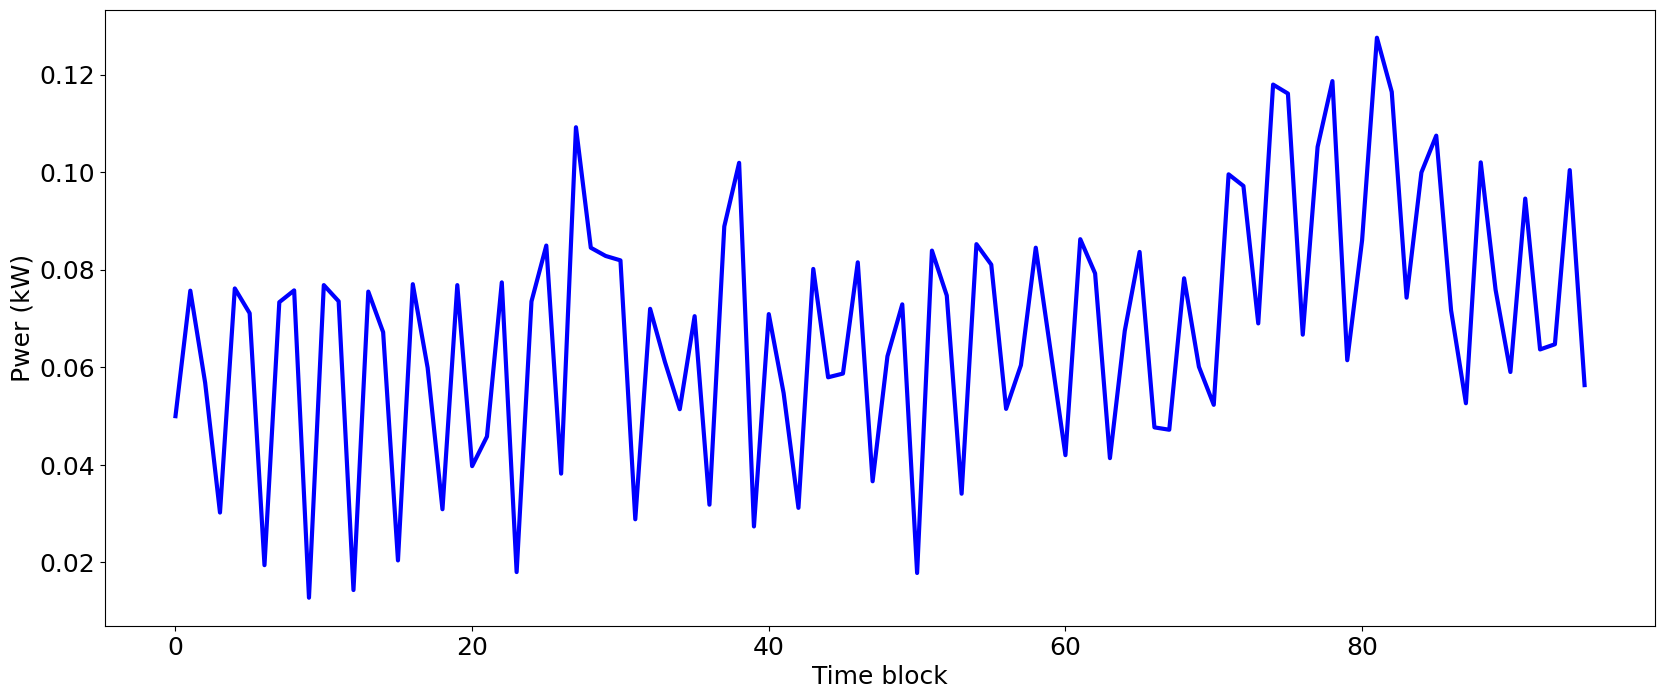

Empty DataFrame
Columns: [deployment_id_x, block, date, Load (kW), household_id, index, deployment_id_y]
Index: []


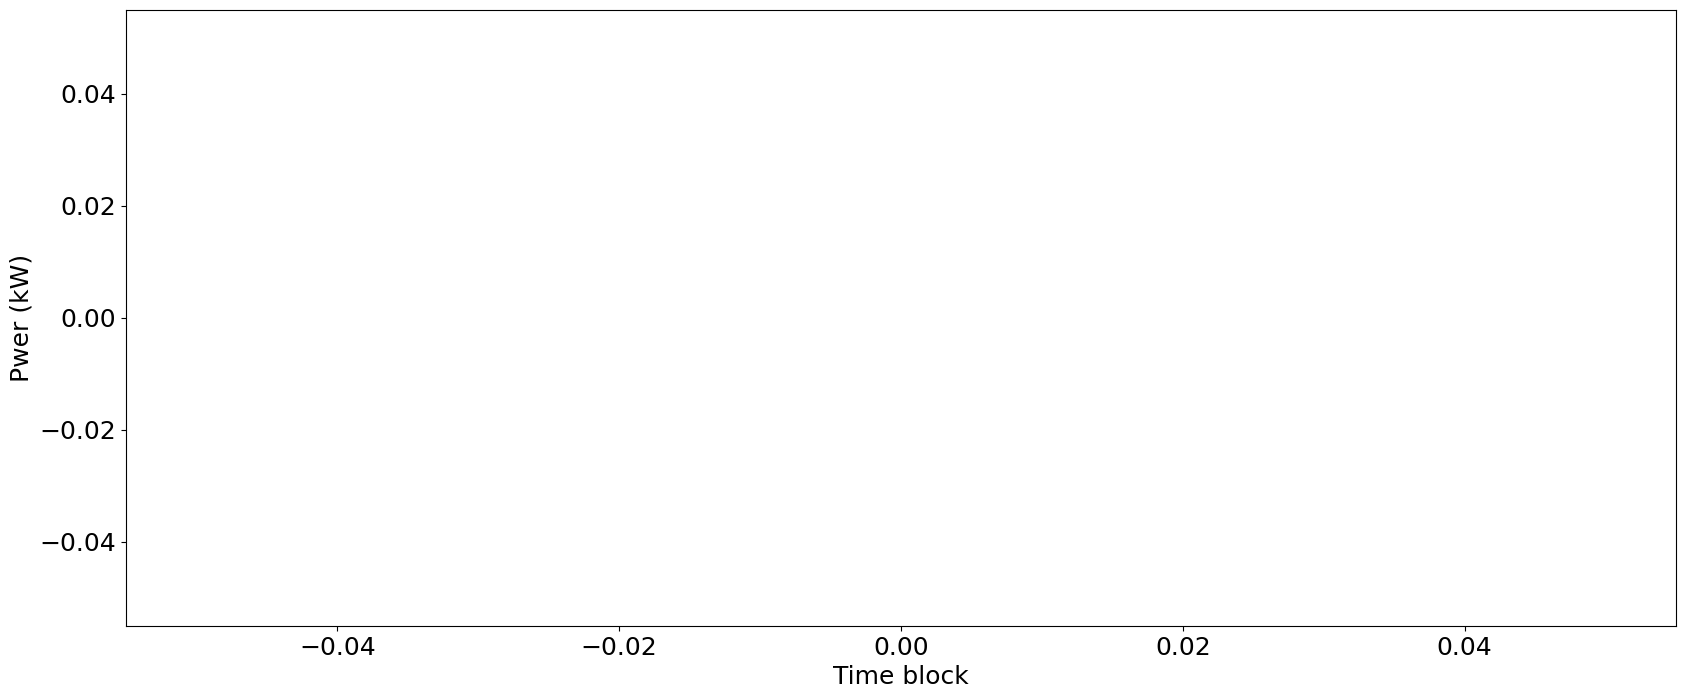

     deployment_id_x  block       date  Load (kW) household_id  index  \
3552           D0080      0 2019-01-01   0.065371         H040     40   
3553           D0080      1 2019-01-01   0.063735         H040     40   
3554           D0080      2 2019-01-01   0.064476         H040     40   
3555           D0080      3 2019-01-01   0.062502         H040     40   
3556           D0080      4 2019-01-01   0.063001         H040     40   
...              ...    ...        ...        ...          ...    ...   
3643           D0080     91 2019-01-01   0.151092         H040     40   
3644           D0080     92 2019-01-01   0.145387         H040     40   
3645           D0080     93 2019-01-01   0.139020         H040     40   
3646           D0080     94 2019-01-01   0.132825         H040     40   
3647           D0080     95 2019-01-01   0.125360         H040     40   

     deployment_id_y  
3552           D0080  
3553           D0080  
3554           D0080  
3555           D0080  
3556    

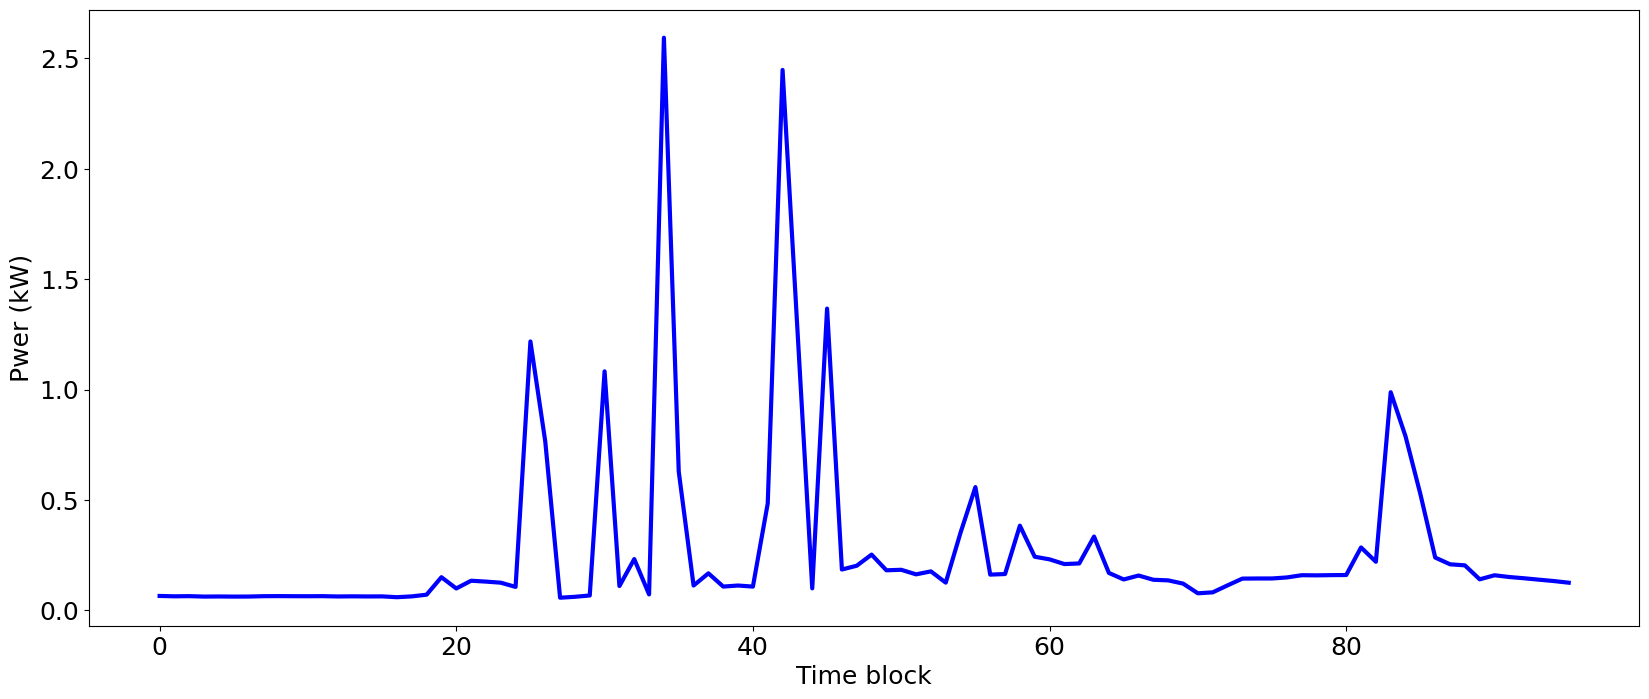

     deployment_id_x  block       date  Load (kW) household_id  index  \
3648           D0082      0 2019-01-01   0.202814         H041     41   
3649           D0082      1 2019-01-01   0.126932         H041     41   
3650           D0082      2 2019-01-01   0.168712         H041     41   
3651           D0082      3 2019-01-01   0.092398         H041     41   
3652           D0082      4 2019-01-01   0.052039         H041     41   
...              ...    ...        ...        ...          ...    ...   
3739           D0082     91 2019-01-01   0.256339         H041     41   
3740           D0082     92 2019-01-01   0.178398         H041     41   
3741           D0082     93 2019-01-01   0.091528         H041     41   
3742           D0082     94 2019-01-01   0.137738         H041     41   
3743           D0082     95 2019-01-01   0.180044         H041     41   

     deployment_id_y  
3648           D0082  
3649           D0082  
3650           D0082  
3651           D0082  
3652    

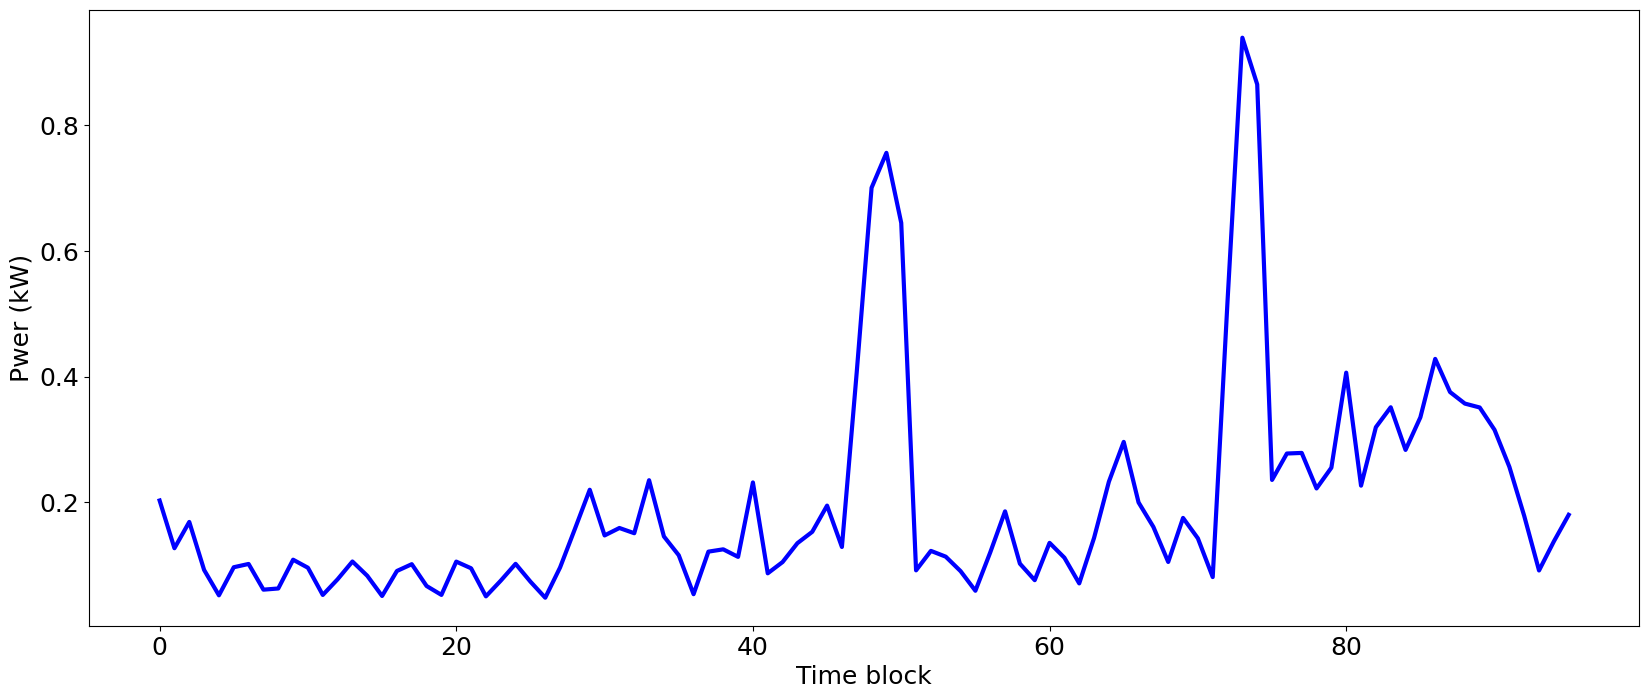

     deployment_id_x  block       date  Load (kW) household_id  index  \
3744           D0084      0 2019-01-01   0.166415         H042     42   
3745           D0084      1 2019-01-01   0.164396         H042     42   
3746           D0084      2 2019-01-01   0.214819         H042     42   
3747           D0084      3 2019-01-01   0.308473         H042     42   
3748           D0084      4 2019-01-01   0.262146         H042     42   
...              ...    ...        ...        ...          ...    ...   
3835           D0084     91 2019-01-01   0.206934         H042     42   
3836           D0084     92 2019-01-01   0.205390         H042     42   
3837           D0084     93 2019-01-01   0.204884         H042     42   
3838           D0084     94 2019-01-01   0.204243         H042     42   
3839           D0084     95 2019-01-01   0.204601         H042     42   

     deployment_id_y  
3744           D0084  
3745           D0084  
3746           D0084  
3747           D0084  
3748    

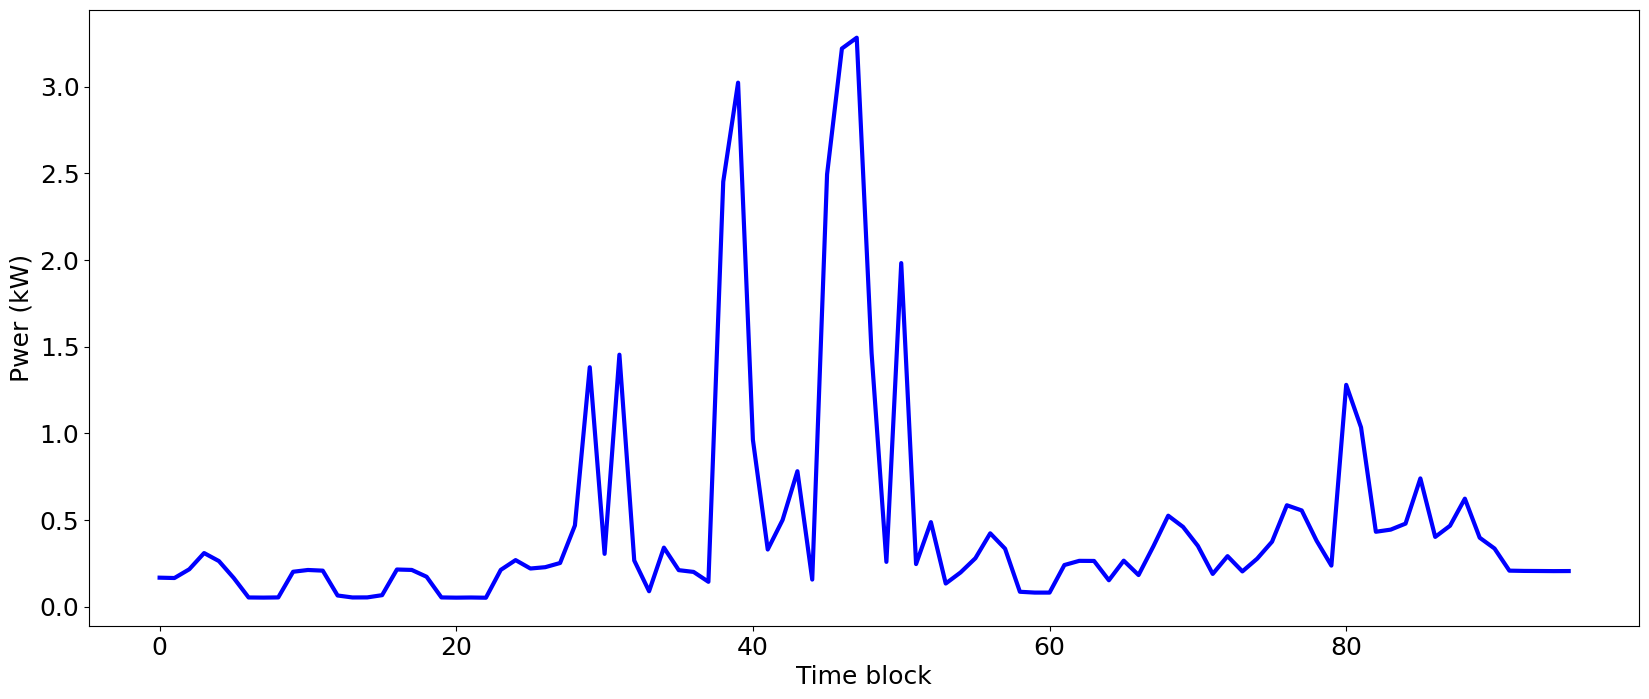

     deployment_id_x  block       date  Load (kW) household_id  index  \
3840           D0086      0 2019-01-01   0.064783         H043     43   
3841           D0086      1 2019-01-01   0.122238         H043     43   
3842           D0086      2 2019-01-01   0.066674         H043     43   
3843           D0086      3 2019-01-01   0.117458         H043     43   
3844           D0086      4 2019-01-01   0.078730         H043     43   
...              ...    ...        ...        ...          ...    ...   
3931           D0086     91 2019-01-01   0.073783         H043     43   
3932           D0086     92 2019-01-01   0.139665         H043     43   
3933           D0086     93 2019-01-01   0.141693         H043     43   
3934           D0086     94 2019-01-01   0.089160         H043     43   
3935           D0086     95 2019-01-01   0.132882         H043     43   

     deployment_id_y  
3840           D0086  
3841           D0086  
3842           D0086  
3843           D0086  
3844    

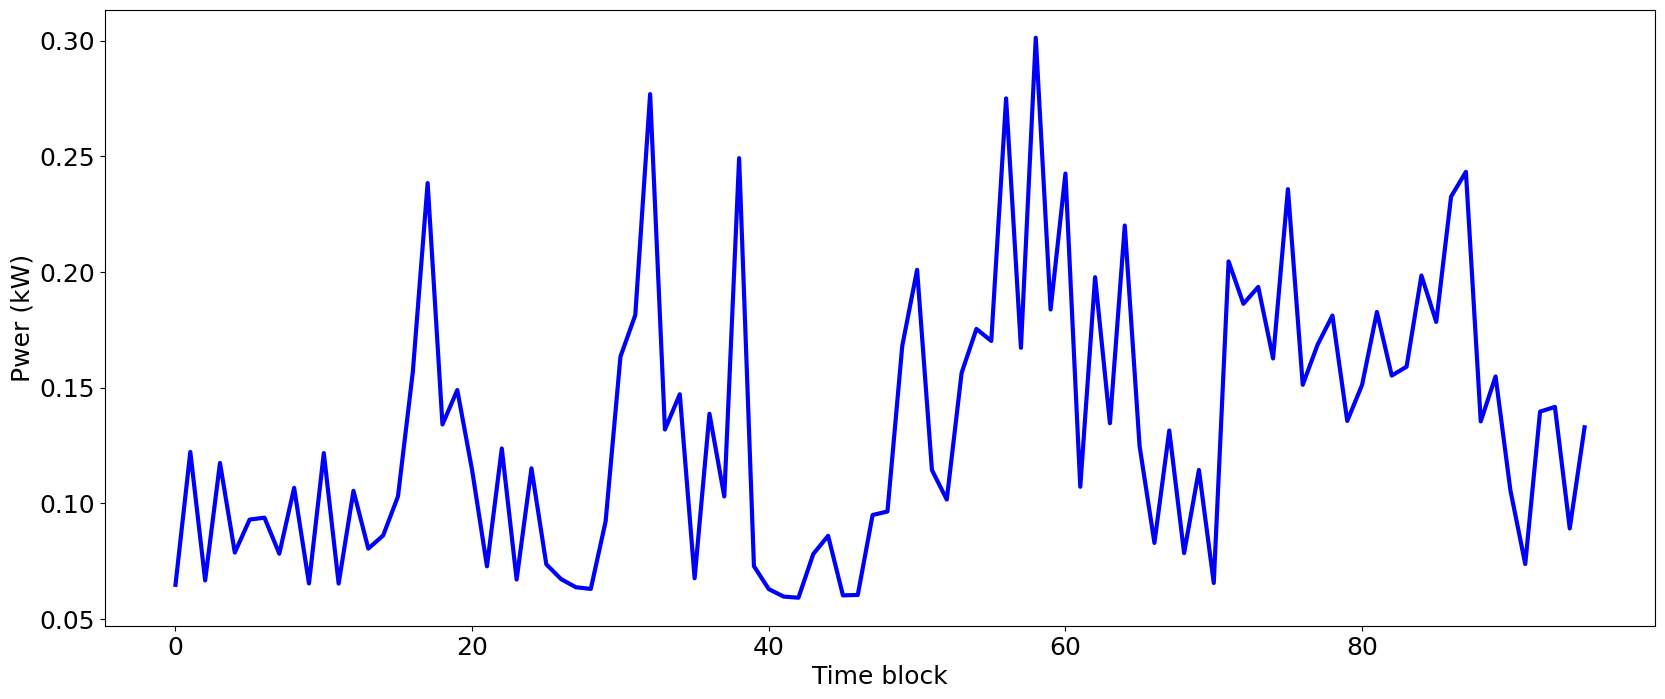

     deployment_id_x  block       date  Load (kW) household_id  index  \
3936           D0087      0 2019-01-01   0.064424         H044     44   
3937           D0087      1 2019-01-01   0.098442         H044     44   
3938           D0087      2 2019-01-01   0.099081         H044     44   
3939           D0087      3 2019-01-01   0.047632         H044     44   
3940           D0087      4 2019-01-01   0.097928         H044     44   
...              ...    ...        ...        ...          ...    ...   
4027           D0087     91 2019-01-01   0.280789         H044     44   
4028           D0087     92 2019-01-01   0.204183         H044     44   
4029           D0087     93 2019-01-01   0.190276         H044     44   
4030           D0087     94 2019-01-01   0.199760         H044     44   
4031           D0087     95 2019-01-01   0.117108         H044     44   

     deployment_id_y  
3936           D0087  
3937           D0087  
3938           D0087  
3939           D0087  
3940    

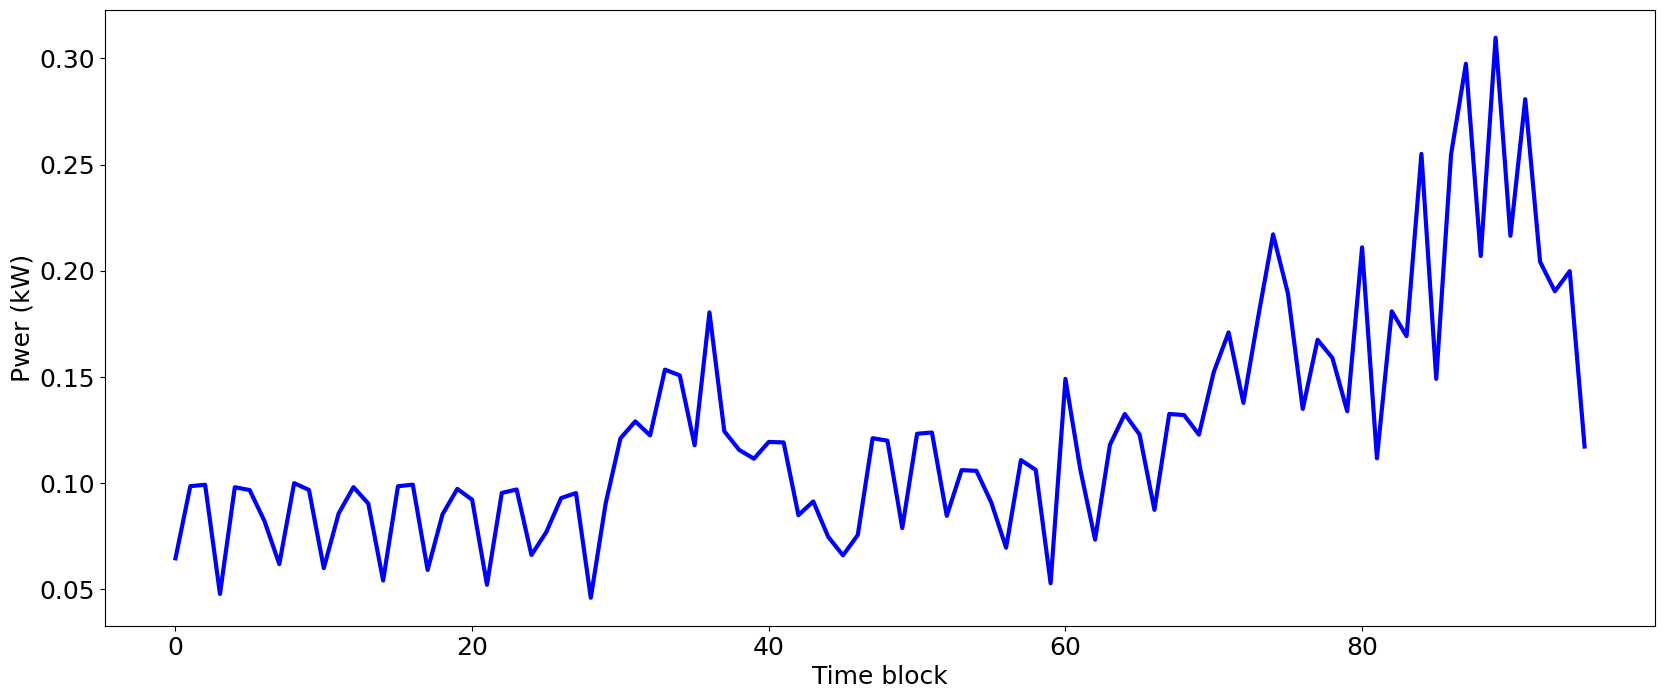

In [388]:
for i in range (1,45):
    df = (m2.loc[m2['index'] == i])
    print (df)
    df.groupby('block')['Load (kW)'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Pwer (kW)',fontsize=18)
    plt.xlabel('Time block',fontsize=18)
    #plt.title(day,fontsize=18)
    plt.show()

In [ ]:
x=0
for i in range (1,31):
    start = pd.to_datetime(date(2019,1,i))
    end = start + timedelta(days=1)
    day = start.day_name()
    x = x + 1
    df_1 = m1[(m1['date'] >=start) & (m1['date'] < end)]
    print( df_1['date'])
    df_1['Time']= pd.to_datetime(df_1['date']).dt.time
    df_1['date']=df_1['Time']
    df_1.drop('Time',axis=1,inplace=True)
    print(df_1)
    df_1.groupby('date')['Load (kW)'].sum().plot(kind='line',linewidth= 3,figsize=(20,8),color='blue',fontsize=18)
    plt.ylabel('Power',fontsize=18)
    plt.xlabel('Timestamp',fontsize=18)
    plt.title(day,fontsize=18)
    plt.show()
    df_1.to_csv(r'Dataset_combined/Day{0}_{1}.csv'.format(x,day))